# Austin Animal Center intake stay-lengths exploration

The city of Austin, Texas hosts and provides open access to various datasets, including datasets pertaining to the [Austin Animal Center](http://www.austintexas.gov/department/aac). 

For this project, I will explore the [Austin Animal Center intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) dataset and the [Austin Animal Center outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) dataset. Ideally, I would like to join the two sets to produce the length of stays for the intakes by taking the difference between intake-timestamp and outcome-timestamp, and then exploring associations with the stay-lengths. 

## Gathering Data

First, I will retrieve both datasets via API. Conveniently, the data-portal website provides the code to retrieve the sets. 

In [1]:
# Outcomes doc: https://dev.socrata.com/foundry/data.austintexas.gov/9t4d-g238

import pandas as pd
from sodapy import Socrata

client = Socrata("data.austintexas.gov", None)

# JSON results converted to list of dictionaries by sodapy
results = client.get("9t4d-g238",limit = 100000)

# Convert to pandas DataFrame
df_outcomes = pd.DataFrame.from_records(results)

In [2]:
# Intakes: https://dev.socrata.com/foundry/data.austintexas.gov/fdzn-9yqv

results = client.get("fdzn-9yqv", limit = 100000)
df_intakes = pd.DataFrame.from_records(results)

In [3]:
df_outcomes.head()

age_upon_outcome animal_id animal_type                      breed  \
0         11 years   A793216         Dog  Australian Cattle Dog Mix   
1          2 years   A793011         Cat     Domestic Shorthair Mix   
2         2 months   A793306         Dog             Great Dane Mix   
3           1 year   A793439         Dog     Labrador Retriever Mix   
4          3 years   A766326         Dog         Siberian Husky Mix   

                 color            date_of_birth                 datetime  \
0  Brown Brindle/White  2008-04-25T00:00:00.000  2019-04-25T20:24:00.000   
1     Lynx Point/White  2017-04-18T00:00:00.000  2019-04-25T19:05:00.000   
2                Black  2019-02-14T00:00:00.000  2019-04-25T18:55:00.000   
3          Black/White  2018-04-25T00:00:00.000  2019-04-25T18:40:00.000   
4          White/White  2016-02-06T00:00:00.000  2019-04-25T18:32:00.000   

                 monthyear    name outcome_subtype     outcome_type  \
0  2019-04-25T20:24:00.000  Gracie           Field  Return to Owner   
1  2019-04-25T19:05:00.000   Chloe             NaN         Adoption   
2  2019-04-25T18:55:00.000     NaN             NaN         Adoption   
3  2019-04-25T18:40:00.000  Barney             NaN  Return to Owner   
4  2019-04-25T18:32:00.000    Snow             NaN  Return to Owner   

  sex_upon_outcome  
0    Spayed Female  
1    Spayed Female  
2    Neutered Male  
3    Neutered Male  
4      Intact Male

In [4]:
df_outcomes.shape

(98907, 12)

In [5]:
df_intakes.head()

age_upon_intake animal_id animal_type  \
0        10 years   A673318         Dog   
1         9 years   A793491         Dog   
2          1 year   A793496       Other   
3        5 months   A785922         Dog   
4         3 years   A793489         Dog   

                                   breed       color                 datetime  \
0                           Pit Bull Mix  Fawn/White  2019-04-26T00:17:00.000   
1                       Mexican Hairless       Black  2019-04-25T23:03:00.000   
2                                    Bat       Black  2019-04-25T22:59:00.000   
3                           Boxer/Beagle       Brown  2019-04-25T18:57:00.000   
4  German Shepherd/Australian Cattle Dog   Black/Tan  2019-04-25T18:19:00.000   

                 datetime2                                     found_location  \
0  2019-04-26T00:17:00.000                   7224 Northeast Dr in Austin (TX)   
1  2019-04-25T23:03:00.000           2014 Charlotte Estates Dr in Austin (TX)   
2  2019-04-25T22:59:00.000                     1711 Walnut Ave in Austin (TX)   
3  2019-04-25T18:57:00.000                 1156 W Cesar Chavez in Austin (TX)   
4  2019-04-25T18:19:00.000  8800 North Interstate 35 Serviceroad South Bou...   

  intake_condition    intake_type   name sex_upon_intake  
0           Normal          Stray   Emma   Spayed Female  
1           Normal          Stray    NaN         Unknown  
2           Normal       Wildlife    NaN         Unknown  
3           Normal          Stray  Gizmo   Neutered Male  
4           Normal  Public Assist   Scar   Neutered Male

In [6]:
df_intakes.shape

(98939, 12)

Now, I will explore joining datasets to see if producing the stay-lengths is a viable option. 

In [7]:
df_join = df_outcomes.merge(df_intakes, how = 'inner', on = 'animal_id')
df_join.head()

age_upon_outcome animal_id animal_type_x                    breed_x  \
0         11 years   A793216           Dog  Australian Cattle Dog Mix   
1          2 years   A793011           Cat     Domestic Shorthair Mix   
2         2 months   A793306           Dog             Great Dane Mix   
3           1 year   A793439           Dog     Labrador Retriever Mix   
4          3 years   A766326           Dog         Siberian Husky Mix   

               color_x            date_of_birth               datetime_x  \
0  Brown Brindle/White  2008-04-25T00:00:00.000  2019-04-25T20:24:00.000   
1     Lynx Point/White  2017-04-18T00:00:00.000  2019-04-25T19:05:00.000   
2                Black  2019-02-14T00:00:00.000  2019-04-25T18:55:00.000   
3          Black/White  2018-04-25T00:00:00.000  2019-04-25T18:40:00.000   
4          White/White  2016-02-06T00:00:00.000  2019-04-25T18:32:00.000   

                 monthyear  name_x outcome_subtype       ...        \
0  2019-04-25T20:24:00.000  Gracie           Field       ...         
1  2019-04-25T19:05:00.000   Chloe             NaN       ...         
2  2019-04-25T18:55:00.000     NaN             NaN       ...         
3  2019-04-25T18:40:00.000  Barney             NaN       ...         
4  2019-04-25T18:32:00.000    Snow             NaN       ...         

  animal_type_y                    breed_y              color_y  \
0           Dog  Australian Cattle Dog Mix  Brown Brindle/White   
1           Cat     Domestic Shorthair Mix     Lynx Point/White   
2           Dog             Great Dane Mix                Black   
3           Dog     Labrador Retriever Mix          Black/White   
4           Dog         Siberian Husky Mix          White/White   

                datetime_y                datetime2  \
0  2019-04-21T13:22:00.000  2019-04-21T13:22:00.000   
1  2019-04-18T12:01:00.000  2019-04-18T12:01:00.000   
2  2019-04-23T11:49:00.000  2019-04-23T11:49:00.000   
3  2019-04-25T11:26:00.000  2019-04-25T11:26:00.000   
4  2019-04-25T11:13:00.000  2019-04-25T11:13:00.000   

                      found_location intake_condition      intake_type  \
0      7209 N Ute Trl in Austin (TX)           Normal            Stray   
1                        Austin (TX)           Normal  Owner Surrender   
2                        Austin (TX)           Normal  Owner Surrender   
3  4204 Manchaca Road in Austin (TX)           Normal            Stray   
4        Heatherwilde in Austin (TX)           Normal            Stray   

   name_y sex_upon_intake  
0  Gracie   Spayed Female  
1   Chloe   Spayed Female  
2     NaN     Intact Male  
3  Barney   Neutered Male  
4    Snow     Intact Male  

[5 rows x 23 columns]

In [8]:
df_join.shape

(126200, 23)

The inner join is producing additional rows, which [could mean that there are duplicate rows](https://stackoverflow.com/questions/41580249/pandas-merged-inner-join-data-frame-has-more-rows-than-the-original-ones).

In [9]:
df_intakes[df_intakes.duplicated(keep = False)]

age_upon_intake animal_id animal_type                            breed  \
7985           1 year   A782931         Cat           Domestic Shorthair Mix   
7986           1 year   A782931         Cat           Domestic Shorthair Mix   
9863        11 months   A764464         Dog  Soft Coated Wheaten Terrier Mix   
9864        11 months   A764464         Dog  Soft Coated Wheaten Terrier Mix   
15532         3 weeks   A773428         Cat           Domestic Shorthair Mix   
15533         3 weeks   A773428         Cat           Domestic Shorthair Mix   
23985        9 months   A761936         Dog             Scottish Terrier Mix   
23986        9 months   A761936         Dog             Scottish Terrier Mix   
28750         3 years   A755687       Other                          Bat Mix   
28753         3 years   A755687       Other                          Bat Mix   
32230         8 years   A561806         Dog                     Pit Bull Mix   
32232         8 years   A561806         Dog                     Pit Bull Mix   
34467        2 months   A748204         Cat           Domestic Shorthair Mix   
34468        2 months   A748204         Cat           Domestic Shorthair Mix   
44103       10 months   A735395         Cat           Domestic Shorthair Mix   
44111       10 months   A735395         Cat           Domestic Shorthair Mix   
50907          1 year   A727043         Cat           Domestic Shorthair Mix   
50909          1 year   A727043         Cat           Domestic Shorthair Mix   
73005          1 year   A698864       Other                        Skunk Mix   
73006          1 year   A698864       Other                        Skunk Mix   
74566         3 years   A696688         Cat           Domestic Shorthair Mix   
74568         3 years   A696688         Cat           Domestic Shorthair Mix   
75256       10 months   A695798         Cat           Domestic Shorthair Mix   
75257       10 months   A695798         Cat           Domestic Shorthair Mix   
85762       10 months   A668183         Dog                    Dachshund Mix   
85763       10 months   A668183         Dog                    Dachshund Mix   
86400          1 year   A681446       Other                              Bat   
86402          1 year   A681446       Other                              Bat   

                     color                 datetime                datetime2  \
7985                Tortie  2018-10-23T12:29:00.000  2018-10-23T12:29:00.000   
7986                Tortie  2018-10-23T12:29:00.000  2018-10-23T12:29:00.000   
9863        Black/Tricolor  2018-09-17T15:09:00.000  2018-09-17T15:09:00.000   
9864        Black/Tricolor  2018-09-17T15:09:00.000  2018-09-17T15:09:00.000   
15532         Orange Tabby  2018-05-31T18:38:00.000  2018-05-31T18:38:00.000   
15533         Orange Tabby  2018-05-31T18:38:00.000  2018-05-31T18:38:00.000   
23985        Brown Brindle  2017-11-12T11:16:00.000  2017-11-12T11:16:00.000   
23986        Brown Brindle  2017-11-12T11:16:00.000  2017-11-12T11:16:00.000   
28750                Brown  2017-08-07T12:39:00.000  2017-08-07T12:39:00.000   
28753                Brown  2017-08-07T12:39:00.000  2017-08-07T12:39:00.000   
32230  Brown Brindle/White  2017-06-05T11:36:00.000  2017-06-05T11:36:00.000   
32232  Brown Brindle/White  2017-06-05T11:36:00.000  2017-06-05T11:36:00.000   
34467           White/Blue  2017-04-30T16:24:00.000  2017-04-30T16:24:00.000   
34468           White/Blue  2017-04-30T16:24:00.000  2017-04-30T16:24:00.000   
44103          Brown Tabby  2016-09-23T12:00:00.000  2016-09-23T12:00:00.000   
44111          Brown Tabby  2016-09-23T12:00:00.000  2016-09-23T12:00:00.000   
50907           Blue/White  2016-05-17T15:46:00.000  2016-05-17T15:46:00.000   
50909           Blue/White  2016-05-17T15:46:00.000  2016-05-17T15:46:00.000   
73005                Black  2015-03-19T13:37:00.000  2015-03-19T13:37:00.000   
73006                Black  2015-03-19T13:37:00.000  2015-03-19T13:37:00.000   
74566

In [10]:
df_outcomes[df_outcomes.duplicated(keep = False)]

age_upon_outcome animal_id animal_type                            breed  \
9837         11 months   A764464         Dog  Soft Coated Wheaten Terrier Mix   
9838         11 months   A764464         Dog  Soft Coated Wheaten Terrier Mix   
15313          4 weeks   A773428         Cat           Domestic Shorthair Mix   
15314          4 weeks   A773428         Cat           Domestic Shorthair Mix   
23675        10 months   A761936         Dog             Scottish Terrier Mix   
23678        10 months   A761936         Dog             Scottish Terrier Mix   
28159        10 months   A755088         Dog            Australian Kelpie Mix   
28162        10 months   A755088         Dog            Australian Kelpie Mix   
28857          3 years   A755687       Other                          Bat Mix   
28858          3 years   A755687       Other                          Bat Mix   
34050         2 months   A748204         Cat           Domestic Shorthair Mix   
34051         2 months   A748204         Cat           Domestic Shorthair Mix   
72341          3 years   A696688         Cat           Domestic Shorthair Mix   
72342          3 years   A696688         Cat           Domestic Shorthair Mix   
74812        10 months   A695798         Cat           Domestic Shorthair Mix   
74813        10 months   A695798         Cat           Domestic Shorthair Mix   
82016          2 years   A686827         Cat           Domestic Shorthair Mix   
82018          2 years   A686827         Cat           Domestic Shorthair Mix   
84594         4 months   A683782         Cat           Domestic Shorthair Mix   
84597         4 months   A683782         Cat           Domestic Shorthair Mix   
85554           1 year   A682781         Cat           Domestic Shorthair Mix   
85555           1 year   A682781         Cat           Domestic Shorthair Mix   
97123         3 months   A660948         Cat           Domestic Shorthair Mix   
97124         3 months   A660948         Cat           Domestic Shorthair Mix   

                   color            date_of_birth                 datetime  \
9837      Black/Tricolor  2017-10-15T00:00:00.000  2018-09-18T14:28:00.000   
9838      Black/Tricolor  2017-10-15T00:00:00.000  2018-09-18T14:28:00.000   
15313       Orange Tabby  2018-05-04T00:00:00.000  2018-06-07T09:31:00.000   
15314       Orange Tabby  2018-05-04T00:00:00.000  2018-06-07T09:31:00.000   
23675      Brown Brindle  2017-01-12T00:00:00.000  2017-11-16T12:54:00.000   
23678      Brown Brindle  2017-01-12T00:00:00.000  2017-11-16T12:54:00.000   
28159        Black/White  2016-09-29T00:00:00.000  2017-08-19T00:00:00.000   
28162        Black/White  2016-09-29T00:00:00.000  2017-08-19T00:00:00.000   
28857              Brown  2014-08-07T00:00:00.000  2017-08-07T13:50:00.000   
28858              Brown  2014-08-07T00:00:00.000  2017-08-07T13:50:00.000   
34050         White/Blue  2017-02-04T00:00:00.000  2017-05-04T18:04:00.000   
34051         White/Blue  2017-02-04T00:00:00.000  2017-05-04T18:04:00.000   
72341       Calico/White  2012-02-10T00:00:00.000  2015-03-26T19:05:00.000   
72342       Calico/White  2012-02-10T00:00:00.000  2015-03-26T19:05:00.000   
74812             Orange  2014-02-23T00:00:00.000  2015-01-23T12:34:00.000   
74813             Orange  2014-02-23T00:00:00.000  2015-01-23T12:34:00.000   
82016             Calico  2012-02-27T00:00:00.000  2014-08-28T09:00:00.000   
82018             Calico  2012-02-27T00:00:00.000  2014-08-28T09:00:00.000   
84594        Brown Tabby  2014-02-15T00:00:00.000  2014-07-16T09:00:00.000   
84597        Brown Tabby  2014-02-15T00:00:00.000  2014-07-16T09:00:00.000   
85554        White/Black  2013-01-02T00:00:00.000  2014-07-03T09:00:00.000   
85555        White/Black  2013-01-02T00:00:00.000  2014-07-03T09:00:00.000   
97123  Brown Tabby/White  2013-07-08T00:00:00.000  2013-11-03T18:16:00.000   
97124  Brown Tabby/White  2013-07-08T00:00:00.000  2013-11-03T18:16:00.000   

                     monthyea

Yes, there are duplicates of entire rows in both sets. I will drop these and then inspect for duplicates just in the IDs. 

In [11]:
dup_intakes = df_intakes[df_intakes.duplicated()].index
# beginning to clean, so will copy the DataFrames
df_intakes_clean = df_intakes.drop(dup_intakes)

dup_outccomes = df_outcomes[df_outcomes.duplicated()].index
df_outcomes_clean = df_outcomes.drop(dup_outccomes)

I will now check for duplicated animal IDs. 

In [12]:
df_intakes_clean[df_intakes_clean.animal_id.duplicated(keep = False)].sort_values(by = ['animal_id', 'datetime'])

age_upon_intake animal_id animal_type  \
92013         6 years   A006100         Dog   
76564         7 years   A006100         Dog   
23013        10 years   A006100         Dog   
85363        14 years   A245945         Dog   
69594        15 years   A245945         Dog   
96394        12 years   A282897         Cat   
66317        13 years   A282897         Cat   
76908        13 years   A287017         Dog   
64116        14 years   A287017         Dog   
68342        13 years   A304036         Cat   
52737        13 years   A304036         Cat   
44001        13 years   A307010         Dog   
32546        14 years   A307010         Dog   
67858        12 years   A318574         Cat   
52215        13 years   A318574         Cat   
73640        11 years   A322813         Dog   
57648        12 years   A322813         Dog   
65630        16 years   A329502         Dog   
56847        17 years   A329502         Dog   
69038        11 years   A337686         Dog   
68500        11 years   A337686         Dog   
69789        13 years   A338231         Dog   
20123        16 years   A338231         Dog   
77689        10 years   A345209         Dog   
77529        10 years   A345209         Dog   
88588        10 years   A346599         Cat   
58546        11 years   A346599         Cat   
83926        13 years   A347684         Dog   
72535        13 years   A347684         Dog   
62728        11 years   A355753         Dog   
...               ...       ...         ...   
290            1 year   A791695         Dog   
1319         7 months   A791769         Dog   
588          8 months   A791769         Dog   
1303          2 years   A791789         Dog   
474           2 years   A791789         Dog   
1300          2 years   A791798         Dog   
834           2 years   A791798         Dog   
1288        11 months   A791807         Dog   
510         11 months   A791807         Dog   
1172           1 year   A791969         Dog   
532            1 year   A791969         Dog   
1158         9 months   A791990         Cat   
459          9 months   A791990         Cat   
1139          3 years   A792018         Dog   
404           3 years   A792018         Dog   
1041         9 months   A792157         Dog   
284          9 months   A792157         Dog   
1012          1 month   A792186         Dog   
598          2 months   A792186         Dog   
902          5 months   A792320         Dog   
347          6 months   A792320         Dog   
185          6 months   A792320         Dog   
842            1 year   A792382         Dog   
205            1 year   A792382         Dog   
632            1 year   A792658         Dog   
280            1 year   A792658         Dog   
574          3 months   A792759         Dog   
193          3 months   A792759         Dog   
455          2 months   A792900         Dog   
135          2 months   A792900         Dog   

                                   breed                color  \
92013               Spinone Italiano Mix         Yellow/White   
76564               Spinone Italiano Mix         Yellow/White   
23013               Spinone Italiano Mix         Yellow/White   
85363             Labrador Retriever Mix                  Tan   
69594             Labrador Retriever Mix                  Tan   
96394             Domestic Shorthair Mix    Black Smoke/White   
66317             Domestic Shorthair Mix    Black Smoke/White   
76908            Chihuahua Shorthair Mix          Black/White   
64116            Chihuahua Shorthair Mix          Black/White   
68342             Domestic Shorthair Mix    Brown Tabby/White   
52737             Domestic Shorthair Mix    Brown Tabby/White   
44001                         Beagle Mix             Tricolor   
32546                         Beagle Mix             Tricolor   
67858                 Domestic Shorthair          Brown Tabby   
52215                 Domestic Shorthair          Brown Tabby   
73640                     Rottweiler Mix          B

In [13]:
df_outcomes_clean[df_outcomes_clean.animal_id.duplicated(keep = False)].sort_values(by = ['animal_id', 'datetime'])

age_upon_outcome animal_id animal_type  \
91630          6 years   A006100         Dog   
76180          7 years   A006100         Dog   
22906         10 years   A006100         Dog   
85487         14 years   A245945         Dog   
69373         15 years   A245945         Dog   
94570         12 years   A282897         Cat   
66251         13 years   A282897         Cat   
76551         13 years   A287017         Dog   
64145         14 years   A287017         Dog   
68063         13 years   A304036         Cat   
52471         13 years   A304036         Cat   
43916         13 years   A307010         Dog   
32376         14 years   A307010         Dog   
64998         12 years   A318574         Cat   
50768         13 years   A318574         Cat   
72928         11 years   A322813         Dog   
57491         12 years   A322813         Dog   
65599         16 years   A329502         Dog   
56424         17 years   A329502         Dog   
69009         11 years   A337686         Dog   
68508         11 years   A337686         Dog   
69756         13 years   A338231         Dog   
18663         16 years   A338231         Dog   
77351         10 years   A345209         Dog   
77321         10 years   A345209         Dog   
88415         10 years   A346599         Cat   
58409         11 years   A346599         Cat   
83879         13 years   A347684         Dog   
72226         13 years   A347684         Dog   
62165         11 years   A355753         Dog   
...                ...       ...         ...   
1309            1 year   A791348         Dog   
897             1 year   A791348         Dog   
1317          8 months   A791398         Dog   
1270          8 months   A791398         Dog   
1292            1 year   A791495         Dog   
1221            1 year   A791495         Dog   
1096            1 year   A791495         Dog   
1126           2 years   A791546         Dog   
754            2 years   A791546         Dog   
969            3 years   A791590         Dog   
664            3 years   A791590         Dog   
853           8 months   A791769         Dog   
532           8 months   A791769         Dog   
842          11 months   A791807         Dog   
436          11 months   A791807         Dog   
834             1 year   A791969         Dog   
403             1 year   A791969         Dog   
628            3 years   A792018         Dog   
271            3 years   A792018         Dog   
614           9 months   A792157         Dog   
265           9 months   A792157         Dog   
688           2 months   A792186         Dog   
555           2 months   A792186         Dog   
523           6 months   A792320         Dog   
343           6 months   A792320         Dog   
72            6 months   A792320         Dog   
346             1 year   A792658         Dog   
266             1 year   A792658         Dog   
268           3 months   A792759         Dog   
185           3 months   A792759         Dog   

                                   breed                color  \
91630               Spinone Italiano Mix         Yellow/White   
76180               Spinone Italiano Mix         Yellow/White   
22906               Spinone Italiano Mix         Yellow/White   
85487             Labrador Retriever Mix                  Tan   
69373             Labrador Retriever Mix                  Tan   
94570             Domestic Shorthair Mix    Black Smoke/White   
66251             Domestic Shorthair Mix    Black Smoke/White   
76551            Chihuahua Shorthair Mix          Black/White   
64145            Chihuahua Shorthair Mix          Black/White   
68063             Domestic Shorthair Mix    Brown Tabby/White   
52471             Domestic Shorthair Mix    Brown Tabby/White   
43916                         Beagle Mix             Tricolor   
32376                         Beagle Mix             Tricolor   
64998                 Domestic Shorthair          Brown Tabby   
50768                 Domestic Shorthair          Brow

The duplicated IDs do seem to indicate repeat intakes/outtakes, and there are a lot of them. Yet, almost all of the repeat intakes have a corresponding outcome (17,876 rows vs. 17,779). I can probably create an additional column indicating the *n*th occurrence of the outcome/intake, and then concatenate the values to create an event key to identify an animal's particular stay in the center. 

I will start with the intakes table.

In [14]:
# initialize the occurence list to be subject to appends of dictionaries and then converted to DF column
intake_occurrences = []
# get sorted list of indexes by animal id and datetime; this will set order of iteration
intake_sorted_indexes = df_intakes_clean.sort_values(by = ['animal_id', 'datetime']).index
# need to "list" indexes for loop
list_intake_indexes = list(intake_sorted_indexes)
#intitializing the iteration
occurrence_value = 1
occurrence_dict =dict(index = intake_sorted_indexes[0], intake_occurrence = occurrence_value)
intake_occurrences.append(occurrence_dict)

for i in intake_sorted_indexes[1:]:
    if df_intakes_clean.animal_id[i] == df_intakes_clean.animal_id[intake_sorted_indexes[list_intake_indexes.index(i)-1]]: # check if current animal ID equal previous animal ID in sorted list
        occurrence_value += 1
        occurrence_dict = dict(index = i, intake_occurrence = occurrence_value)
        intake_occurrences.append(occurrence_dict)
    else:
        occurrence_value = 1
        occurrence_dict = dict(index = i, intake_occurrence = occurrence_value)
        intake_occurrences.append(occurrence_dict)

# create DataFrame for occurrences that will be joined with table based on index
df_intake_occurrences = pd.DataFrame.from_dict(intake_occurrences)
df_intake_occurrences.set_index('index', inplace = True)

In [15]:
df_intakes_clean = df_intakes_clean.join(df_intake_occurrences, how = 'inner')
df_intakes_clean.head()

age_upon_intake animal_id animal_type  \
0        10 years   A673318         Dog   
1         9 years   A793491         Dog   
2          1 year   A793496       Other   
3        5 months   A785922         Dog   
4         3 years   A793489         Dog   

                                   breed       color                 datetime  \
0                           Pit Bull Mix  Fawn/White  2019-04-26T00:17:00.000   
1                       Mexican Hairless       Black  2019-04-25T23:03:00.000   
2                                    Bat       Black  2019-04-25T22:59:00.000   
3                           Boxer/Beagle       Brown  2019-04-25T18:57:00.000   
4  German Shepherd/Australian Cattle Dog   Black/Tan  2019-04-25T18:19:00.000   

                 datetime2                                     found_location  \
0  2019-04-26T00:17:00.000                   7224 Northeast Dr in Austin (TX)   
1  2019-04-25T23:03:00.000           2014 Charlotte Estates Dr in Austin (TX)   
2  2019-04-25T22:59:00.000                     1711 Walnut Ave in Austin (TX)   
3  2019-04-25T18:57:00.000                 1156 W Cesar Chavez in Austin (TX)   
4  2019-04-25T18:19:00.000  8800 North Interstate 35 Serviceroad South Bou...   

  intake_condition    intake_type   name sex_upon_intake  intake_occurrence  
0           Normal          Stray   Emma   Spayed Female                  2  
1           Normal          Stray    NaN         Unknown                  1  
2           Normal       Wildlife    NaN         Unknown                  1  
3           Normal          Stray  Gizmo   Neutered Male                  2  
4           Normal  Public Assist   Scar   Neutered Male                  1

In [16]:
df_intakes_clean.shape

(98925, 13)

In [17]:
df_intakes_clean.intake_occurrence.value_counts(dropna = False)

1     88678
2      7887
3      1611
4       449
5       157
6        68
7        32
8        12
9         5
10        3
11        3
13        2
12        2
14        2
27        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
28        1
Name: intake_occurrence, dtype: int64

In [18]:
df_intakes_clean['stay_id'] = df_intakes_clean.animal_id + "_" + df_intakes_clean.intake_occurrence.astype(str)

In [19]:
df_intakes_clean.head()

age_upon_intake animal_id animal_type  \
0        10 years   A673318         Dog   
1         9 years   A793491         Dog   
2          1 year   A793496       Other   
3        5 months   A785922         Dog   
4         3 years   A793489         Dog   

                                   breed       color                 datetime  \
0                           Pit Bull Mix  Fawn/White  2019-04-26T00:17:00.000   
1                       Mexican Hairless       Black  2019-04-25T23:03:00.000   
2                                    Bat       Black  2019-04-25T22:59:00.000   
3                           Boxer/Beagle       Brown  2019-04-25T18:57:00.000   
4  German Shepherd/Australian Cattle Dog   Black/Tan  2019-04-25T18:19:00.000   

                 datetime2                                     found_location  \
0  2019-04-26T00:17:00.000                   7224 Northeast Dr in Austin (TX)   
1  2019-04-25T23:03:00.000           2014 Charlotte Estates Dr in Austin (TX)   
2  2019-04-25T22:59:00.000                     1711 Walnut Ave in Austin (TX)   
3  2019-04-25T18:57:00.000                 1156 W Cesar Chavez in Austin (TX)   
4  2019-04-25T18:19:00.000  8800 North Interstate 35 Serviceroad South Bou...   

  intake_condition    intake_type   name sex_upon_intake  intake_occurrence  \
0           Normal          Stray   Emma   Spayed Female                  2   
1           Normal          Stray    NaN         Unknown                  1   
2           Normal       Wildlife    NaN         Unknown                  1   
3           Normal          Stray  Gizmo   Neutered Male                  2   
4           Normal  Public Assist   Scar   Neutered Male                  1   

     stay_id  
0  A673318_2  
1  A793491_1  
2  A793496_1  
3  A785922_2  
4  A793489_1

In [20]:
df_intakes_clean.shape

(98925, 14)

I will now create stay IDs for the outcomes table.

In [21]:
# initialize the occurence list to be subject to appends of dictionaries and then converted to DF column
outcome_occurrences = []
# get sorted list of indexes by animal id and datetime; this will set order of iteration
outcome_sorted_indexes = df_outcomes_clean.sort_values(by = ['animal_id', 'datetime']).index
# need to "list" indexes for loop
list_outcome_indexes = list(outcome_sorted_indexes)
#intitializing the iteration
occurrence_value = 1
occurrence_dict =dict(index = outcome_sorted_indexes[0], outcome_occurrence = occurrence_value)
outcome_occurrences.append(occurrence_dict)

for i in outcome_sorted_indexes[1:]:
    if df_outcomes_clean.animal_id[i] == df_outcomes_clean.animal_id[outcome_sorted_indexes[list_outcome_indexes.index(i)-1]]: # check if current animal ID equal previous animal ID in sorted list
        occurrence_value += 1
        occurrence_dict = dict(index = i, outcome_occurrence = occurrence_value)
        outcome_occurrences.append(occurrence_dict)
    else:
        occurrence_value = 1
        occurrence_dict = dict(index = i, outcome_occurrence = occurrence_value)
        outcome_occurrences.append(occurrence_dict)

# create DataFrame for occurrences that will be joined with table based on index
df_outcome_occurrences = pd.DataFrame.from_dict(outcome_occurrences)
df_outcome_occurrences.set_index('index', inplace = True)

In [22]:
df_outcomes_clean = df_outcomes_clean.join(df_outcome_occurrences, how = 'inner')
df_outcomes_clean.head()

age_upon_outcome animal_id animal_type                      breed  \
0         11 years   A793216         Dog  Australian Cattle Dog Mix   
1          2 years   A793011         Cat     Domestic Shorthair Mix   
2         2 months   A793306         Dog             Great Dane Mix   
3           1 year   A793439         Dog     Labrador Retriever Mix   
4          3 years   A766326         Dog         Siberian Husky Mix   

                 color            date_of_birth                 datetime  \
0  Brown Brindle/White  2008-04-25T00:00:00.000  2019-04-25T20:24:00.000   
1     Lynx Point/White  2017-04-18T00:00:00.000  2019-04-25T19:05:00.000   
2                Black  2019-02-14T00:00:00.000  2019-04-25T18:55:00.000   
3          Black/White  2018-04-25T00:00:00.000  2019-04-25T18:40:00.000   
4          White/White  2016-02-06T00:00:00.000  2019-04-25T18:32:00.000   

                 monthyear    name outcome_subtype     outcome_type  \
0  2019-04-25T20:24:00.000  Gracie           Field  Return to Owner   
1  2019-04-25T19:05:00.000   Chloe             NaN         Adoption   
2  2019-04-25T18:55:00.000     NaN             NaN         Adoption   
3  2019-04-25T18:40:00.000  Barney             NaN  Return to Owner   
4  2019-04-25T18:32:00.000    Snow             NaN  Return to Owner   

  sex_upon_outcome  outcome_occurrence  
0    Spayed Female                   1  
1    Spayed Female                   1  
2    Neutered Male                   1  
3    Neutered Male                   1  
4      Intact Male                   3

In [23]:
df_outcomes_clean.shape

(98895, 13)

In [24]:
df_outcomes_clean['stay_id'] = df_outcomes_clean.animal_id + "_" + df_outcomes_clean.outcome_occurrence.astype(str)
df_outcomes_clean.head()

age_upon_outcome animal_id animal_type                      breed  \
0         11 years   A793216         Dog  Australian Cattle Dog Mix   
1          2 years   A793011         Cat     Domestic Shorthair Mix   
2         2 months   A793306         Dog             Great Dane Mix   
3           1 year   A793439         Dog     Labrador Retriever Mix   
4          3 years   A766326         Dog         Siberian Husky Mix   

                 color            date_of_birth                 datetime  \
0  Brown Brindle/White  2008-04-25T00:00:00.000  2019-04-25T20:24:00.000   
1     Lynx Point/White  2017-04-18T00:00:00.000  2019-04-25T19:05:00.000   
2                Black  2019-02-14T00:00:00.000  2019-04-25T18:55:00.000   
3          Black/White  2018-04-25T00:00:00.000  2019-04-25T18:40:00.000   
4          White/White  2016-02-06T00:00:00.000  2019-04-25T18:32:00.000   

                 monthyear    name outcome_subtype     outcome_type  \
0  2019-04-25T20:24:00.000  Gracie           Field  Return to Owner   
1  2019-04-25T19:05:00.000   Chloe             NaN         Adoption   
2  2019-04-25T18:55:00.000     NaN             NaN         Adoption   
3  2019-04-25T18:40:00.000  Barney             NaN  Return to Owner   
4  2019-04-25T18:32:00.000    Snow             NaN  Return to Owner   

  sex_upon_outcome  outcome_occurrence    stay_id  
0    Spayed Female                   1  A793216_1  
1    Spayed Female                   1  A793011_1  
2    Neutered Male                   1  A793306_1  
3    Neutered Male                   1  A793439_1  
4      Intact Male                   3  A766326_3

In [25]:
df_outcomes_clean.shape

(98895, 14)

Now that it appears possible that a join between the tables would render a sizable dataset for exploration, I will inspect the tables separately before joining them.

# Assessing Data

I will assess the tables separately, and then take a holistic view of both tables in order to design the intended join table. 

## Assessing the Intakes table

In [26]:
df_intakes_clean.head()

age_upon_intake animal_id animal_type  \
0        10 years   A673318         Dog   
1         9 years   A793491         Dog   
2          1 year   A793496       Other   
3        5 months   A785922         Dog   
4         3 years   A793489         Dog   

                                   breed       color                 datetime  \
0                           Pit Bull Mix  Fawn/White  2019-04-26T00:17:00.000   
1                       Mexican Hairless       Black  2019-04-25T23:03:00.000   
2                                    Bat       Black  2019-04-25T22:59:00.000   
3                           Boxer/Beagle       Brown  2019-04-25T18:57:00.000   
4  German Shepherd/Australian Cattle Dog   Black/Tan  2019-04-25T18:19:00.000   

                 datetime2                                     found_location  \
0  2019-04-26T00:17:00.000                   7224 Northeast Dr in Austin (TX)   
1  2019-04-25T23:03:00.000           2014 Charlotte Estates Dr in Austin (TX)   
2  2019-04-25T22:59:00.000                     1711 Walnut Ave in Austin (TX)   
3  2019-04-25T18:57:00.000                 1156 W Cesar Chavez in Austin (TX)   
4  2019-04-25T18:19:00.000  8800 North Interstate 35 Serviceroad South Bou...   

  intake_condition    intake_type   name sex_upon_intake  intake_occurrence  \
0           Normal          Stray   Emma   Spayed Female                  2   
1           Normal          Stray    NaN         Unknown                  1   
2           Normal       Wildlife    NaN         Unknown                  1   
3           Normal          Stray  Gizmo   Neutered Male                  2   
4           Normal  Public Assist   Scar   Neutered Male                  1   

     stay_id  
0  A673318_2  
1  A793491_1  
2  A793496_1  
3  A785922_2  
4  A793489_1

In [27]:
df_intakes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98925 entries, 0 to 98938
Data columns (total 14 columns):
age_upon_intake      98925 non-null object
animal_id            98925 non-null object
animal_type          98925 non-null object
breed                98925 non-null object
color                98925 non-null object
datetime             98925 non-null object
datetime2            98925 non-null object
found_location       98925 non-null object
intake_condition     98925 non-null object
intake_type          98925 non-null object
name                 68171 non-null object
sex_upon_intake      98925 non-null object
intake_occurrence    98925 non-null int64
stay_id              98925 non-null object
dtypes: int64(1), object(13)
memory usage: 11.3+ MB


In [28]:
df_intakes_clean[df_intakes_clean.duplicated()]

Empty DataFrame
Columns: [age_upon_intake, animal_id, animal_type, breed, color, datetime, datetime2, found_location, intake_condition, intake_type, name, sex_upon_intake, intake_occurrence, stay_id]
Index: []

In the data gathering step, to sketch the creation of a stay-ID, I already removed the duplicates. So, at the moment, there doesn't apppear to be any issues with rows themselves.

I will assess the columns from left to right, primarily with checking the types, value counts, and/or the range of values. 

### age_upon_intake

In [29]:
type(df_intakes_clean.age_upon_intake[0])

str

In [30]:
df_intakes_clean.age_upon_intake.value_counts(dropna = False)

1 year       18149
2 years      14582
1 month       9144
3 years       6175
2 months      5061
4 years       3749
4 weeks       3431
5 years       3361
3 weeks       2775
4 months      2515
5 months      2462
3 months      2411
6 years       2248
2 weeks       1964
7 years       1927
6 months      1904
8 years       1873
9 months      1515
7 months      1501
10 years      1476
8 months      1177
9 years       1086
10 months      830
1 week         790
12 years       732
1 weeks        677
11 months      649
0 years        619
11 years       582
1 day          490
13 years       459
3 days         452
2 days         381
14 years       312
15 years       269
4 days         268
5 weeks        266
6 days         236
5 days         155
16 years       119
17 years        68
18 years        40
19 years        21
20 years        16
22 years         4
-1 years         1
21 years         1
25 years         1
24 years         1
Name: age_upon_intake, dtype: int64

There appear to be some outlier values. I will check these rows.

In [31]:
df_intakes_clean[df_intakes_clean.age_upon_intake == "-1 years"]

age_upon_intake animal_id animal_type                 breed  \
66925        -1 years   A753893         Dog  American Bulldog Mix   

             color                 datetime                datetime2  \
66925  White/Brown  2015-06-26T16:30:00.000  2015-06-26T16:30:00.000   

                         found_location intake_condition intake_type   name  \
66925  6709 Ponca Street in Austin (TX)           Normal       Stray  Chato   

      sex_upon_intake  intake_occurrence    stay_id  
66925     Intact Male                  1  A753893_1

I'm unsure of the validity of a negative age. Perhaps I will convert the age to 0. 

In [32]:
df_intakes_clean[df_intakes_clean.age_upon_intake == "25 years"]

age_upon_intake animal_id animal_type     breed         color  \
40485        25 years   A740127        Bird  Cockatoo  White/Orange   

                      datetime                datetime2  \
40485  2016-12-11T14:55:00.000  2016-12-11T14:55:00.000   

                       found_location intake_condition    intake_type  \
40485  7709 Whitsun Dr in Austin (TX)           Normal  Public Assist   

            name sex_upon_intake  intake_occurrence    stay_id  
40485  Sweet Pea   Intact Female                  1  A740127_1

I think this might be a valid age for a Cockatoo.

In [33]:
df_intakes_clean[df_intakes_clean.age_upon_intake == "24 years"]

age_upon_intake animal_id animal_type                breed      color  \
15134        24 years   A773881         Dog  German Shepherd Mix  Red/Cream   

                      datetime                datetime2  \
15134  2018-06-07T08:25:00.000  2018-06-07T08:25:00.000   

                         found_location intake_condition intake_type     name  \
15134  Wildrose & Temple in Austin (TX)             Aged       Stray  Shy Boy   

      sex_upon_intake  intake_occurrence    stay_id  
15134   Neutered Male                  1  A773881_1

I also think this might be a valid age for a German Shepard, as there is a 24 year old German Shepard noted in [this forum](http://www.pedigreedatabase.com/community.read?post=383299-20-year-old-german-shepherd).

All in all, I do think it is problematic that the age is currently stored as strings and that the units for measurement vary from days to years. Additionally, I'm unsure what age "0 years" connotes. Luckily, there is a date-of-birth column in the other table, so perhaps the age-upon-intake could be computed. 

### animal_id

In [34]:
type(df_intakes_clean.animal_id[0])

str

In [35]:
df_intakes_clean.animal_id.value_counts(dropna = False)

A721033    28
A718223    14
A706536    11
A716018     9
A718877     9
A670612     8
A693283     8
A738324     8
A616444     8
A738073     8
A694501     8
A733594     8
A678294     7
A665334     7
A704287     7
A671704     7
A720278     7
A615920     7
A761751     7
A701265     7
A701901     7
A763125     7
A667894     7
A705625     7
A774102     7
A658733     7
A683108     7
A753618     7
A593537     7
A735601     7
           ..
A772313     1
A683061     1
A677570     1
A758648     1
A750145     1
A685198     1
A749214     1
A721299     1
A681709     1
A722247     1
A751331     1
A693451     1
A667425     1
A775849     1
A742841     1
A746306     1
A700340     1
A704651     1
A713166     1
A777888     1
A737260     1
A711387     1
A682173     1
A780556     1
A781104     1
A792407     1
A748669     1
A758230     1
A694891     1
A782354     1
Name: animal_id, Length: 88678, dtype: int64

In [36]:
df_intakes_clean[df_intakes_clean.animal_id == "A721033"].sort_values(by = 'intake_occurrence')

age_upon_intake animal_id animal_type            breed  \
55440        9 months   A721033         Dog  Rat Terrier Mix   
47937          1 year   A721033         Dog  Rat Terrier Mix   
45103          1 year   A721033         Dog  Rat Terrier Mix   
42817          1 year   A721033         Dog  Rat Terrier Mix   
40363          1 year   A721033         Dog  Rat Terrier Mix   
39370          1 year   A721033         Dog  Rat Terrier Mix   
38727          1 year   A721033         Dog  Rat Terrier Mix   
38531          1 year   A721033         Dog  Rat Terrier Mix   
38291          1 year   A721033         Dog  Rat Terrier Mix   
36677          1 year   A721033         Dog  Rat Terrier Mix   
20258         2 years   A721033         Dog  Rat Terrier Mix   
19686         2 years   A721033         Dog  Rat Terrier Mix   
19438         2 years   A721033         Dog  Rat Terrier Mix   
18391         2 years   A721033         Dog  Rat Terrier Mix   
18147         2 years   A721033         Dog  Rat Terrier Mix   
17660         2 years   A721033         Dog  Rat Terrier Mix   
16109         3 years   A721033         Dog  Rat Terrier Mix   
11881         3 years   A721033         Dog  Rat Terrier Mix   
11316         3 years   A721033         Dog  Rat Terrier Mix   
10608         3 years   A721033         Dog  Rat Terrier Mix   
9641          3 years   A721033         Dog  Rat Terrier Mix   
9440          3 years   A721033         Dog  Rat Terrier Mix   
6682          3 years   A721033         Dog  Rat Terrier Mix   
5636          3 years   A721033         Dog  Rat Terrier Mix   
3490          3 years   A721033         Dog  Rat Terrier Mix   
3333          3 years   A721033         Dog  Rat Terrier Mix   
2947          3 years   A721033         Dog  Rat Terrier Mix   
2477          3 years   A721033         Dog  Rat Terrier Mix   

                        color                 datetime  \
55440  Tricolor/Brown Brindle  2016-02-20T10:44:00.000   
47937  Tricolor/Brown Brindle  2016-07-10T11:53:00.000   
45103  Tricolor/Brown Brindle  2016-09-03T14:30:00.000   
42817  Tricolor/Brown Brindle  2016-10-20T22:47:00.000   
40363  Tricolor/Brown Brindle  2016-12-15T10:07:00.000   
39370  Tricolor/Brown Brindle  2017-01-09T14:26:00.000   
38727  Tricolor/Brown Brindle  2017-01-26T06:55:00.000   
38531  Tricolor/Brown Brindle  2017-01-30T23:05:00.000   
38291  Tricolor/Brown Brindle  2017-02-06T10:13:00.000   
36677  Tricolor/Brown Brindle  2017-03-15T09:24:00.000   
20258  Tricolor/Brown Brindle  2018-02-22T10:28:00.000   
19686  Tricolor/Brown Brindle  2018-03-07T08:27:00.000   
19438  Tricolor/Brown Brindle  2018-03-14T10:57:00.000   
18391  Tricolor/Brown Brindle  2018-04-05T17:59:00.000   
18147  Tricolor/Brown Brindle  2018-04-12T10:14:00.000   
17660  Tricolor/Brown Brindle  2018-04-22T14:40:00.000   
16109  Tricolor/Brown Brindle  2018-05-22T13:48:00.000   
11881  Tricolor/Brown Brindle  2018-08-06T19:00:00.000   
11316  Tricolor/Brown Brindle  2018-08-18T21:45:00.000   
10608  Tricolor/Brown Brindle  2018-09-03T17:24:00.000   
9641   Tricolor/Brown Brindle  2018-09-21T15:01:00.000   
9440   Tricolor/Brown Brindle  2018-09-24T19:44:00.000   
6682   Tricolor/Brown Brindle  2018-11-19T19:53:00.000   
5636   Tricolor/Brown Brindle  2018-12-17T16:52:00.000   
3490   Tricolor/Brown Brindle  2019-02-12T10:21:00.000   
3333   Tricolor/Brown Brindle  2019-02-16T10:30:00.000   
2947   Tricolor/Brown Brindle  2019-02-24T21:53:00.000   
2477   Tricolor/Brown Brindle  2019-03-07T12:02:00.000   

                     datetime2  \
55440  2016-02-20T10:44:00.000   
47937  2016-07-10T11:53:00.000   
45103  2016-09-03T14:30:00.000   
42817  2016-10-20T22:47:00.000   
40363  2016-12-15T10:07:00.000   
39370  2017-01-09T14:26:00.000   
38727  2017-01-26T06:55:00.000   
38531  2017-01-30T23:05:00.000   
38291  2017-02-06T10:13:00.000   
36677  2017-03-15T09:24:00.000   
20258  2018-02-22T10:28:00.000   
19686  2018-03-07T08:27:00.000   
19438  2018-03-14T10:57:

In [37]:
df_intakes_clean[df_intakes_clean.animal_id == "A718223"].sort_values(by = 'intake_occurrence')

age_upon_intake animal_id animal_type                         breed  \
57635        7 months   A718223         Dog  St. Bernard Rough Coat/Boxer   
57503        7 months   A718223         Dog  St. Bernard Rough Coat/Boxer   
54554        9 months   A718223         Dog  St. Bernard Rough Coat/Boxer   
51879       11 months   A718223         Dog  St. Bernard Rough Coat/Boxer   
40124          1 year   A718223         Dog  St. Bernard Rough Coat/Boxer   
39060          1 year   A718223         Dog  St. Bernard Rough Coat/Boxer   
28053         2 years   A718223         Dog  St. Bernard Rough Coat/Boxer   
26825         2 years   A718223         Dog  St. Bernard Rough Coat/Boxer   
23180         2 years   A718223         Dog  St. Bernard Rough Coat/Boxer   
21971         2 years   A718223         Dog  St. Bernard Rough Coat/Boxer   
21519         2 years   A718223         Dog  St. Bernard Rough Coat/Boxer   
14854         3 years   A718223         Dog  St. Bernard Rough Coat/Boxer   
13836         3 years   A718223         Dog  St. Bernard Rough Coat/Boxer   
11584         3 years   A718223         Dog  St. Bernard Rough Coat/Boxer   

             color                 datetime                datetime2  \
57635  White/Brown  2015-12-25T11:41:00.000  2015-12-25T11:41:00.000   
57503  White/Brown  2015-12-29T09:24:00.000  2015-12-29T09:24:00.000   
54554  White/Brown  2016-03-10T20:38:00.000  2016-03-10T20:38:00.000   
51879  White/Brown  2016-05-03T10:52:00.000  2016-05-03T10:52:00.000   
40124  White/Brown  2016-12-20T17:52:00.000  2016-12-20T17:52:00.000   
39060  White/Brown  2017-01-18T13:31:00.000  2017-01-18T13:31:00.000   
28053  White/Brown  2017-08-22T16:12:00.000  2017-08-22T16:12:00.000   
26825  White/Brown  2017-09-12T14:11:00.000  2017-09-12T14:11:00.000   
23180  White/Brown  2017-12-04T00:39:00.000  2017-12-04T00:39:00.000   
21971  White/Brown  2018-01-06T12:39:00.000  2018-01-06T12:39:00.000   
21519  White/Brown  2018-01-19T10:19:00.000  2018-01-19T10:19:00.000   
14854  White/Brown  2018-06-12T12:04:00.000  2018-06-12T12:04:00.000   
13836  White/Brown  2018-06-30T09:45:00.000  2018-06-30T09:45:00.000   
11584  White/Brown  2018-08-13T09:45:00.000  2018-08-13T09:45:00.000   

                                   found_location intake_condition  \
57635         E 6Th St And Trinity in Austin (TX)           Normal   
57503            6306 E. Riverside in Austin (TX)           Normal   
54554                 7010 W Sh 71 in Austin (TX)           Normal   
51879              2606 Wheless Ln in Austin (TX)           Normal   
40124                 500 E 7Th St in Austin (TX)           Normal   
39060                                 Austin (TX)           Normal   
28053                    500 E 7Th in Austin (TX)           Normal   
26825                                 Austin (TX)           Normal   
23180  Congress And William Cannon in Austin (TX)           Normal   
21971                                 Austin (TX)           Normal   
21519                   501 E. 7Th in Austin (TX)           Normal   
14854              500 East 7Th St in Austin (TX)          Injured   
13836          7Th St And Ih 35 Nb in Austin (TX)           Normal   
11584          500 East 7Th Street in Austin (TX)           Normal   

           intake_type   name sex_upon_intake  intake_occurrence     stay_id  
57635    Public Assist  Bubba   Neutered Male                  1   A718223_1  
57503    Public Assist  Bubba   Neutered Male                  2   A718223_2  
54554    Public Assist  Bubba   Neutered Male                  3   A718223_3  
51879    Public Assist  Bubba   Neutered Male                  4   A718223_4  
40124    Public Assist  Bubba   Neutered Male                  5   A718223_5  
39060    Public Assist  Bubba   Neutered Male                  6   A718223_6  
28053    Public Assist  Bubba   Neutered Male                  7   A718223_7  
26825    Public Assist  Bubba   Neutered Male                  8   A718223_8  
23180  

The animal IDs are formatted as strings, which is ideal. 

I was concerned about the animals with an outlier number of occurrences, but I think the corresponding outcomes would need to be reviewed in order to assess the validity of these rows. 

At the moment, I do not see any data-cleanliness issues with `animal_id`.

### animal_type

In [38]:
type(df_intakes_clean.animal_type[0])

str

In [39]:
df_intakes_clean.animal_type.value_counts(dropna = False)

Dog          56771
Cat          36379
Other         5304
Bird           457
Livestock       14
Name: animal_type, dtype: int64

In [40]:
df_intakes_clean[df_intakes_clean.animal_type == "Other"]

age_upon_intake animal_id animal_type                breed        color  \
2              1 year   A793496       Other                  Bat        Black   
8             2 years   A793473       Other              Bat Mix  Brown/Brown   
49             1 year   A793428       Other         Tortoise Mix        Green   
55            1 month   A793416       Other          Raccoon Mix  Black/White   
66             1 year   A793389       Other          Raccoon Mix   Black/Gray   
80             1 year   A793361       Other        Rabbit Sh Mix        Black   
96            2 years   A793351       Other        Rabbit Sh Mix        White   
114           2 years   A793325       Other              Bat Mix        Brown   
123            1 year   A793320       Other              Bat Mix        Brown   
150            1 year   A793285       Other              Bat Mix        Brown   
155            1 year   A793277       Other              Fox Mix  Brown/Black   
161            1 year   A793271       Other        Rabbit Sh Mix        White   
197           2 years   A793239       Other          Raccoon Mix  Black/Brown   
201           2 years   A793230       Other              Bat Mix  Black/Brown   
206          9 months   A793224       Other              Fox Mix    Red/Black   
225            1 year   A793195       Other              Bat Mix        Brown   
226            1 year   A793196       Other              Bat Mix        Brown   
232           4 weeks   A793187       Other         Squirrel Mix    Gray/Gray   
276            1 year   A793133       Other              Bat Mix        Brown   
314            1 year   A793065       Other                  Bat        Black   
315            1 year   A793059       Other                  Bat        Black   
316            1 year   A793058       Other                  Bat        Black   
317            1 year   A793060       Other                  Bat        Black   
318            1 year   A793057       Other                  Bat        Black   
324          5 months   A793045       Other  New Zealand Wht Mix        White   
325          4 months   A793047       Other  New Zealand Wht Mix        White   
432          6 months   A792921       Other           Ferret Mix     Tricolor   
435            1 year   A792916       Other              Bat Mix        Brown   
438           2 years   A792915       Other                  Bat        Brown   
445            1 year   A792908       Other              Bat Mix        Brown   
...               ...       ...         ...                  ...          ...   
98292         3 years   A665090       Other              Bat Mix        Black   
98293         3 years   A665089       Other              Bat Mix        Brown   
98331        6 months   A665038       Other              Bat Mix        Brown   
98419          1 year   A664937       Other      Californian Mix  Lilac Point   
98420          1 year   A664938       Other      Californian Mix   Seal Point   
98429        6 months   A664929       Other              Bat Mix        Brown   
98435         2 years   A664923       Other              Bat Mix        Brown   
98445        6 months   A664898       Other              Bat Mix         Gray   
98446        6 months   A664897       Other              Bat Mix   Gray/Brown   
98465         2 years   A664877       Other              Bat Mix        Brown   
98477        6 months   A664853       Other              Bat Mix        Brown   
98478        6 months   A664854       Other              Bat Mix        Brown   
98494          1 year   A664830       Other          Raccoon Mix  Brown/Black   
98520        6 months   A664786       Other              Bat Mix        Brown   
98552          1 year   A664741       Other              Bat Mix        Brown   
98574          1 year   A664724       Other               Ferret   Gray/White   
98581          1 year   A664717       Other          Raccoon Mix  Black/Brown   
98585         4 weeks   A664689      

At the moment, `animal_type` appears clean and tidy, as the type values make sense with common types, and the "Other" type value makes sense given the wide range of animals that can be turned into the center (these animals appear to be captured in the `breed` column). 

### breed

In [41]:
type(df_intakes_clean.breed[0])

str

In [42]:
df_intakes_clean.breed.value_counts(dropna = False)

Domestic Shorthair Mix                            29023
Pit Bull Mix                                       7770
Labrador Retriever Mix                             6008
Chihuahua Shorthair Mix                            5862
Domestic Medium Hair Mix                           2924
German Shepherd Mix                                2619
Bat Mix                                            1744
Domestic Longhair Mix                              1457
Australian Cattle Dog Mix                          1318
Siamese Mix                                        1166
Dachshund Mix                                       955
Bat                                                 917
Boxer Mix                                           851
Border Collie Mix                                   820
Miniature Poodle Mix                                779
Siberian Husky Mix                                  595
Staffordshire Mix                                   594
Australian Shepherd Mix                         

In [43]:
df_intakes_clean[df_intakes_clean.animal_type == "Other"].breed.value_counts(dropna = False)

Bat Mix                 1744
Bat                      917
Raccoon Mix              536
Rabbit Sh Mix            320
Raccoon                  266
Opossum Mix              191
Guinea Pig Mix           152
Opossum                  109
Skunk Mix                103
Squirrel Mix              84
Rat Mix                   73
Guinea Pig                62
Fox Mix                   61
Skunk                     49
Rabbit Sh                 42
Hamster Mix               39
Squirrel                  39
Californian Mix           38
Ferret Mix                29
Fox                       25
Rat                       20
Lionhead Mix              19
Turtle Mix                19
Rex Mix                   18
Snake Mix                 17
Ferret                    16
Rabbit Lh Mix             14
Lop-English Mix           13
Californian               13
Havana Mix                12
                        ... 
Cinnamon Mix               2
Angora-English Mix         2
Rhinelander Mix            1
Silver Mix    

At the moment, the `breed` column appears clean and tidy. The values appear to be valid, for example, the "Other" types do appear to be mostly wildlife (i.e. there do not appear to misclassifications, like with dog breeds for the "Other" type). 

### color

In [44]:
type(df_intakes_clean.color[0])

str

In [45]:
df_intakes_clean.color.value_counts(dropna = False)

Black/White                  10326
Black                         8231
Brown Tabby                   5509
Brown                         4330
White                         3529
Brown/White                   3198
Tan/White                     3099
Brown Tabby/White             2868
Blue/White                    2690
Orange Tabby                  2676
White/Black                   2672
Tan                           2527
Tricolor                      2406
Black/Tan                     2261
Black/Brown                   2087
White/Brown                   1967
Brown/Black                   1750
Brown Brindle/White           1739
Blue                          1681
Calico                        1670
Tortie                        1663
White/Tan                     1529
Blue Tabby                    1404
Orange Tabby/White            1333
Red                           1264
Torbie                        1067
Red/White                     1064
Brown Brindle                  892
Tan/Black           

I do not see any issues with this column. Perhaps values like "Black/White" should be grouped with "White/Black", but perhaps the data enterers follow a convention to list the dominant color first. 

### datetime

In [46]:
type(df_intakes_clean.datetime[0])

str

In [47]:
df_intakes_clean.datetime.value_counts(dropna = False)

2014-07-09T12:58:00.000    63
2016-09-23T12:00:00.000    63
2017-09-01T14:47:00.000    59
2014-02-19T13:51:00.000    49
2016-02-14T16:02:00.000    45
2014-08-15T18:48:00.000    38
2018-09-04T13:02:00.000    32
2017-05-06T15:11:00.000    32
2013-12-04T23:12:00.000    23
2016-09-03T12:04:00.000    22
2016-08-26T13:09:00.000    20
2018-08-07T15:01:00.000    19
2019-01-19T16:03:00.000    19
2015-02-23T17:38:00.000    19
2018-10-23T15:33:00.000    19
2017-04-28T11:16:00.000    18
2016-08-13T11:38:00.000    17
2015-05-16T14:54:00.000    17
2016-08-13T14:22:00.000    17
2018-05-29T13:26:00.000    16
2015-04-02T14:00:00.000    16
2013-12-21T19:11:00.000    16
2015-03-06T18:48:00.000    16
2014-12-14T16:29:00.000    15
2017-05-14T14:19:00.000    15
2015-06-11T12:18:00.000    15
2018-07-10T13:53:00.000    15
2016-01-09T12:41:00.000    15
2015-11-04T11:47:00.000    14
2015-05-27T18:16:00.000    14
                           ..
2014-06-19T11:49:00.000     1
2015-05-02T10:39:00.000     1
2016-03-24

This should probably be converted to some sort of a date-time or timestamp object to allow for exploration.

### datetime2

In [48]:
type(df_intakes_clean.datetime2[0])

str

In [49]:
df_intakes_clean.datetime2.value_counts(dropna = False)

2014-07-09T12:58:00.000    63
2016-09-23T12:00:00.000    63
2017-09-01T14:47:00.000    59
2014-02-19T13:51:00.000    49
2016-02-14T16:02:00.000    45
2014-08-15T18:48:00.000    38
2018-09-04T13:02:00.000    32
2017-05-06T15:11:00.000    32
2013-12-04T23:12:00.000    23
2016-09-03T12:04:00.000    22
2016-08-26T13:09:00.000    20
2018-08-07T15:01:00.000    19
2019-01-19T16:03:00.000    19
2015-02-23T17:38:00.000    19
2018-10-23T15:33:00.000    19
2017-04-28T11:16:00.000    18
2016-08-13T11:38:00.000    17
2015-05-16T14:54:00.000    17
2016-08-13T14:22:00.000    17
2018-05-29T13:26:00.000    16
2015-04-02T14:00:00.000    16
2013-12-21T19:11:00.000    16
2015-03-06T18:48:00.000    16
2014-12-14T16:29:00.000    15
2017-05-14T14:19:00.000    15
2015-06-11T12:18:00.000    15
2018-07-10T13:53:00.000    15
2016-01-09T12:41:00.000    15
2015-11-04T11:47:00.000    14
2015-05-27T18:16:00.000    14
                           ..
2014-06-19T11:49:00.000     1
2015-05-02T10:39:00.000     1
2016-03-24

In [50]:
df_intakes_clean[df_intakes_clean.datetime != df_intakes_clean.datetime2]

Empty DataFrame
Columns: [age_upon_intake, animal_id, animal_type, breed, color, datetime, datetime2, found_location, intake_condition, intake_type, name, sex_upon_intake, intake_occurrence, stay_id]
Index: []

This is a redundant column and can probably be dropped. 

### found_location

In [51]:
type(df_intakes_clean.found_location[0])

str

In [52]:
df_intakes_clean.found_location.value_counts(dropna = False)

Austin (TX)                                                 18000
Travis (TX)                                                  1219
Outside Jurisdiction                                         1210
7201 Levander Loop in Austin (TX)                             648
Del Valle (TX)                                                527
Pflugerville (TX)                                             483
Manor (TX)                                                    442
4434 Frontier Trl in Austin (TX)                              182
124 W Anderson Ln in Austin (TX)                              159
Leander (TX)                                                  143
1156 W Cesar Chavez in Austin (TX)                            120
12034 Research Blvd in Austin (TX)                            114
12034 Research in Austin (TX)                                 106
124 West Anderson Lane in Austin (TX)                         103
1834 Ferguson in Austin (TX)                                   90
1156 W Ces

I see no problems with this column. Perhaps this column could be useful in getting coordinates for the found location and mapping the values, if needed. 

### intake_condition

In [53]:
type(df_intakes_clean.intake_condition[0])

str

In [54]:
df_intakes_clean.intake_condition.value_counts(dropna = False)

Normal      87152
Injured      4918
Sick         3713
Nursing      2436
Aged          352
Other         199
Feral          98
Pregnant       57
Name: intake_condition, dtype: int64

I don't see any problems with this column. The values seem sensible, especially with "Normal" accounting for most for most of the values, which by definition is normal. 

### intake_type

In [55]:
type(df_intakes_clean.intake_type[0])

str

In [56]:
df_intakes_clean.intake_type.value_counts(dropna = False)

Stray                 69543
Owner Surrender       18859
Public Assist          6231
Wildlife               4037
Euthanasia Request      255
Name: intake_type, dtype: int64

The column looks good. The values seem sensible.

### name

In [57]:
type(df_intakes_clean.name[0])

str

In [58]:
df_intakes_clean.name.value_counts(dropna = False)

NaN             30754
Max               451
Bella             427
Luna              363
Daisy             295
Rocky             293
Princess          287
Charlie           269
Buddy             266
Coco              266
Lucy              254
Blue              246
Lola              226
Zeus              180
Shadow            171
Lucky             171
Jack              171
Bear              169
Sadie             160
Chico             158
Cookie            155
Oreo              154
Duke              148
Lily              147
Molly             142
Marley            141
Toby              140
Chloe             136
Milo              133
Lady              129
                ...  
Soft                1
*Fluttershy         1
*Lukas              1
Marti               1
Jam-It              1
Coca                1
Boudica             1
Bufont              1
Maria Rocha         1
Dogger              1
Icicle              1
*Lady Pawpaw        1
114                 1
Killian             1
*Snoopy   

Checking for lower-case values as names are typically capitalized.

In [59]:
df_intakes_clean[df_intakes_clean.name.str.islower() != False].name.value_counts(dropna = False)

NaN    30754
Name: name, dtype: int64

There do not appear to be any lower-case values, yet not all values in the initial *value_counts* result appear to valid names. I will filter for non-alphabetical values in the names. 

In [60]:
df_intakes_clean[df_intakes_clean.name.str.isalpha() == False].name.value_counts(dropna = False)

*Charlie        92
*Daisy          60
*Molly          60
*Max            55
*Jack           54
*Fiona          52
*Lucy           51
*Maggie         48
*Lily           47
*Willow         47
*Penny          46
*Rosie          46
*Emma           46
*Teddy          44
*Ginger         43
*Leo            42
*Ruby           41
*Pepper         41
*Mia            41
*Luna           40
*Toby           40
*Sam            40
*Henry          39
*Bonnie         38
*Violet         38
Lil Bit         38
*Oscar          37
*Peanut         37
*Jasper         37
*Jasmine        37
                ..
*Kathy           1
*Salty Dog       1
*Maribelle       1
*Limestone       1
*Delaware        1
Mr Cuddles       1
Cyrus The Gr     1
*Sweettart       1
*Chive           1
Roscoe Dean      1
*Velaz           1
*Rhys            1
*Pattycake       1
*Jr              1
*Smithson        1
*Bramblepelt     1
*Choo Nao        1
*Nutlet          1
*Kabu            1
014              1
Odin Socks       1
Mit Mit     

In [61]:
df_intakes_clean[df_intakes_clean.name.str.contains('\*') == True]

age_upon_intake animal_id animal_type  \
72            1 month   A793385         Cat   
73            1 month   A793386         Cat   
74            1 month   A793384         Cat   
98            3 weeks   A793350         Cat   
105          3 months   A793334         Dog   
106          3 months   A793329         Dog   
107          3 months   A793333         Dog   
108          3 months   A793330         Dog   
109          3 months   A793331         Dog   
110          3 months   A793332         Dog   
111          3 months   A793335         Dog   
118            1 year   A791080         Dog   
161            1 year   A793271       Other   
171            1 year   A793261         Cat   
185          6 months   A792320         Dog   
186           3 weeks   A793245         Cat   
189           4 weeks   A793249         Cat   
190           3 weeks   A793247         Cat   
191           4 weeks   A793248         Cat   
210           1 month   A793214         Dog   
211           1 month   A793212         Dog   
213           5 years   A793209         Dog   
215           5 weeks   A793206         Cat   
216           5 weeks   A793208         Cat   
217           5 weeks   A793207         Cat   
227           2 years   A783905         Dog   
229           4 weeks   A793190         Dog   
242           2 years   A793174         Dog   
262            1 year   A793152         Dog   
278          10 years   A793115         Dog   
...               ...       ...         ...   
98843         4 years   A594707         Dog   
98844          1 year   A664349         Dog   
98850          1 year   A664342         Dog   
98857         1 month   A664338         Cat   
98858         1 month   A664339         Cat   
98862          1 year   A664326         Dog   
98864         3 weeks   A664322         Cat   
98873          1 year   A664309         Dog   
98875         1 month   A664299         Dog   
98876         1 month   A664300         Dog   
98877         1 month   A664307         Dog   
98880         1 month   A664306         Dog   
98881         4 weeks   A664290         Cat   
98882         4 weeks   A664291         Cat   
98883         1 month   A664293         Cat   
98884         1 month   A664298         Cat   
98885         1 month   A664296         Cat   
98889         1 month   A664295         Cat   
98890         1 month   A664294         Cat   
98893         1 month   A664297         Cat   
98894         2 years   A659642         Dog   
98908        8 months   A664277         Dog   
98914          1 year   A664272         Dog   
98916         3 years   A664268         Cat   
98917        4 months   A664267         Dog   
98918        2 months   A664264         Cat   
98919        2 months   A664265         Cat   
98922         2 years   A664269         Dog   
98923         5 years   A664259         Dog   
98931        17 years   A664256         Cat   

                                    breed                color  \
72               Domestic Medium Hair Mix                Black   
73               Domestic Medium Hair Mix               Calico   
74               Domestic Medium Hair Mix           Blue/White   
98                 Domestic Shorthair Mix           Blue Tabby   
105                   Anatol Shepherd Mix            Tan/Black   
106                   Anatol Shepherd Mix            Tan/Black   
107                   Anatol Shepherd Mix          Black/White   
108                   Anatol Shepherd Mix                White   
109                   Anatol Shepherd Mix             Tricolor   
110                   Anatol Shepherd Mix            Tan/Black   
111                   Anatol Shepherd Mix            Tan/Black   
118                   Tibetan Terrier Mix             Tricolor   
161                         Rabbit Sh Mix                White   
171                Domestic Shorthair Mix    Brown Tabby/White   
185                             Boxer Mix          Brown/White   
186                Domestic Shortha

I'm unsure why there are asterisks in a sizable portion of the names. Perhaps there was some sort of a delimiting error in the creation of the dataset? 

I also see names that are just numbers. I will filter for those values.

In [62]:
df_intakes_clean[df_intakes_clean.name.str.isdigit() == True].name.value_counts(dropna = False)

007       2
099       1
071       1
090       1
107       1
137       1
058       1
061       1
037       1
207       1
086       1
036       1
050       1
203       1
020       1
065       1
029       1
059       1
110       1
210       1
138       1
098       1
116       1
143       1
024       1
064       1
205       1
075       1
146       1
009       1
         ..
040       1
136       1
082       1
084       1
039       1
074       1
252       1
726566    1
402       1
025       1
125       1
015       1
215       1
105       1
062       1
142       1
112       1
087       1
209       1
073       1
204       1
004       1
031       1
066       1
079       1
139       1
057       1
147       1
044       1
017       1
Name: name, Length: 158, dtype: int64

In [63]:
df_intakes_clean[df_intakes_clean.name.str.isdigit() == True]

age_upon_intake animal_id animal_type  \
15892          1 year   A772985       Other   
26810          1 year   A758202         Dog   
26851         7 years   A758144         Dog   
26852        10 years   A758143         Dog   
26853         3 years   A758142         Dog   
26856          1 year   A758139         Dog   
26857          1 year   A758137         Dog   
26859          1 year   A758135         Dog   
26860          1 year   A758133         Dog   
26861          1 year   A758132         Dog   
26863          1 year   A758131         Dog   
26865          1 year   A758129         Dog   
26866          1 year   A758128         Dog   
26869          1 year   A758124         Dog   
26878         2 years   A758138         Dog   
26891        6 months   A758175         Dog   
26892         2 years   A758172         Dog   
26893         5 years   A758170         Dog   
26898        6 months   A758168         Dog   
27089        2 months   A757835         Dog   
27090        2 months   A757836         Dog   
27091        2 months   A757837         Dog   
27096        2 months   A757839         Dog   
27204          1 year   A757428         Dog   
27207         3 years   A757693         Dog   
27208       11 months   A757691         Dog   
27224         2 years   A757630         Dog   
27231          1 year   A757654         Dog   
27232         3 years   A757652         Dog   
27233         5 years   A757653         Dog   
...               ...       ...         ...   
27527         2 years   A757360         Dog   
27528         2 years   A757352         Dog   
27529         2 years   A757372         Dog   
27530         2 years   A757325         Dog   
27531         2 years   A757333         Dog   
27533         2 years   A757346         Dog   
27536         2 years   A757363         Dog   
27537         3 years   A757329         Dog   
27538         2 years   A757336         Dog   
27540         2 years   A757341         Dog   
27542         4 years   A757364         Dog   
27543         3 years   A757370         Dog   
27545         2 years   A757326         Dog   
27546        4 months   A757373         Dog   
27548         2 years   A757328         Dog   
27549         2 years   A757366         Dog   
27550         2 years   A757359         Dog   
27551         2 years   A757323         Dog   
27552         2 years   A757318         Dog   
27553         2 years   A757314         Dog   
27555         3 years   A757321         Dog   
27556         3 years   A757353         Dog   
27558         2 years   A757354         Dog   
27559         2 years   A757368         Dog   
27560         2 years   A757367         Dog   
27563         2 years   A757361         Dog   
27596         8 years   A757268         Dog   
69991         3 years   A702605         Dog   
95333         1 month   A669234         Dog   
96500        2 months   A667482         Dog   

                                            breed                color  \
15892                                     Bat Mix                Brown   
26810                                     Pug Mix                  Tan   
26851          Labrador Retriever/German Shepherd          Black/White   
26852                                Pit Bull Mix          Brown/White   
26853                                 Pointer Mix          White/Black   
26856                                Pit Bull Mix          Black/White   
26857                     Chihuahua Shorthair Mix                Black   
26859                         Black Mouth Cur Mix          Brown/White   
26860                               Catahoula Mix  Brown Brindle/White   
26861                         German Shepherd Mix          Black/Brown   
26863                                Pit Bull Mix  Black Brindle/White   
26865                                Pit Bull Mix          Brown/White   
26866                                Pit Bull Mix          Brown/White   
26869                                 Pointer Mix      

It seems that the numeric values mainly reflect animals found outside the jurisdiction of the animal center. 

Perhaps the asterisks can be trimmed off the names, yet I'm unsure if a perfectly clean `name` column is essential to the exploration.

### sex_upon_intake

In [64]:
type(df_intakes_clean.sex_upon_intake[0])

str

In [65]:
df_intakes_clean.sex_upon_intake.value_counts(dropna = False)

Intact Male      31630
Intact Female    29694
Neutered Male    15679
Spayed Female    13632
Unknown           8289
NULL                 1
Name: sex_upon_intake, dtype: int64

I will review the "NULL" value.

In [66]:
df_intakes_clean[df_intakes_clean.sex_upon_intake == "NULL"]

age_upon_intake animal_id animal_type      breed        color  \
96563         7 years   A667395         Dog  Dachshund  Brown Merle   

                      datetime                datetime2     found_location  \
96563  2013-11-17T13:15:00.000  2013-11-17T13:15:00.000  Pflugerville (TX)   

      intake_condition      intake_type   name sex_upon_intake  \
96563           Normal  Owner Surrender  Diego            NULL   

       intake_occurrence    stay_id  
96563                  1  A667395_1

Perhaps this row can be considered a data issue as the "NULL" value should perhaps be in the "Unkown" group. 

More importantly, this column seems to contain values for two variables: whether the animal is spayed or neutered and the gender of the animal. 

### intake_occurrence

In [67]:
type(df_intakes_clean.intake_occurrence[0])

numpy.int64

In [68]:
df_intakes_clean.intake_occurrence.value_counts(dropna = False)

1     88678
2      7887
3      1611
4       449
5       157
6        68
7        32
8        12
9         5
10        3
11        3
13        2
12        2
14        2
27        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
28        1
Name: intake_occurrence, dtype: int64

As expected, the *value_counts* result reflects that for `animal_id`. For the extreme values of occurrences, it might be best to reassess once the outcomes are joined. 

### stay_id

In [69]:
type(df_intakes_clean.stay_id[0])

str

In [70]:
df_intakes_clean.stay_id.value_counts(dropna = False)

A764301_2    1
A368930_1    1
A711273_1    1
A747087_1    1
A690269_2    1
A738827_1    1
A718529_1    1
A766321_1    1
A692327_2    1
A771393_2    1
A691384_1    1
A783681_1    1
A743660_1    1
A699353_1    1
A677122_1    1
A676423_4    1
A767542_1    1
A741772_1    1
A735574_1    1
A676051_1    1
A769265_1    1
A776619_2    1
A724076_4    1
A781496_2    1
A717825_1    1
A685118_1    1
A688223_1    1
A667284_1    1
A669663_1    1
A750743_1    1
            ..
A752397_1    1
A701897_1    1
A723467_1    1
A724321_1    1
A780992_1    1
A709248_1    1
A706800_1    1
A710864_1    1
A726341_1    1
A776004_1    1
A713244_1    1
A687538_1    1
A743283_2    1
A696952_1    1
A693189_1    1
A766715_1    1
A733723_1    1
A747956_1    1
A754216_1    1
A773983_1    1
A696793_1    1
A593164_2    1
A730665_2    1
A737688_1    1
A695744_1    1
A676965_1    1
A724429_1    1
A638104_1    1
A720699_1    1
A741551_1    1
Name: stay_id, Length: 98925, dtype: int64

All values are unique and are strings, so it should make a viable key for a join table. 

## Assessing the outcomes table

I will generally assess the outcomes tables, before assessing column-by-column.

In [71]:
df_outcomes_clean.head()

age_upon_outcome animal_id animal_type                      breed  \
0         11 years   A793216         Dog  Australian Cattle Dog Mix   
1          2 years   A793011         Cat     Domestic Shorthair Mix   
2         2 months   A793306         Dog             Great Dane Mix   
3           1 year   A793439         Dog     Labrador Retriever Mix   
4          3 years   A766326         Dog         Siberian Husky Mix   

                 color            date_of_birth                 datetime  \
0  Brown Brindle/White  2008-04-25T00:00:00.000  2019-04-25T20:24:00.000   
1     Lynx Point/White  2017-04-18T00:00:00.000  2019-04-25T19:05:00.000   
2                Black  2019-02-14T00:00:00.000  2019-04-25T18:55:00.000   
3          Black/White  2018-04-25T00:00:00.000  2019-04-25T18:40:00.000   
4          White/White  2016-02-06T00:00:00.000  2019-04-25T18:32:00.000   

                 monthyear    name outcome_subtype     outcome_type  \
0  2019-04-25T20:24:00.000  Gracie           Field  Return to Owner   
1  2019-04-25T19:05:00.000   Chloe             NaN         Adoption   
2  2019-04-25T18:55:00.000     NaN             NaN         Adoption   
3  2019-04-25T18:40:00.000  Barney             NaN  Return to Owner   
4  2019-04-25T18:32:00.000    Snow             NaN  Return to Owner   

  sex_upon_outcome  outcome_occurrence    stay_id  
0    Spayed Female                   1  A793216_1  
1    Spayed Female                   1  A793011_1  
2    Neutered Male                   1  A793306_1  
3    Neutered Male                   1  A793439_1  
4      Intact Male                   3  A766326_3

In [72]:
df_outcomes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98895 entries, 0 to 98906
Data columns (total 14 columns):
age_upon_outcome      98895 non-null object
animal_id             98895 non-null object
animal_type           98895 non-null object
breed                 98895 non-null object
color                 98895 non-null object
date_of_birth         98895 non-null object
datetime              98895 non-null object
monthyear             98895 non-null object
name                  68351 non-null object
outcome_subtype       44844 non-null object
outcome_type          98886 non-null object
sex_upon_outcome      98895 non-null object
outcome_occurrence    98895 non-null int64
stay_id               98895 non-null object
dtypes: int64(1), object(13)
memory usage: 11.3+ MB


Many of the columns appear to be the same as the columns in the intakes table, and thus I assume that they are subject to the same assessment.

The different columns in this table include the following: 

* `date_of_birth`: DOB could perhaps be used to generate the age column(s)
* `datetime`: the timestamp of the outcome, which can be used generate time-related features
* `monthyear`: this is a new column name, but seems redundant, like `datetime2`
* `outcome_type`: probably the pertinent column in this table
* `outcome_subtype`: seemingly an important column concerning the outcome

I will now inspect the columns.

### date_of_birth

In [73]:
type(df_outcomes_clean.date_of_birth[0])

str

In [74]:
df_outcomes_clean.date_of_birth.value_counts(dropna = False)

2015-09-01T00:00:00.000    118
2014-05-05T00:00:00.000    114
2016-05-01T00:00:00.000    112
2014-04-21T00:00:00.000    111
2015-04-28T00:00:00.000    105
2015-04-20T00:00:00.000    103
2016-04-15T00:00:00.000    100
2015-04-27T00:00:00.000     93
2018-04-16T00:00:00.000     92
2015-04-19T00:00:00.000     90
2016-04-10T00:00:00.000     88
2017-04-24T00:00:00.000     86
2014-05-02T00:00:00.000     84
2015-03-02T00:00:00.000     82
2015-04-22T00:00:00.000     82
2016-04-22T00:00:00.000     81
2015-05-11T00:00:00.000     81
2015-02-14T00:00:00.000     81
2015-04-03T00:00:00.000     81
2014-04-29T00:00:00.000     80
2015-05-12T00:00:00.000     78
2015-05-17T00:00:00.000     78
2015-05-25T00:00:00.000     78
2017-04-16T00:00:00.000     78
2015-04-26T00:00:00.000     78
2016-05-08T00:00:00.000     77
2015-05-01T00:00:00.000     77
2015-04-11T00:00:00.000     77
2014-04-06T00:00:00.000     77
2014-03-25T00:00:00.000     76
                          ... 
2000-05-14T00:00:00.000      1
1999-12-

This should be converted to some sort of datetime or timestamp object to allow for statistical exploration and feature engineering.

### datetime

In [75]:
type(df_outcomes_clean.datetime[0])

str

Like the other time fields, this should some sort of a time-related object.

### monthyear

In [76]:
type(df_outcomes_clean.monthyear[0])

str

In [77]:
df_outcomes_clean[df_outcomes_clean.monthyear != df_outcomes_clean.datetime]

Empty DataFrame
Columns: [age_upon_outcome, animal_id, animal_type, breed, color, date_of_birth, datetime, monthyear, name, outcome_subtype, outcome_type, sex_upon_outcome, outcome_occurrence, stay_id]
Index: []

This column is redundant and should be dropped.

### outcome_type

In [78]:
type(df_outcomes_clean.outcome_type[0])

str

In [79]:
df_outcomes_clean.outcome_type.value_counts(dropna = False)

Adoption           42847
Transfer           29202
Return to Owner    18052
Euthanasia          7096
Died                 885
Rto-Adopt            372
Disposal             358
Missing               55
Relocate              19
NaN                    9
Name: outcome_type, dtype: int64

In [80]:
df_outcomes_clean[df_outcomes_clean.outcome_type.isnull()]

age_upon_outcome animal_id animal_type                        breed  \
164            6 years   A760967         Dog  Labrador Retriever/Pit Bull   
380           4 months   A792650         Dog       Labrador Retriever Mix   
1194            1 year   A791542         Cat       Domestic Shorthair Mix   
37093           1 year   A744013       Other                      Bat Mix   
41492             NULL   A737705         Dog       Labrador Retriever Mix   
82740           1 year   A686025       Other                      Bat Mix   
88319          4 weeks   A679066       Other                    Rabbit Sh   
91571          0 years   A674209       Other                      Bat Mix   
93563           1 year   A671017       Other                      Fox Mix   

             color            date_of_birth                 datetime  \
164          Black  2012-10-26T00:00:00.000  2019-04-23T00:00:00.000   
380    Black/White  2018-12-13T00:00:00.000  2019-04-17T20:40:00.000   
1194   Brown Tabby  2018-03-27T00:00:00.000  2019-04-01T16:26:00.000   
37093        Black  2016-02-21T00:00:00.000  2017-02-24T09:00:00.000   
41492  Black/White  2013-11-02T00:00:00.000  2016-11-19T16:35:00.000   
82740        Brown  2013-08-15T00:00:00.000  2014-08-16T08:35:00.000   
88319        Brown  2014-04-16T00:00:00.000  2014-05-16T00:00:00.000   
91571        Brown  2014-03-09T00:00:00.000  2014-03-09T18:15:00.000   
93563  Brown/Black  2013-01-17T00:00:00.000  2014-01-20T08:27:00.000   

                     monthyear       name outcome_subtype outcome_type  \
164    2019-04-23T00:00:00.000  Jake Ryan             NaN          NaN   
380    2019-04-17T20:40:00.000       Abby             NaN          NaN   
1194   2019-04-01T16:26:00.000        NaN             NaN          NaN   
37093  2017-02-24T09:00:00.000        NaN             NaN          NaN   
41492  2016-11-19T16:35:00.000     *Heddy             NaN          NaN   
82740  2014-08-16T08:35:00.000        NaN             NaN          NaN   
88319  2014-05-16T00:00:00.000        NaN             NaN          NaN   
91571  2014-03-09T18:15:00.000        NaN             NaN          NaN   
93563  2014-01-20T08:27:00.000        NaN             NaN          NaN   

      sex_upon_outcome  outcome_occurrence    stay_id  
164      Neutered Male                   2  A760967_2  
380      Spayed Female                   1  A792650_1  
1194           Unknown                   1  A791542_1  
37093          Unknown                   1  A744013_1  
41492             NULL                   1  A737705_1  
82740          Unknown                   1  A686025_1  
88319          Unknown                   1  A679066_1  
91571          Unknown                   1  A674209_1  
93563          Unknown                   1  A671017_1

These values make sense. There are some null outcomes, which will need to be excluded as appropriate in the analysis. Otherwise, I do not see any issues with this column.

### outcome_subtype

In [81]:
type(df_outcomes_clean.outcome_subtype[0])

str

In [82]:
df_outcomes_clean.outcome_subtype.value_counts(dropna = False)

NaN                    54051
Partner                24391
Foster                  7532
SCRP                    3208
Rabies Risk             3028
Suffering               2811
Snr                     1600
Aggressive               518
In Kennel                455
Offsite                  378
Medical                  291
In Foster                230
Behavior                 146
At Vet                   110
Enroute                   60
Underage                  29
Court/Investigation       23
In Surgery                19
Possible Theft             9
Barn                       4
Field                      2
Name: outcome_subtype, dtype: int64

I do not see any issues with this column. 

## Cleaning the data

After assessing the tables individually, I do think it is best to join the tables first with the desired columns, and then perform the cleaning. This way, there isn't any redundant cleaning. 

### Joining the tables

I first need to decide which columns I will want in the master table. I will output the columns for each table and choose accordingly.

In [83]:
df_intakes_clean.columns

Index(['age_upon_intake', 'animal_id', 'animal_type', 'breed', 'color',
       'datetime', 'datetime2', 'found_location', 'intake_condition',
       'intake_type', 'name', 'sex_upon_intake', 'intake_occurrence',
       'stay_id'],
      dtype='object')

In [84]:
df_outcomes_clean.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome', 'outcome_occurrence', 'stay_id'],
      dtype='object')

I will specify the columns I will initially want in the join table. Generally, for redundant columns, I only want one column; and for the age columns, I will keep both for now in order to check against the engineered age-features from the time-fields. 

In [85]:
columns_intakes_tobejoined = ['age_upon_intake', 'animal_id', 'animal_type', 'breed', 'color',
                              'datetime', 'found_location', 'intake_condition', 'intake_type',
                              'name', 'sex_upon_intake', 'intake_occurrence', 'stay_id']
columns_outcomes_tobejoined = ['age_upon_outcome', 'date_of_birth', 'datetime', 'outcome_subtype',
                               'outcome_type', 'stay_id']
stays_df = df_intakes_clean[columns_intakes_tobejoined].merge(df_outcomes_clean[columns_outcomes_tobejoined], 
                                                             on = 'stay_id', how = 'inner')
stays_df.head()

age_upon_intake animal_id animal_type                   breed        color  \
0         2 years   A793473       Other                 Bat Mix  Brown/Brown   
1         4 weeks   A793466         Cat  Domestic Shorthair Mix  Brown Tabby   
2         2 years   A793446         Cat  Domestic Shorthair Mix         Blue   
3          1 year   A793439         Dog  Labrador Retriever Mix  Black/White   
4         3 years   A766326         Dog      Siberian Husky Mix  White/White   

                datetime_x                     found_location  \
0  2019-04-25T16:19:00.000     5203 Cameron Rd in Austin (TX)   
1  2019-04-25T14:45:00.000                        Austin (TX)   
2  2019-04-25T12:12:00.000      2702 Del Curto in Austin (TX)   
3  2019-04-25T11:26:00.000  4204 Manchaca Road in Austin (TX)   
4  2019-04-25T11:13:00.000        Heatherwilde in Austin (TX)   

  intake_condition intake_type    name sex_upon_intake  intake_occurrence  \
0             Sick    Wildlife     NaN         Unknown                  1   
1           Normal       Stray     NaN         Unknown                  1   
2           Normal       Stray     NaN   Neutered Male                  1   
3           Normal       Stray  Barney   Neutered Male                  1   
4           Normal       Stray    Snow     Intact Male                  3   

     stay_id age_upon_outcome            date_of_birth  \
0  A793473_1             NULL  2017-04-25T00:00:00.000   
1  A793466_1          4 weeks  2019-03-25T00:00:00.000   
2  A793446_1          2 years  2017-04-25T00:00:00.000   
3  A793439_1           1 year  2018-04-25T00:00:00.000   
4  A766326_3          3 years  2016-02-06T00:00:00.000   

                datetime_y outcome_subtype     outcome_type  
0  2019-04-25T16:52:00.000     Rabies Risk       Euthanasia  
1  2019-04-25T14:49:00.000         Partner         Transfer  
2  2019-04-25T18:06:00.000         Partner         Transfer  
3  2019-04-25T18:40:00.000             NaN  Return to Owner  
4  2019-04-25T18:32:00.000             NaN  Return to Owner

In [86]:
stays_df.shape

(97965, 18)

The tables seem to have merged as intended. I will reorder the columns so that they are generally grouped as ID fields, animal fields, intake fields, and outtake fields. 

In [87]:
stays_df.columns

Index(['age_upon_intake', 'animal_id', 'animal_type', 'breed', 'color',
       'datetime_x', 'found_location', 'intake_condition', 'intake_type',
       'name', 'sex_upon_intake', 'intake_occurrence', 'stay_id',
       'age_upon_outcome', 'date_of_birth', 'datetime_y', 'outcome_subtype',
       'outcome_type'],
      dtype='object')

In [88]:
stays_ordered_columns =\
[# begin with stay_id and comprising fields
'stay_id',
'animal_id', 
'intake_occurrence',
# animal information (imagine an animals table)
'animal_type', 
'breed',
'color',
'sex_upon_intake',
'date_of_birth',
'name',
# intake information
'datetime_x', 
'found_location', 
'intake_condition', 
'intake_type',
'age_upon_intake',
# outtake information
'datetime_y',  
'outcome_subtype',
'outcome_type',
'age_upon_outcome']

stays_ordered_columns

['stay_id',
 'animal_id',
 'intake_occurrence',
 'animal_type',
 'breed',
 'color',
 'sex_upon_intake',
 'date_of_birth',
 'name',
 'datetime_x',
 'found_location',
 'intake_condition',
 'intake_type',
 'age_upon_intake',
 'datetime_y',
 'outcome_subtype',
 'outcome_type',
 'age_upon_outcome']

In [89]:
stays_df = stays_df[stays_ordered_columns]
stays_df.head()

stay_id animal_id  intake_occurrence animal_type                   breed  \
0  A793473_1   A793473                  1       Other                 Bat Mix   
1  A793466_1   A793466                  1         Cat  Domestic Shorthair Mix   
2  A793446_1   A793446                  1         Cat  Domestic Shorthair Mix   
3  A793439_1   A793439                  1         Dog  Labrador Retriever Mix   
4  A766326_3   A766326                  3         Dog      Siberian Husky Mix   

         color sex_upon_intake            date_of_birth    name  \
0  Brown/Brown         Unknown  2017-04-25T00:00:00.000     NaN   
1  Brown Tabby         Unknown  2019-03-25T00:00:00.000     NaN   
2         Blue   Neutered Male  2017-04-25T00:00:00.000     NaN   
3  Black/White   Neutered Male  2018-04-25T00:00:00.000  Barney   
4  White/White     Intact Male  2016-02-06T00:00:00.000    Snow   

                datetime_x                     found_location  \
0  2019-04-25T16:19:00.000     5203 Cameron Rd in Austin (TX)   
1  2019-04-25T14:45:00.000                        Austin (TX)   
2  2019-04-25T12:12:00.000      2702 Del Curto in Austin (TX)   
3  2019-04-25T11:26:00.000  4204 Manchaca Road in Austin (TX)   
4  2019-04-25T11:13:00.000        Heatherwilde in Austin (TX)   

  intake_condition intake_type age_upon_intake               datetime_y  \
0             Sick    Wildlife         2 years  2019-04-25T16:52:00.000   
1           Normal       Stray         4 weeks  2019-04-25T14:49:00.000   
2           Normal       Stray         2 years  2019-04-25T18:06:00.000   
3           Normal       Stray          1 year  2019-04-25T18:40:00.000   
4           Normal       Stray         3 years  2019-04-25T18:32:00.000   

  outcome_subtype     outcome_type age_upon_outcome  
0     Rabies Risk       Euthanasia             NULL  
1         Partner         Transfer          4 weeks  
2         Partner         Transfer          2 years  
3             NaN  Return to Owner           1 year  
4             NaN  Return to Owner          3 years

Now that the join table has been created and the columns are ordered as intended, the table appears ready for cleaning.

### Cleaning the join table

I will now clean the table column-by-column for those columns needing to be cleaned, from left to right. 

#### sex_upon_intake

##### Define

This column arguably has two variables: 

1. Gender
2. Gonadectomy (e.g. whether the dog has been neutered or the cat has been spayed)

I will split the column into two categorical fields.

##### Code

In [90]:
stays_df.sex_upon_intake.value_counts(dropna = False)

Intact Male      31333
Intact Female    29425
Neutered Male    15508
Spayed Female    13481
Unknown           8217
NULL                 1
Name: sex_upon_intake, dtype: int64

In [91]:
# set NULL equal to Unknown
stays_df.sex_upon_intake.replace(to_replace = "NULL", value = "Unknown", inplace = True)
stays_df.sex_upon_intake.value_counts(dropna = False)

Intact Male      31333
Intact Female    29425
Neutered Male    15508
Spayed Female    13481
Unknown           8218
Name: sex_upon_intake, dtype: int64

In [92]:
# insert columns for new variables
stays_df.insert(loc = stays_df.columns.get_loc('sex_upon_intake'), column = "gender", value = "Unknown")
stays_df.insert(loc = stays_df.columns.get_loc('sex_upon_intake'), column = "gonadectomy", value = "Unknown")

# replace "Unknown" with "Unknown Unknown" to allow for easy split at space
stays_df.sex_upon_intake.replace(to_replace = "Unknown", value = "Unknown Unknown", inplace = True)
stays_df[['gonadectomy', 'gender']] = stays_df.sex_upon_intake.str.split('\s', expand = True)
stays_df.drop(columns = 'sex_upon_intake', inplace = True)
stays_df.head()

stay_id animal_id  intake_occurrence animal_type                   breed  \
0  A793473_1   A793473                  1       Other                 Bat Mix   
1  A793466_1   A793466                  1         Cat  Domestic Shorthair Mix   
2  A793446_1   A793446                  1         Cat  Domestic Shorthair Mix   
3  A793439_1   A793439                  1         Dog  Labrador Retriever Mix   
4  A766326_3   A766326                  3         Dog      Siberian Husky Mix   

         color   gender gonadectomy            date_of_birth    name  \
0  Brown/Brown  Unknown     Unknown  2017-04-25T00:00:00.000     NaN   
1  Brown Tabby  Unknown     Unknown  2019-03-25T00:00:00.000     NaN   
2         Blue     Male    Neutered  2017-04-25T00:00:00.000     NaN   
3  Black/White     Male    Neutered  2018-04-25T00:00:00.000  Barney   
4  White/White     Male      Intact  2016-02-06T00:00:00.000    Snow   

                datetime_x                     found_location  \
0  2019-04-25T16:19:00.000     5203 Cameron Rd in Austin (TX)   
1  2019-04-25T14:45:00.000                        Austin (TX)   
2  2019-04-25T12:12:00.000      2702 Del Curto in Austin (TX)   
3  2019-04-25T11:26:00.000  4204 Manchaca Road in Austin (TX)   
4  2019-04-25T11:13:00.000        Heatherwilde in Austin (TX)   

  intake_condition intake_type age_upon_intake               datetime_y  \
0             Sick    Wildlife         2 years  2019-04-25T16:52:00.000   
1           Normal       Stray         4 weeks  2019-04-25T14:49:00.000   
2           Normal       Stray         2 years  2019-04-25T18:06:00.000   
3           Normal       Stray          1 year  2019-04-25T18:40:00.000   
4           Normal       Stray         3 years  2019-04-25T18:32:00.000   

  outcome_subtype     outcome_type age_upon_outcome  
0     Rabies Risk       Euthanasia             NULL  
1         Partner         Transfer          4 weeks  
2         Partner         Transfer          2 years  
3             NaN  Return to Owner           1 year  
4             NaN  Return to Owner          3 years

###### Test

The code appears to have executed as intended. I will check the values for the new variables.

In [93]:
stays_df.gender.value_counts(dropna = False)

Male       46841
Female     42906
Unknown     8218
Name: gender, dtype: int64

In [94]:
stays_df.gonadectomy.value_counts(dropna = False)

Intact      60758
Neutered    15508
Spayed      13481
Unknown      8218
Name: gonadectomy, dtype: int64

The values and counts look right. I consider the code to have executed successfully.

#### date_of_birth

###### Define

The `date_of_birth` column is currently a string. I will convert to a proper date-time object. 

##### Code

In [95]:
stays_df['date_of_birth'] = pd.to_datetime(stays_df['date_of_birth'])

##### Test

I will check the type to ensure the conversion was successful.

In [96]:
type(stays_df.date_of_birth[0])

pandas._libs.tslibs.timestamps.Timestamp

The code executed successfully.

#### datetime_x

##### Define

I will rename the column to "intake_datetime". 

Also, like `date_of_birth`, I will convert the column from string to date-time.  

##### Code

In [97]:
# rename column
stays_df.rename(columns = {"datetime_x" : "intake_datetime"}, inplace = True)

In [98]:
# convert type
stays_df['intake_datetime'] = pd.to_datetime(stays_df['intake_datetime'])

##### Test

I will confirm the type and column header.

In [99]:
stays_df.head(1)

stay_id animal_id  intake_occurrence animal_type    breed        color  \
0  A793473_1   A793473                  1       Other  Bat Mix  Brown/Brown   

    gender gonadectomy date_of_birth name     intake_datetime  \
0  Unknown     Unknown    2017-04-25  NaN 2019-04-25 16:19:00   

                   found_location intake_condition intake_type  \
0  5203 Cameron Rd in Austin (TX)             Sick    Wildlife   

  age_upon_intake               datetime_y outcome_subtype outcome_type  \
0         2 years  2019-04-25T16:52:00.000     Rabies Risk   Euthanasia   

  age_upon_outcome  
0             NULL

In [100]:
type(stays_df.intake_datetime[0])

pandas._libs.tslibs.timestamps.Timestamp

The test was successful. 

#### age_upon_intake

##### Define

The column is currently filled with inconsistent string values. Given the datetime of both birth of the animals and the intake is available, this column can be engineered. 

I will calcuate the length of the span between the aformentioned times and set that as the variable "intake_age_calc".

##### Code

In [101]:
stays_df.insert(loc = stays_df.columns.get_loc('age_upon_intake'), column = "intake_age_calc", value = None)
stays_df['intake_age_calc'] = stays_df.intake_datetime - stays_df.date_of_birth

##### Test

I will review the values generated to check if they seem reasonable.

In [102]:
stays_df.head()

stay_id animal_id  intake_occurrence animal_type                   breed  \
0  A793473_1   A793473                  1       Other                 Bat Mix   
1  A793466_1   A793466                  1         Cat  Domestic Shorthair Mix   
2  A793446_1   A793446                  1         Cat  Domestic Shorthair Mix   
3  A793439_1   A793439                  1         Dog  Labrador Retriever Mix   
4  A766326_3   A766326                  3         Dog      Siberian Husky Mix   

         color   gender gonadectomy date_of_birth    name     intake_datetime  \
0  Brown/Brown  Unknown     Unknown    2017-04-25     NaN 2019-04-25 16:19:00   
1  Brown Tabby  Unknown     Unknown    2019-03-25     NaN 2019-04-25 14:45:00   
2         Blue     Male    Neutered    2017-04-25     NaN 2019-04-25 12:12:00   
3  Black/White     Male    Neutered    2018-04-25  Barney 2019-04-25 11:26:00   
4  White/White     Male      Intact    2016-02-06    Snow 2019-04-25 11:13:00   

                      found_location intake_condition intake_type  \
0     5203 Cameron Rd in Austin (TX)             Sick    Wildlife   
1                        Austin (TX)           Normal       Stray   
2      2702 Del Curto in Austin (TX)           Normal       Stray   
3  4204 Manchaca Road in Austin (TX)           Normal       Stray   
4        Heatherwilde in Austin (TX)           Normal       Stray   

     intake_age_calc age_upon_intake               datetime_y outcome_subtype  \
0  730 days 16:19:00         2 years  2019-04-25T16:52:00.000     Rabies Risk   
1   31 days 14:45:00         4 weeks  2019-04-25T14:49:00.000         Partner   
2  730 days 12:12:00         2 years  2019-04-25T18:06:00.000         Partner   
3  365 days 11:26:00          1 year  2019-04-25T18:40:00.000             NaN   
4 1174 days 11:13:00         3 years  2019-04-25T18:32:00.000             NaN   

      outcome_type age_upon_outcome  
0       Euthanasia             NULL  
1         Transfer          4 weeks  
2         Transfer          2 years  
3  Return to Owner           1 year  
4  Return to Owner          3 years

In [103]:
stays_df.intake_age_calc.describe()

count                        97965
mean      802 days 06:41:45.364568
std      1077 days 03:39:34.820578
min            -382 days +16:30:00
25%               76 days 15:50:00
50%              365 days 16:41:00
75%             1067 days 07:54:00
max             9132 days 14:55:00
Name: intake_age_calc, dtype: object

I'm unsure of the negative values. I will inspect these rows and compare with the pre-exisitng age column for intakes and outcomes. 

In [104]:
stays_df[stays_df.intake_age_calc <= (stays_df.intake_age_calc - stays_df.intake_age_calc)] 

stay_id animal_id  intake_occurrence animal_type  \
1069   A791929_1   A791929                  1         Cat   
1184   A791456_1   A791456                  1         Cat   
2842   A788874_1   A788874                  1         Dog   
2847   A788867_1   A788867                  1         Dog   
2849   A788866_1   A788866                  1         Dog   
8719   A780955_1   A780955                  1         Dog   
9425   A780231_1   A780231                  1         Cat   
9721   A779636_1   A779636                  1         Cat   
12711  A775677_1   A775677                  1         Cat   
13081  A775270_1   A775270                  1         Dog   
16919  A770309_1   A770309                  1         Cat   
16921  A770307_1   A770307                  1         Cat   
16922  A770308_1   A770308                  1         Cat   
16923  A770311_1   A770311                  1         Cat   
16924  A770312_1   A770312                  1         Cat   
16925  A770313_1   A770313                  1         Cat   
25971  A758109_1   A758109                  1         Cat   
25972  A758112_1   A758112                  1         Cat   
25973  A758108_1   A758108                  1         Cat   
25974  A758105_1   A758105                  1         Cat   
26458  A757589_1   A757589                  1         Cat   
26459  A757587_1   A757587                  1         Cat   
26461  A757588_1   A757588                  1         Cat   
30406  A752326_1   A752326                  1         Cat   
30408  A752325_1   A752325                  1         Cat   
30409  A752324_1   A752324                  1         Cat   
30410  A752323_1   A752323                  1         Cat   
32697  A749598_1   A749598                  1         Cat   
32698  A749601_1   A749601                  1         Cat   
32699  A749599_1   A749599                  1         Cat   
...          ...       ...                ...         ...   
61288  A712332_1   A712332                  1         Cat   
64200  A708498_1   A708498                  1         Cat   
64203  A708499_1   A708499                  1         Cat   
65413  A706929_1   A706929                  1         Cat   
65962  A753893_1   A753893                  1         Dog   
68372  A703416_1   A703416                  1         Dog   
69272  A702326_1   A702326                  1         Cat   
71051  A700211_1   A700211                  1         Cat   
80559  A751749_1   A751749                  1         Dog   
86567  A680314_1   A680314                  1         Dog   
86568  A680305_1   A680305                  1         Dog   
86569  A680310_1   A680310                  1         Dog   
86570  A680311_1   A680311                  1         Dog   
86571  A680307_1   A680307                  1         Dog   
86572  A680309_1   A680309                  1         Dog   
86573  A680315_1   A680315                  1         Dog   
86574  A680312_1   A680312                  1         Dog   
86575  A680313_1   A680313                  1         Dog   
86577  A680306_1   A680306                  1         Dog   
87119  A681954_1   A681954                  1         Cat   
87694  A678667_1   A678667                  1         Cat   
87700  A678670_1   A678670                  1         Cat   
89939  A677819_1   A677819                  1       Other   
89940  A677821_1   A677821                  1       Other   
89944  A677822_1   A677822                  1       Other   
89945  A677820_1   A677820                  1       Other   
89946  A677818_1   A677818                  1       Other   
92028  A673523_1   A673523                  1         Cat   
92029  A673522_1   A673522                  1         Cat   
92030  A673524_1   A673524                  1         Cat   

                           breed              color   gender gonadectomy  \
1069      Domestic Shorthair Mix   Blue Tabby/White     Male      Intact   
1184      Domestic Shorthair Mix        Black/White     Male      Intact  

For these values, the negative calculated ages correspond with "0 years" entries and outcome ages that seem to correspond with the length of their stays in the center. So, I do think these entries might be puppies, and maybe even born in the center. I am comfortable with replacing these calculated values with zeroes. 

##### Define

Replace negative `intake_age_calc` values with zeroes.

##### Code

In [105]:
negative_ages = stays_df.intake_age_calc < (stays_df.intake_age_calc - stays_df.intake_age_calc)
stays_df.intake_age_calc[negative_ages] =  (stays_df.intake_age_calc - stays_df.intake_age_calc)

C:\Users\anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Test

I will check the same rows that contained negative ages and see if they now hold zeroes. 

In [106]:
stays_df.intake_age_calc[negative_ages]

1069    0 days
1184    0 days
2842    0 days
2847    0 days
2849    0 days
8719    0 days
9425    0 days
9721    0 days
12711   0 days
13081   0 days
16919   0 days
16921   0 days
16922   0 days
16923   0 days
16924   0 days
16925   0 days
25971   0 days
25972   0 days
25973   0 days
25974   0 days
26458   0 days
26459   0 days
26461   0 days
30406   0 days
30408   0 days
30409   0 days
30410   0 days
32697   0 days
32698   0 days
32699   0 days
         ...  
61288   0 days
64200   0 days
64203   0 days
65413   0 days
65962   0 days
68372   0 days
69272   0 days
71051   0 days
80559   0 days
86567   0 days
86568   0 days
86569   0 days
86570   0 days
86571   0 days
86572   0 days
86573   0 days
86574   0 days
86575   0 days
86577   0 days
87119   0 days
87694   0 days
87700   0 days
89939   0 days
89940   0 days
89944   0 days
89945   0 days
89946   0 days
92028   0 days
92029   0 days
92030   0 days
Name: intake_age_calc, Length: 109, dtype: timedelta64[ns]

These rows now hold zeroes. I will keep the original column for spotchecking during the exploration and analysis. 

#### datetime_y

##### Define

I will rename the column to "outcome_datetime" and convert the type.

##### Code

In [107]:
# rename column
stays_df.rename(columns = {"datetime_y" : "outcome_datetime"}, inplace = True)

In [108]:
# convert type
stays_df['outcome_datetime'] = pd.to_datetime(stays_df['outcome_datetime'])

##### Test

I will confirm the type and column header.

In [109]:
stays_df.head(1)

stay_id animal_id  intake_occurrence animal_type    breed        color  \
0  A793473_1   A793473                  1       Other  Bat Mix  Brown/Brown   

    gender gonadectomy date_of_birth name     intake_datetime  \
0  Unknown     Unknown    2017-04-25  NaN 2019-04-25 16:19:00   

                   found_location intake_condition intake_type  \
0  5203 Cameron Rd in Austin (TX)             Sick    Wildlife   

    intake_age_calc age_upon_intake    outcome_datetime outcome_subtype  \
0 730 days 16:19:00         2 years 2019-04-25 16:52:00     Rabies Risk   

  outcome_type age_upon_outcome  
0   Euthanasia             NULL

In [110]:
type(stays_df.outcome_datetime[0])

pandas._libs.tslibs.timestamps.Timestamp

The test was successful. 

#### age_upon_outcome

##### Define

Like with `age_upon_intake`, I will add the length of the stay (I will create this as a new variable "stay_length") to `intage_age_calc` to create "outcome_age_calc".

##### Code

In [111]:
stays_df.insert(loc = stays_df.columns.get_loc('age_upon_outcome'), column = "outcome_age_calc", value = None)
stays_df.insert(loc = stays_df.columns.get_loc('age_upon_outcome')+1, column = "stay_length", value = None)

stays_df['stay_length'] = stays_df.outcome_datetime - stays_df.intake_datetime
stays_df['outcome_age_calc'] = stays_df.intake_age_calc + stays_df.stay_length

##### Test

I will review the values generated to check if they seem reasonable.

In [112]:
stays_df.head()

stay_id animal_id  intake_occurrence animal_type                   breed  \
0  A793473_1   A793473                  1       Other                 Bat Mix   
1  A793466_1   A793466                  1         Cat  Domestic Shorthair Mix   
2  A793446_1   A793446                  1         Cat  Domestic Shorthair Mix   
3  A793439_1   A793439                  1         Dog  Labrador Retriever Mix   
4  A766326_3   A766326                  3         Dog      Siberian Husky Mix   

         color   gender gonadectomy date_of_birth    name     ...      \
0  Brown/Brown  Unknown     Unknown    2017-04-25     NaN     ...       
1  Brown Tabby  Unknown     Unknown    2019-03-25     NaN     ...       
2         Blue     Male    Neutered    2017-04-25     NaN     ...       
3  Black/White     Male    Neutered    2018-04-25  Barney     ...       
4  White/White     Male      Intact    2016-02-06    Snow     ...       

  intake_condition intake_type    intake_age_calc age_upon_intake  \
0             Sick    Wildlife  730 days 16:19:00         2 years   
1           Normal       Stray   31 days 14:45:00         4 weeks   
2           Normal       Stray  730 days 12:12:00         2 years   
3           Normal       Stray  365 days 11:26:00          1 year   
4           Normal       Stray 1174 days 11:13:00         3 years   

     outcome_datetime outcome_subtype     outcome_type   outcome_age_calc  \
0 2019-04-25 16:52:00     Rabies Risk       Euthanasia  730 days 16:52:00   
1 2019-04-25 14:49:00         Partner         Transfer   31 days 14:49:00   
2 2019-04-25 18:06:00         Partner         Transfer  730 days 18:06:00   
3 2019-04-25 18:40:00             NaN  Return to Owner  365 days 18:40:00   
4 2019-04-25 18:32:00             NaN  Return to Owner 1174 days 18:32:00   

  age_upon_outcome stay_length  
0             NULL    00:33:00  
1          4 weeks    00:04:00  
2          2 years    05:54:00  
3           1 year    07:14:00  
4          3 years    07:19:00  

[5 rows x 22 columns]

In [113]:
stays_df.outcome_age_calc.describe()

count                        97965
mean      818 days 17:25:07.582299
std      1078 days 21:20:16.651801
min            -123 days +13:19:00
25%               96 days 18:09:00
50%              371 days 18:00:00
75%             1091 days 10:57:00
max             9137 days 00:00:00
Name: outcome_age_calc, dtype: object

I'm unsure of the negative values. I will inspect these rows and compare with the pre-exisitng age columns.

In [114]:
stays_df[stays_df.outcome_age_calc <= (stays_df.outcome_age_calc - stays_df.outcome_age_calc)][['date_of_birth','intake_datetime','outcome_datetime']] 

date_of_birth     intake_datetime    outcome_datetime
76336    2014-04-03 2014-12-02 17:44:00 2013-12-01 13:19:00

In [115]:
stays_df[stays_df.stay_length < (stays_df.stay_length - stays_df.stay_length)].iloc[:,1:10]

animal_id  intake_occurrence animal_type  \
628     A792177                  1         Cat   
629     A792178                  1         Cat   
630     A792180                  1         Cat   
631     A792179                  1         Cat   
742     A792015                  1         Cat   
1267    A791114                  1         Dog   
1532    A781825                  2         Dog   
1676    A790461                  2         Dog   
1700    A790461                  1         Dog   
2240    A789709                  1         Cat   
2241    A789710                  1         Cat   
2257    A789684                  1         Cat   
2612    A789194                  1         Cat   
2613    A789193                  1         Dog   
2950    A788114                  2         Dog   
2951    A788111                  2         Dog   
3588    A662921                  1         Cat   
7210    A782860                  1         Cat   
7393    A753148                  3         Cat   
9466    A780020                  1         Cat   
9621    A779797                  1         Cat   
9780    A779543                  1         Dog   
10034   A779197                  1         Cat   
10308   A761023                  2         Dog   
10642   A778419                  1         Dog   
10966   A778014                  1         Dog   
11385   A777436                  1         Cat   
11387   A777434                  1         Cat   
11492   A777258                  1         Cat   
11575   A777152                  1         Cat   
...         ...                ...         ...   
95206   A663956                  1         Dog   
95232   A663692                  1         Dog   
95316   A664001                  1         Cat   
95421   A663928                  1         Dog   
95706   A662491                  1         Cat   
95710   A663997                  1         Cat   
95881   A657188                  1         Cat   
95986   A601869                  1         Cat   
96133   A660101                  1         Cat   
96228   A660489                  1         Dog   
96562   A643401                  1         Dog   
96623   A659667                  1         Cat   
96675   A662398                  1         Dog   
96812   A664185                  1         Cat   
96813   A664186                  1         Cat   
96833   A663550                  1         Cat   
96861   A659621                  1         Cat   
96862   A659615                  1         Cat   
96910   A665649                  1         Cat   
96962   A660458                  1         Dog   
97121   A663889                  1         Dog   
97243   A661830                  1         Cat   
97330   A664093                  1         Dog   
97334   A656696                  1         Cat   
97348   A664188                  1         Dog   
97355   A663667                  1         Dog   
97537   A663723                  1         Cat   
97538   A663722                  1         Cat   
97676   A663572                  1         Dog   
97761   A663004                  1         Dog   

                                    breed                color   gender  \
628                Domestic Shorthair Mix                Cream     Male   
629                Domestic Shorthair Mix                Cream   Female   
630                Domestic Shorthair Mix         Orange Tabby   Female   
631                Domestic Shorthair Mix               Tortie   Female   
742                Domestic Shorthair Mix     Blue Tabby/White   Female   
1267            Australian Cattle Dog Mix                White     Male   
1532        German Shepherd/Alaskan Husky          Black/Brown   Female   
1676                      German Shepherd          Black/Brown     Male   
1700                      German Shepherd          Black/Brown     Male   
2240               Domestic Shorthair Mix    Brown Tabby/White  Unknown   
2241               Domestic Shorthair Mix    Brown Tabby/White  Unknown   
2257 

In [116]:
stays_df[stays_df.stay_length < (stays_df.stay_length - stays_df.stay_length)].iloc[:,10:]

intake_datetime                                     found_location  \
628   2019-04-07 15:34:00             4705 Leather Leaf Trail in Austin (TX)   
629   2019-04-07 15:34:00             4705 Leather Leaf Trail in Austin (TX)   
630   2019-04-07 15:34:00             4705 Leather Leaf Trail in Austin (TX)   
631   2019-04-07 15:34:00             4705 Leather Leaf Trail in Austin (TX)   
742   2019-04-04 13:28:00      Zurick Drive And Alphine Drive in Travis (TX)   
1267  2019-03-21 14:06:00                                        Austin (TX)   
1532  2019-03-15 18:11:00  San Pedro Steet And 28Th 1/2 Street in Austin ...   
1676  2019-03-11 16:36:00                                        Austin (TX)   
1700  2019-03-11 07:55:00                         8239 Sigrid in Austin (TX)   
2240  2019-02-26 12:13:00           5516 Victory Gallop Drive in Travis (TX)   
2241  2019-02-26 12:13:00           5516 Victory Gallop Drive in Travis (TX)   
2257  2019-02-25 17:25:00                   1106 Payne Avenue in Austin (TX)   
2612  2019-02-17 11:27:00            8301 Bowling Green Drive in Austin (TX)   
2613  2019-02-17 11:18:00                                        Travis (TX)   
2950  2019-02-07 12:33:00         Cameron Loop And Davis Lane in Austin (TX)   
2951  2019-02-07 12:33:00         Cameron Loop And Davis Lane in Austin (TX)   
3588  2019-01-20 16:27:00                                        Austin (TX)   
7210  2018-10-22 12:12:00                2701 East 7Th Street in Austin (TX)   
7393  2018-10-18 18:52:00                        French Place in Austin (TX)   
9466  2018-09-08 15:41:00                     2201 Montopolis in Austin (TX)   
9621  2018-09-05 16:48:00             6403 Johnny Morris Road in Austin (TX)   
9780  2018-09-02 14:43:00                  9705 Eastwend Dr B in Austin (TX)   
10034 2018-08-27 12:37:00                                        Austin (TX)   
10308 2018-08-21 10:23:00          East 2Nd Street And Brazos in Austin (TX)   
10642 2018-08-14 14:01:00   Cameron Road And East 51St Street in Austin (TX)   
10966 2018-08-07 13:08:00             907 West Slaughter Lane in Austin (TX)   
11385 2018-07-28 14:36:00                          816 Sahara in Austin (TX)   
11387 2018-07-28 14:28:00                6600 Elm Creek Drive in Austin (TX)   
11492 2018-07-26 07:47:00          11410 Century Oaks Terrace in Austin (TX)   
11575 2018-07-24 11:59:00                  9015 Capitol Drive in Austin (TX)   
...                   ...                                                ...   
95206 2013-11-26 14:38:00                                        Austin (TX)   
95232 2013-11-26 11:40:00                                        Austin (TX)   
95316 2013-11-24 11:25:00                                        Austin (TX)   
95421 2013-11-21 13:35:00                                        Austin (TX)   
95706 2013-11-15 11:57:00                                        Austin (TX)   
95710 2013-11-15 11:21:00                                        Austin (TX)   
95881 2013-11-10 17:19:00                                        Austin (TX)   
95986 2013-11-08 17:21:00                                        Austin (TX)   
96133 2013-11-06 09:44:00                                        Austin (TX)   
96228 2013-11-04 11:24:00                                        Austin (TX)   
96562 2013-10-27 16:52:00                        2203 Lindell in Austin (TX)   
96623 2013-10-26 15:03:00                     12507 Esplanade in Austin (TX)   
96675 2013-10-25 17:20:00                                        Austin (TX)   
96812 2013-10-22 18:42:00                                        Austin (TX)   
96813 2013-10-22 18:42:00                                        Austin (TX)   
96833 2013-10-22 13:36:00                                        Austin (TX)   
96861 2013-10-21 18:00:00                                        Austin (TX)   
96862 2013-10-21 18:00:00                                        Austin (TX)   
96910 2013

Given one of the points of focus for this exploration is to explore the length of stays in the center, the negative stay lengths are problematic. 

Some the rows produced negative stay lengths of less than a day. For these cases, this can be possibly be explained by immediate take-ins and retrievals or lost animals, or other "transactional" stays in the center. These reasonably can be converted to 0 length stays. 

Yet, there are much longer negative stay lengths, for example, row 2268. For these cases, it is implied that an animals first record in the database is an outcome rather an intake. In my opinion, this would indicate a failure to record the intake of the animal, and thus the row should be dropped from this dataset. 

There are 535 negative stay lengths. To be safe, I will drop all of these rows. 

For these values, the negative calculated ages correspond with "0 years" entries and outcome ages that seem to correspond with the length of their stays in the center. So, I do think these entries might be puppies, and maybe even born in the center. I am comfortable with replacing these calculated values with zeroes. 

##### Define

Drop negative `stay_length` values.

##### Code

In [117]:
negative_stays = stays_df[stays_df.stay_length < (stays_df.stay_length - stays_df.stay_length)].index
stays_df.drop(negative_stays, inplace = True)

##### Test

I will check again for negative stays.

In [118]:
stays_df[stays_df.stay_length < (stays_df.stay_length - stays_df.stay_length)]

Empty DataFrame
Columns: [stay_id, animal_id, intake_occurrence, animal_type, breed, color, gender, gonadectomy, date_of_birth, name, intake_datetime, found_location, intake_condition, intake_type, intake_age_calc, age_upon_intake, outcome_datetime, outcome_subtype, outcome_type, outcome_age_calc, age_upon_outcome, stay_length]
Index: []

[0 rows x 22 columns]

There are no longer any negative stays recorded. 

The table has now been cleaned. I'm ready to store the table as a csv for record-keeping and explore the dataset.

### Storing the table

Before exploring an analyzing the cleaned dataset, I will store the dataset as a csv for record-keeping.

In [197]:
stays_df.to_csv("austin-animal-center_stays_in_the_center.csv", index = False)

Now that the DataFrame has been written to a file, I will begin the exploration.

## Exploring the data

The scope of the project is to explore and analyze the length of stays in the center. Given that the stay length is the dependent variable of interest, the exploration will focus on this variable and potential predictors. 

As a number of potential predictors are categorical variables, and that categorical variables need to converted to dummies for statistical analysis, the number of columns in the DataFrame can increase considerably. 

To begin the analysis, I will 

1. Create additional float columns that will hold the extracted number of days from the timedelta columns, `intake_age_calc`, `outcome_age_calc`, and `stay_length`, so that the values are in a compatible format for statistical computation and visualization 
2. Explore `stay_length`
3. Create dummies for the categorical variables of interest
4. Generate a covariance heatmap for correlations with the `stay_length` in days
5. For significant correlations, generate a subset of the DataFrame with the correlating features, and then review the covariance and scatter-plots/violin-plots to check for (1) independence and (2) visual confirmation of correlations

Note that for (3), if the `stays_length` in days does not yield significant correlations, it might be worthwhile to review the log of stay-lengths, given that the distribution may be skewed with outliers. 

### Creating float columns for days 

To create the columns, I will extract the days from the existing timedelta objects. 

In [120]:
exploration_df = stays_df.copy()

In [121]:
exploration_df['intake_age_days'] = exploration_df['intake_age_calc'].dt.total_seconds()/(60*60*24)
exploration_df['outcome_age_days'] = exploration_df['outcome_age_calc'].dt.total_seconds()/(60*60*24)
exploration_df['stay_length_days'] = exploration_df['stay_length'].dt.total_seconds()/(60*60*24)

In [122]:
exploration_df.head()

stay_id animal_id  intake_occurrence animal_type                   breed  \
0  A793473_1   A793473                  1       Other                 Bat Mix   
1  A793466_1   A793466                  1         Cat  Domestic Shorthair Mix   
2  A793446_1   A793446                  1         Cat  Domestic Shorthair Mix   
3  A793439_1   A793439                  1         Dog  Labrador Retriever Mix   
4  A766326_3   A766326                  3         Dog      Siberian Husky Mix   

         color   gender gonadectomy date_of_birth    name       ...         \
0  Brown/Brown  Unknown     Unknown    2017-04-25     NaN       ...          
1  Brown Tabby  Unknown     Unknown    2019-03-25     NaN       ...          
2         Blue     Male    Neutered    2017-04-25     NaN       ...          
3  Black/White     Male    Neutered    2018-04-25  Barney       ...          
4  White/White     Male      Intact    2016-02-06    Snow       ...          

  age_upon_intake    outcome_datetime outcome_subtype     outcome_type  \
0         2 years 2019-04-25 16:52:00     Rabies Risk       Euthanasia   
1         4 weeks 2019-04-25 14:49:00         Partner         Transfer   
2         2 years 2019-04-25 18:06:00         Partner         Transfer   
3          1 year 2019-04-25 18:40:00             NaN  Return to Owner   
4         3 years 2019-04-25 18:32:00             NaN  Return to Owner   

    outcome_age_calc age_upon_outcome stay_length intake_age_days  \
0  730 days 16:52:00             NULL    00:33:00      730.679861   
1   31 days 14:49:00          4 weeks    00:04:00       31.614583   
2  730 days 18:06:00          2 years    05:54:00      730.508333   
3  365 days 18:40:00           1 year    07:14:00      365.476389   
4 1174 days 18:32:00          3 years    07:19:00     1174.467361   

  outcome_age_days stay_length_days  
0       730.702778         0.022917  
1        31.617361         0.002778  
2       730.754167         0.245833  
3       365.777778         0.301389  
4      1174.772222         0.304861  

[5 rows x 25 columns]

The columns look as expected.

### Exploring stay lengths

In [123]:
exploration_df.stay_length_days.hist(bins = 30);

The distribution appears to be right-skewed with outliers. Perhaps logging the variable will return a normal distribution.

In [124]:
import numpy as np

exploration_df['stay_length_days_log'] = np.log(exploration_df.stay_length_days + 0.001)

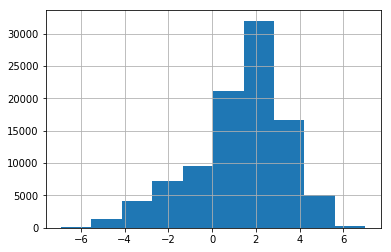

In [125]:
exploration_df.stay_length_days_log.hist(bins = 10);

It does appear that adding 0.001 to the stay-lengths and logging did reduce the skew of the distribution. 

### Creating the dummies

To begin, I will choose which columns should be converted to dummies. 

In [126]:
exploration_df.columns

Index(['stay_id', 'animal_id', 'intake_occurrence', 'animal_type', 'breed',
       'color', 'gender', 'gonadectomy', 'date_of_birth', 'name',
       'intake_datetime', 'found_location', 'intake_condition', 'intake_type',
       'intake_age_calc', 'age_upon_intake', 'outcome_datetime',
       'outcome_subtype', 'outcome_type', 'outcome_age_calc',
       'age_upon_outcome', 'stay_length', 'intake_age_days',
       'outcome_age_days', 'stay_length_days', 'stay_length_days_log'],
      dtype='object')

In [127]:
dummy_columns = ['animal_type', 'gender', 'gonadectomy', 'intake_condition', 'intake_type', 'outcome_subtype', 'outcome_type']

In [128]:
dummy_table = pd.get_dummies(exploration_df[dummy_columns])
exploration_df = exploration_df.join(dummy_table)
exploration_df.head()

stay_id animal_id  intake_occurrence animal_type                   breed  \
0  A793473_1   A793473                  1       Other                 Bat Mix   
1  A793466_1   A793466                  1         Cat  Domestic Shorthair Mix   
2  A793446_1   A793446                  1         Cat  Domestic Shorthair Mix   
3  A793439_1   A793439                  1         Dog  Labrador Retriever Mix   
4  A766326_3   A766326                  3         Dog      Siberian Husky Mix   

         color   gender gonadectomy date_of_birth    name  \
0  Brown/Brown  Unknown     Unknown    2017-04-25     NaN   
1  Brown Tabby  Unknown     Unknown    2019-03-25     NaN   
2         Blue     Male    Neutered    2017-04-25     NaN   
3  Black/White     Male    Neutered    2018-04-25  Barney   
4  White/White     Male      Intact    2016-02-06    Snow   

           ...          outcome_subtype_Underage outcome_type_Adoption  \
0          ...                                 0                     0   
1          ...                                 0                     0   
2          ...                                 0                     0   
3          ...                                 0                     0   
4          ...                                 0                     0   

  outcome_type_Died outcome_type_Disposal outcome_type_Euthanasia  \
0                 0                     0                       1   
1                 0                     0                       0   
2                 0                     0                       0   
3                 0                     0                       0   
4                 0                     0                       0   

  outcome_type_Missing outcome_type_Relocate outcome_type_Return to Owner  \
0                    0                     0                            0   
1                    0                     0                            0   
2                    0                     0                            0   
3                    0                     0                            1   
4                    0                     0                            1   

  outcome_type_Rto-Adopt outcome_type_Transfer  
0                      0                     0  
1                      0                     1  
2                      0                     1  
3                      0                     0  
4                      0                     0  

[5 rows x 80 columns]

The dummies generated as intended. 

### Exploring covariance with stay lengths

Given the many variables in the dataset, I will begin with generally visualizing the significant correlations with the stay-length and the transformed stay-lengths, which may help with narrowing the scope of the exploration. 

Also, since the dataset holds a wide variety of intakes (e.g. wildlife intakes and typical dog adoptions), it may be worthwhile to explore different subsets, such as specifically dogs or cats.

#### Correlations across the entire dataset

In [129]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

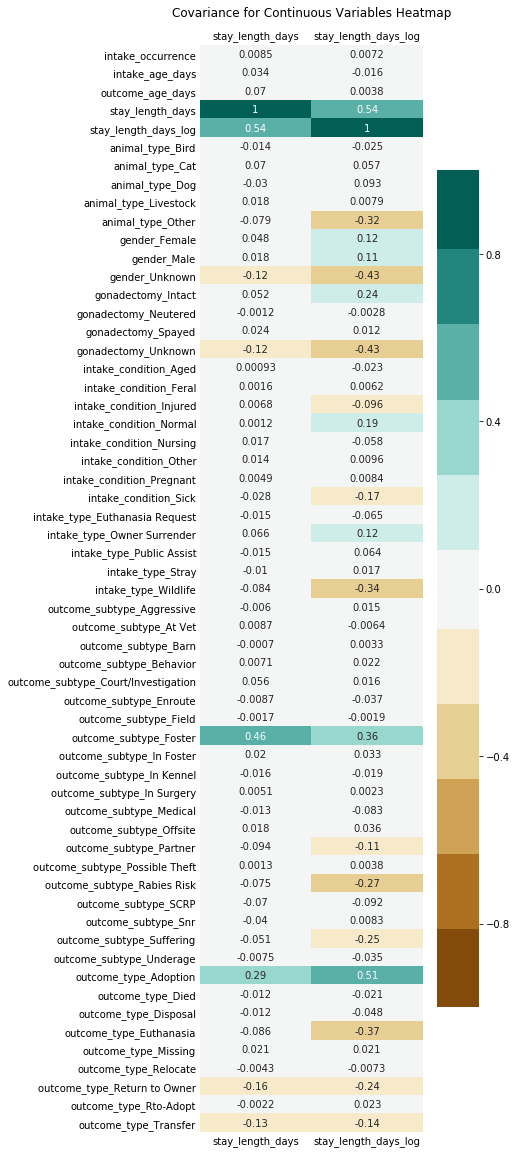

In [130]:
corr_table = exploration_df.corr()

plt.pyplot.figure(figsize = (5,20))
plt.pyplot.title('Covariance for Continuous Variables Heatmap', verticalalignment = 'top', position = (0.5, 1.03))
ax = sns.heatmap(corr_table[['stay_length_days','stay_length_days_log']], vmin = -1, center = 0, vmax = 1, annot=True, cmap = sns.color_palette("BrBG", 11))
ax.tick_params(axis = 'x', labeltop = True)
ax.tick_params(length = 0)

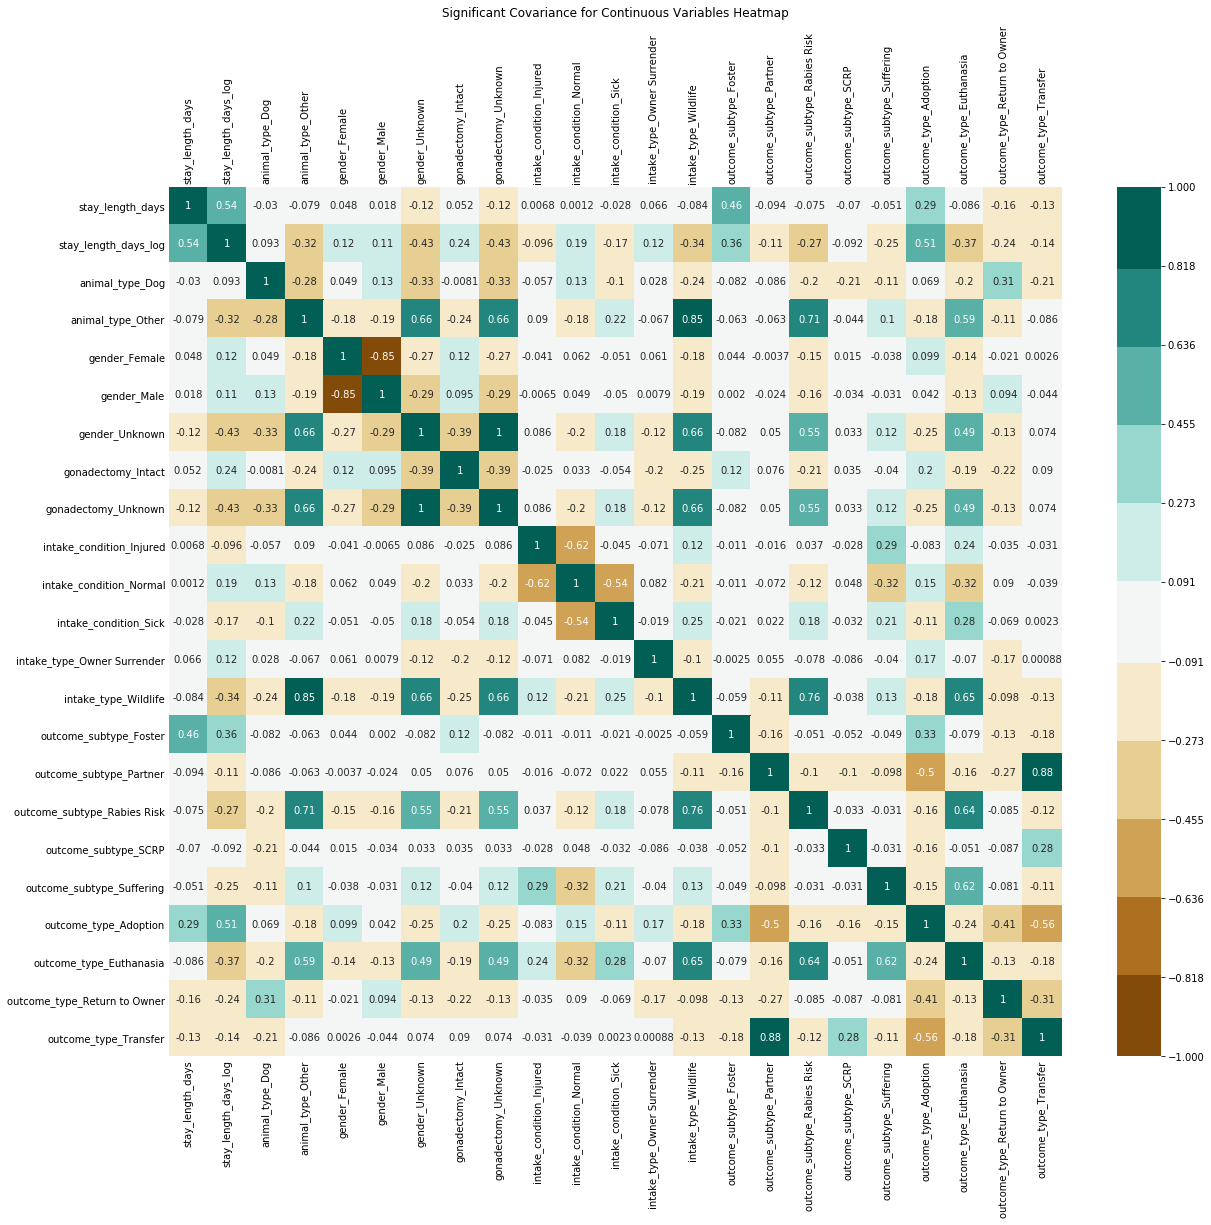

In [131]:
significant_corr_table = corr_table.query('(abs(stay_length_days) > (1/11)) | (abs(stay_length_days_log) > (1/11))')

plt.pyplot.figure(figsize = (20,16))
plt.pyplot.title('Significant Covariance for Continuous Variables Heatmap', verticalalignment = 'top', position = (0.5, 1.2))
ax = sns.heatmap(significant_corr_table.loc[:,significant_corr_table.index], vmin = -1, center = 0, vmax = 1, annot=True, cmap = sns.color_palette("BrBG", 11),
                cbar_kws=dict(ticks=np.arange(-1,1.01,2/11)))
ax.tick_params(length = 0)
ax.tick_params(axis = 'x', labeltop = True, labelrotation = 90)

It does appear the log-transformed stay-lengths correlate with more variables than the untransformed stay-lengths. Yet, the correlations do seem to involve the intake of wildlife (`animal_type_Other` and `intake_type_Wildlife`). 

Yet, to my limited knowledge, it does seem that a wildlife intake (e.g. rabies-risk bat to be euthanized) is fundamentally different from a cat or dog adoption. 

I will visualize the stays across animal-types and intake-types to see if these categories appears to explain variance in the stays.

C:\Users\anton\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


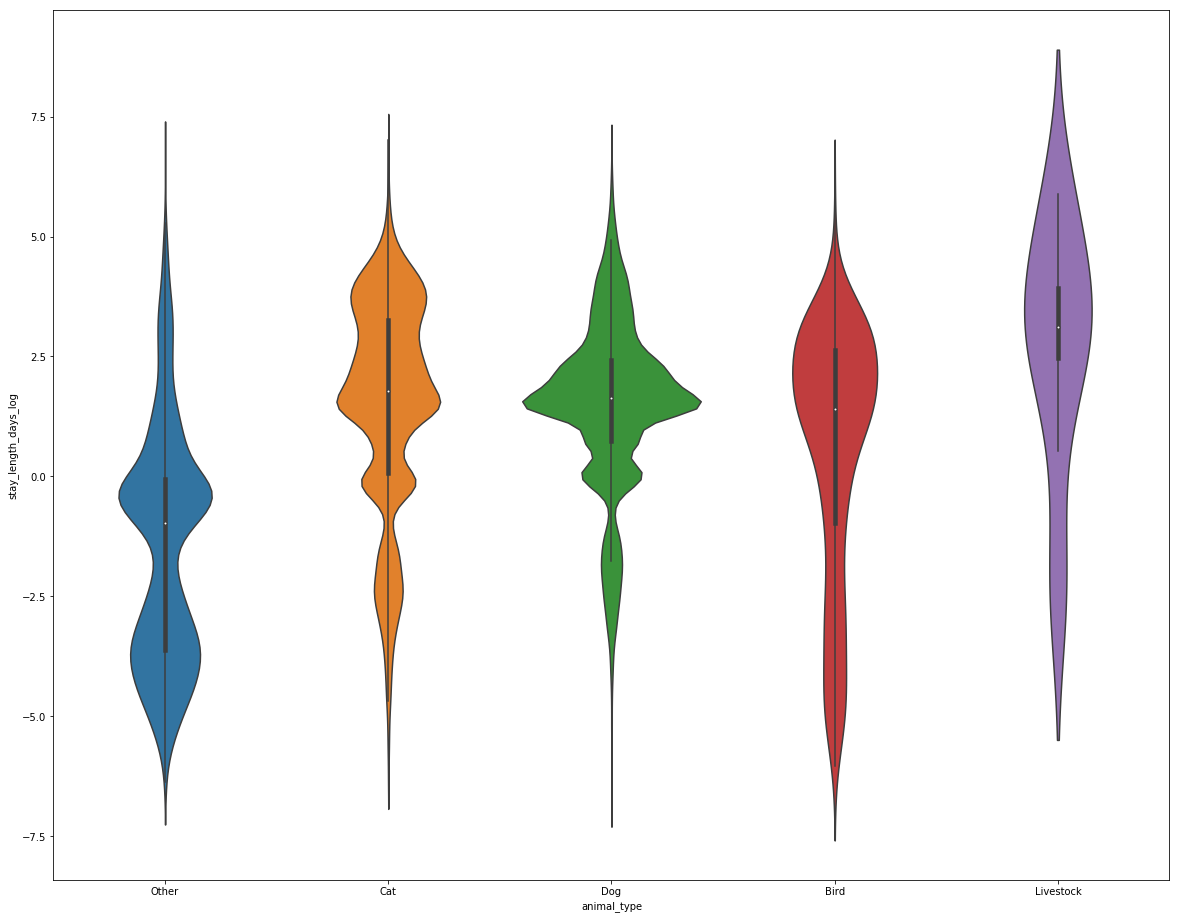

In [132]:
plt.pyplot.figure(figsize = (20,16))
sns.violinplot(data = exploration_df, x = 'animal_type', y = 'stay_length_days_log');

In [133]:
exploration_df.animal_type.value_counts()

Dog          55971
Cat          35730
Other         5262
Bird           448
Livestock       14
Name: animal_type, dtype: int64

The "Other", "Bird", and "Livestock" animal type distributions do appear to be significantly different from the "Dog" and "Cat" animal types. 

From reviewing the value counts, since a majority of the intakes are either dogs or cats, it might best to explore just these observations to reduce noise in the dataset in order to hopefully uncover any significant relationships.

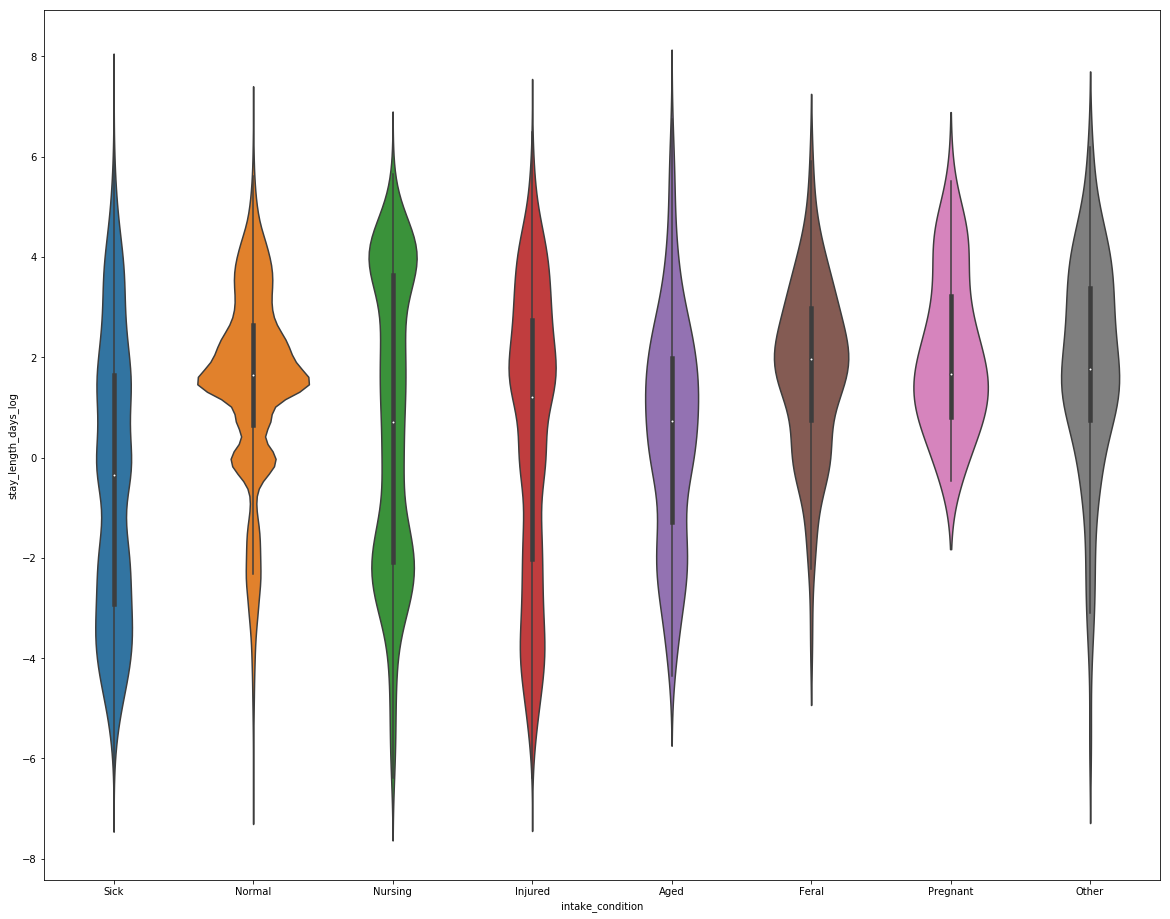

In [134]:
plt.pyplot.figure(figsize = (20,16))
sns.violinplot(data = exploration_df, x = 'intake_condition', y = 'stay_length_days_log');

In [135]:
exploration_df.intake_condition.value_counts()

Normal      85911
Injured      4838
Sick         3644
Nursing      2339
Aged          350
Other         190
Feral          98
Pregnant       55
Name: intake_condition, dtype: int64

Most of the non-normal intake-conditions do seem to have "wider" densities. It does seem that the intake-condition is associated with the stay-length somehow. It would be interesting to see if these apparent intake-condition effects hold when examining the particular animal types. 

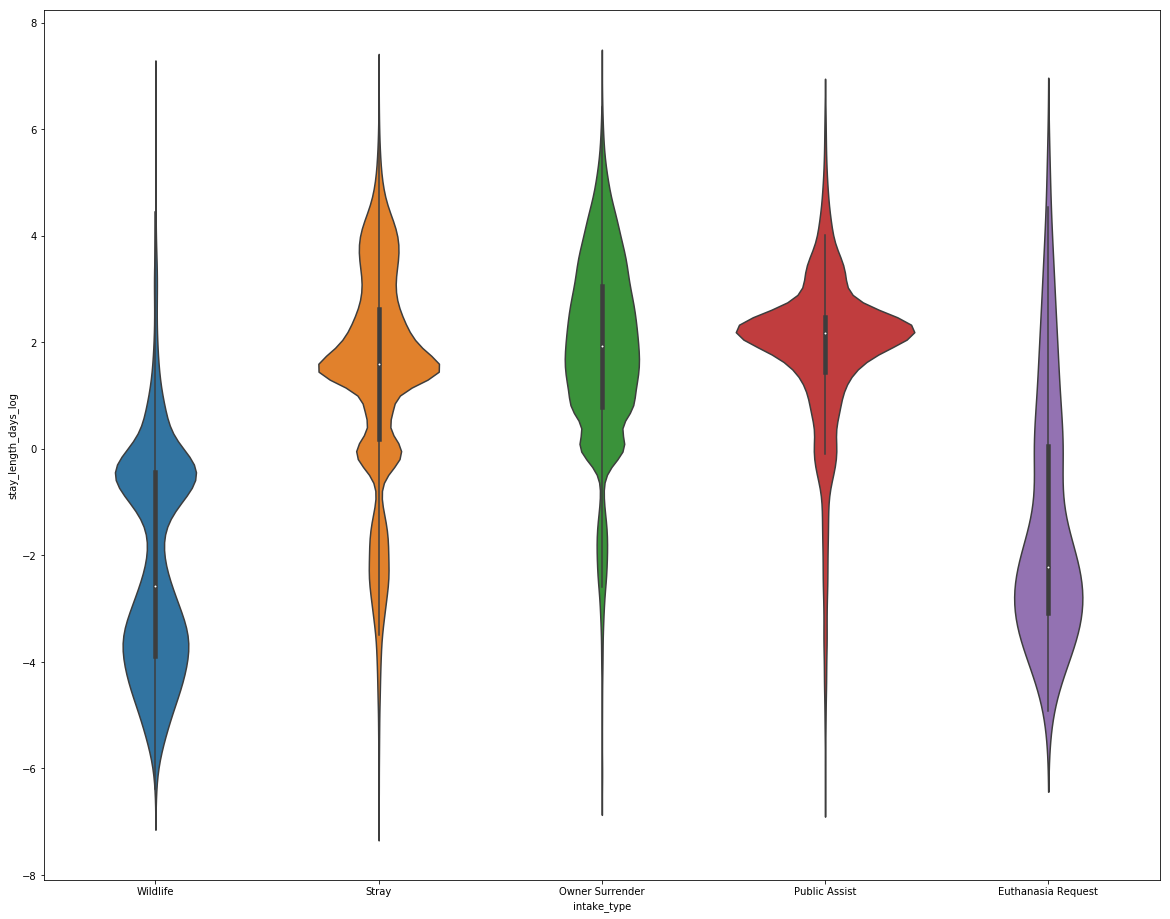

In [136]:
plt.pyplot.figure(figsize = (20,16))
sns.violinplot(data = exploration_df, x = 'intake_type', y = 'stay_length_days_log');

In [137]:
exploration_df.intake_type.value_counts()

Stray                 68599
Owner Surrender       18391
Public Assist          6175
Wildlife               4006
Euthanasia Request      254
Name: intake_type, dtype: int64

It appears that the "Stray", "Owner Surrender", and "Public Assist" are distributed about similar means, while the "Wildlife" and "Euthanasia Request" distributions do indicate shorter stays overall. The covariance table did indicate a significant positive correlations between wildlife intakes and euthanasia requests. Once the population of interest to reduced to cats and dogs, the intake type might have less of a substantial effect. 

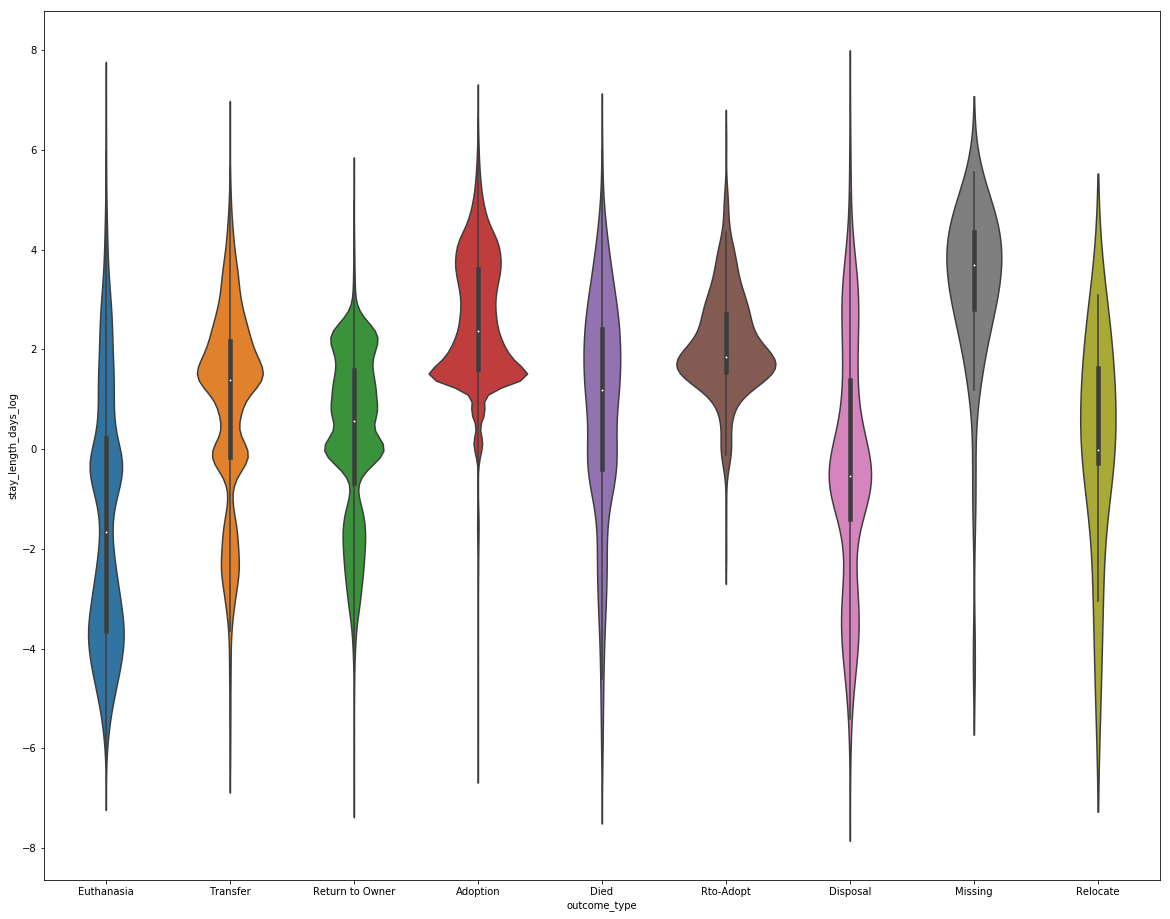

In [138]:
plt.pyplot.figure(figsize = (20,16))
sns.violinplot(data = exploration_df, x = 'outcome_type', y = 'stay_length_days_log');

In [139]:
exploration_df.outcome_type.value_counts()

Adoption           42146
Transfer           28668
Return to Owner    17918
Euthanasia          7021
Died                 867
Rto-Adopt            371
Disposal             357
Missing               53
Relocate              16
Name: outcome_type, dtype: int64

The "adoption" outcome-type is the most common outcome, and it appears to produce the longest stays, outside of the "Missing" outcome, which only has 53 occurrences.

##### Recap

As seen in the above visualizations, specifically with the animal-types and intake-types, it appears that the significant correlations found mainly concerned variance associated mainly with dogs and cats pertaining to adoptions, while the other animal-types pertaining more to other services, such as euthanasia-requests. Given the prevalence of dog and cat intakes, it might be best to explore these subpopulations.  

Overall, in addition to focusing specifically on dogs and cats, it might also be worthwhile to focus on adoptions, given they are the most common outcome and effectively produce the longest stays in the center, thus motivating understanding the relevant associations in hopes of potentially predicting the stay-length of a new intake. 

#### Exploring the dog population

To begin, I will explore the dog population using the same methodology as before. 

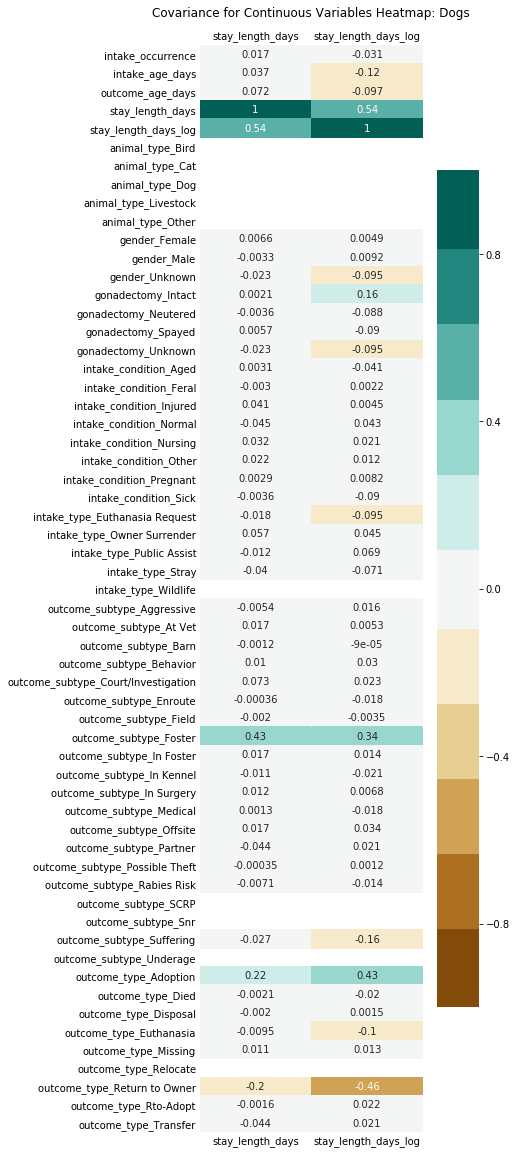

In [140]:
dogs_corr_table = exploration_df[exploration_df.animal_type == "Dog"].corr()

plt.pyplot.figure(figsize = (5,20))
plt.pyplot.title('Covariance for Continuous Variables Heatmap: Dogs', verticalalignment = 'top', position = (0.5, 1.03))
ax = sns.heatmap(dogs_corr_table[['stay_length_days', 'stay_length_days_log']], vmin = -1, center = 0, vmax = 1, annot=True, cmap = sns.color_palette("BrBG", 11))
ax.tick_params(axis = 'x', labeltop = True)
ax.tick_params(length = 0)

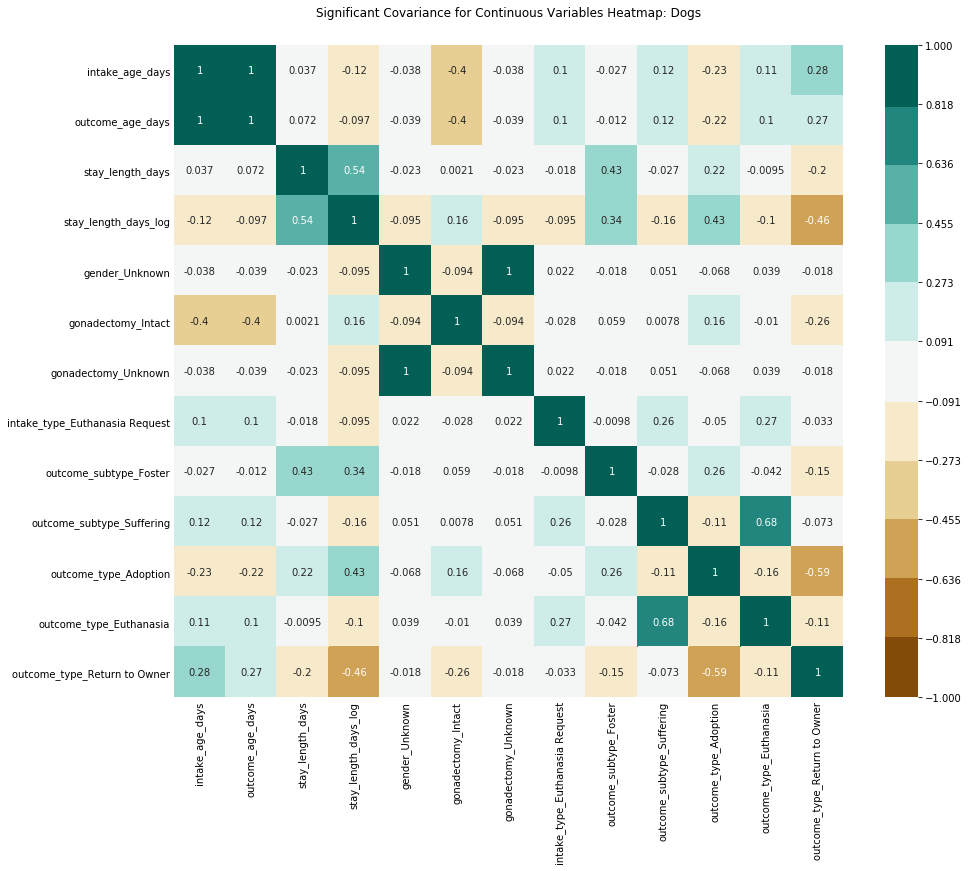

In [141]:
significant_dogs_corr_table = dogs_corr_table.query('(abs(stay_length_days) > (1/11)) | (abs(stay_length_days_log) > (1/11))')

plt.pyplot.figure(figsize = (15,12))
plt.pyplot.title('Significant Covariance for Continuous Variables Heatmap: Dogs', verticalalignment = 'top', position = (0.5, 1.05))
ax = sns.heatmap(significant_dogs_corr_table.loc[:,significant_dogs_corr_table.index], vmin = -1, center = 0, vmax = 1, annot=True, cmap = sns.color_palette("BrBG", 11),
                cbar_kws=dict(ticks=np.arange(-1,1.01,2/11)))
ax.tick_params(length = 0)

The continuous variables with significant correlations are the age variables (`intake_age_days` and `outcome_age_days`), and the relevant categorical variables are gender, gonadectomy, intake-type, outcome-type, and outcome-subtype. 

I will scatter `intake_age_days` and `stay_length_days_log` to see if there is a visible relationship, and then construct violin-plots for the categorical variables. 

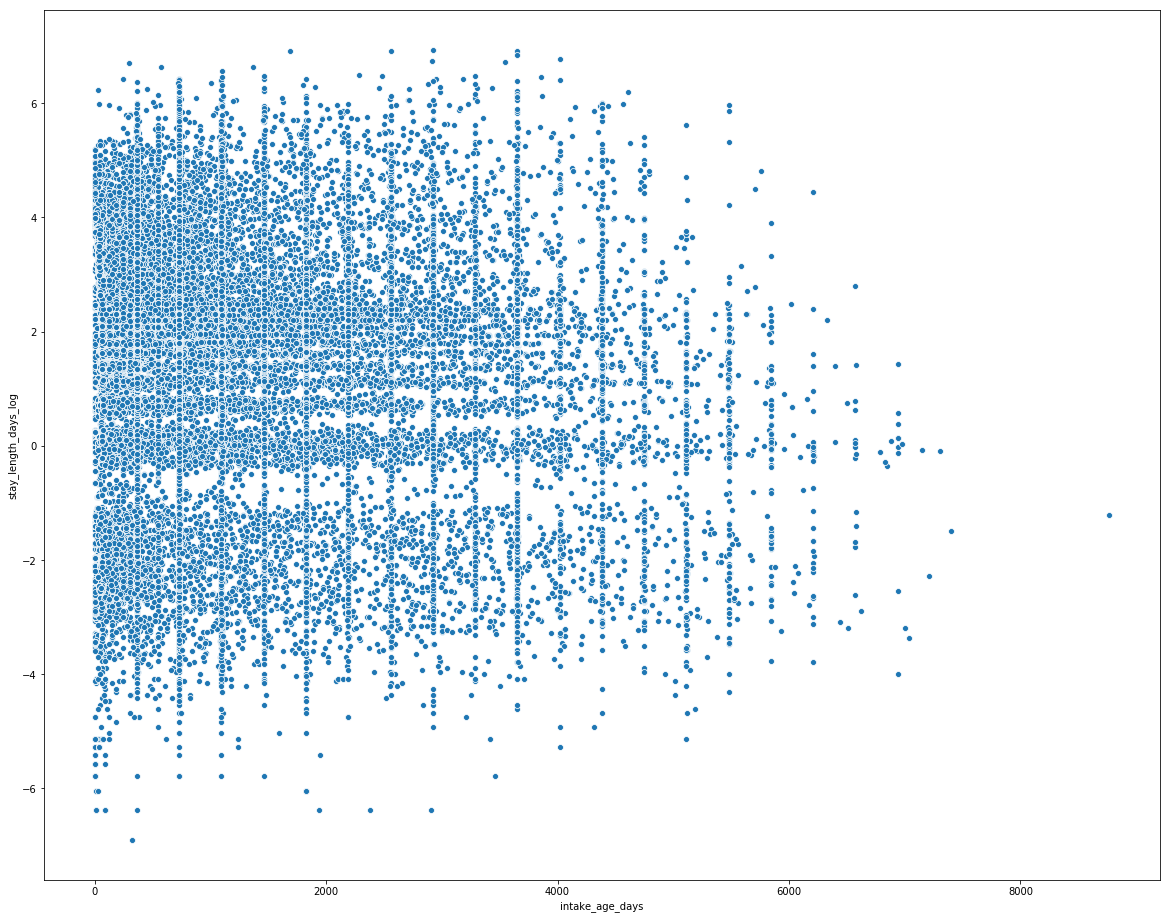

In [142]:
plt.pyplot.figure(figsize = (20,16))
sns.scatterplot(x=exploration_df[exploration_df.animal_type == "Dog"].intake_age_days, y=exploration_df[exploration_df.animal_type == "Dog"].stay_length_days_log);

There doesn't appear to be a relation here, yet that may be due to there being a lot of points to plot. 

I will contruct a 2D density heatmap to visualize the relationship.

<Figure size 1440x1152 with 0 Axes>

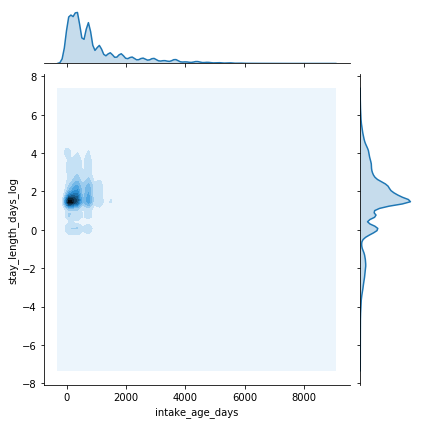

In [143]:
dogs_exploration_df = exploration_df[exploration_df.animal_type == "Dog"]

plt.pyplot.figure(figsize = (20,16));
sns.jointplot(x=dogs_exploration_df.intake_age_days, y=dogs_exploration_df.stay_length_days_log, kind = "kde");

That didn't seem to illuminate a relationship. I will try to also log the age variable. 

<Figure size 1440x1152 with 0 Axes>

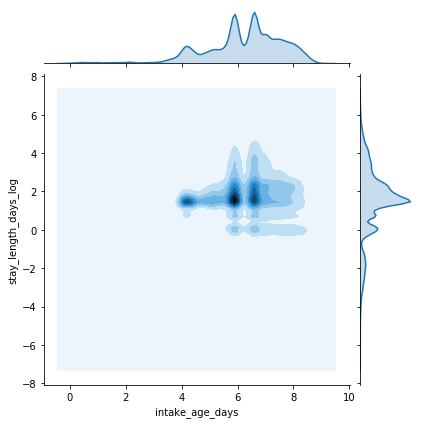

In [144]:
plt.pyplot.figure(figsize = (20,16));
sns.jointplot(x=dogs_exploration_df.intake_age_days.apply(lambda x: np.log(x + 1)), y=dogs_exploration_df.stay_length_days_log, kind = "kde");

Perhaps there is a relationship here, though it's difficult to see for certain. 

I will now visualize the categorical variables, beginning with gender. 

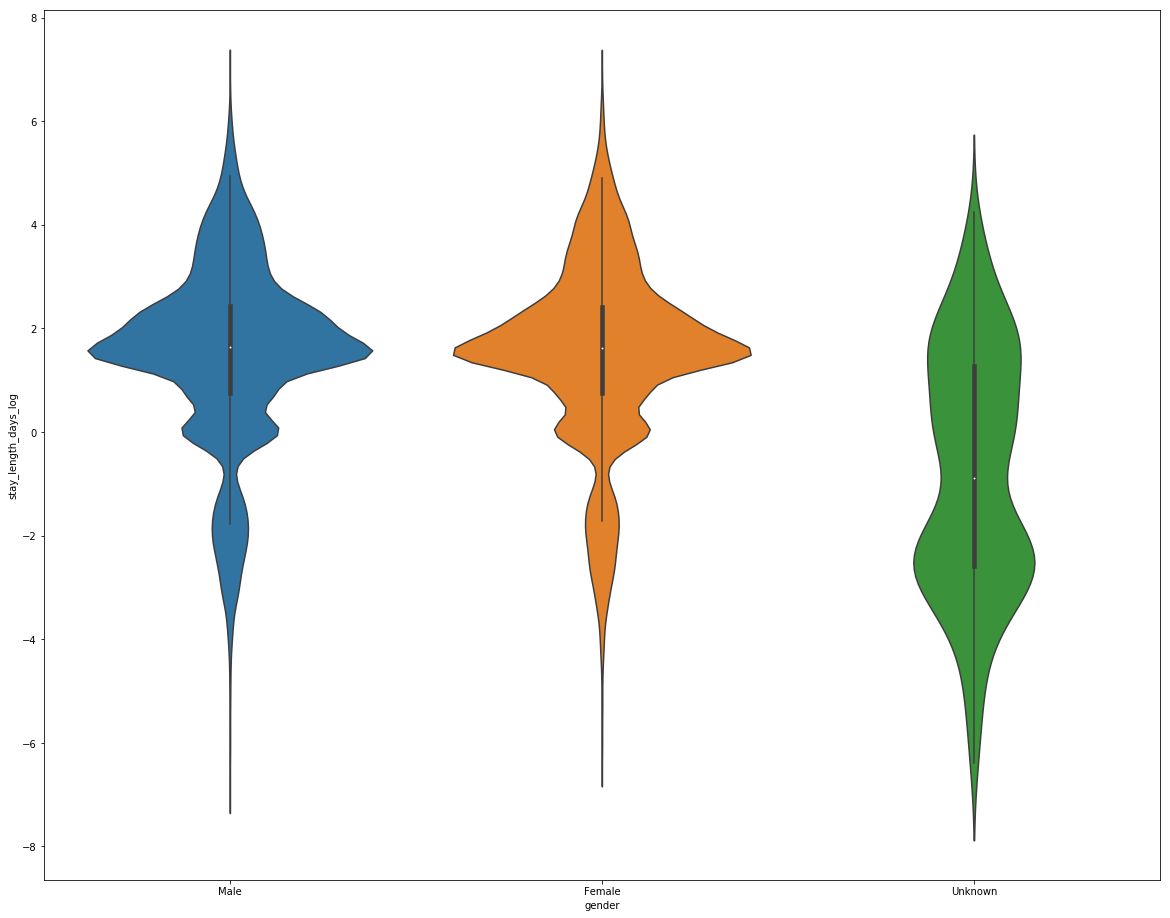

In [145]:
plt.pyplot.figure(figsize = (20,16));
sns.violinplot(data = dogs_exploration_df, x = 'gender', y = 'stay_length_days_log');

In [146]:
dogs_exploration_df.gender.value_counts()

Male       29976
Female     25692
Unknown      303
Name: gender, dtype: int64

The female and male distributions look nearly identical, while the unknown genders appear significantly different. Referring to the covariance table, the unknown gender values don't appear to have a significant covariance with the other fields. Given that they only account for 303 rows, I won't explore this subpopulation any further. 

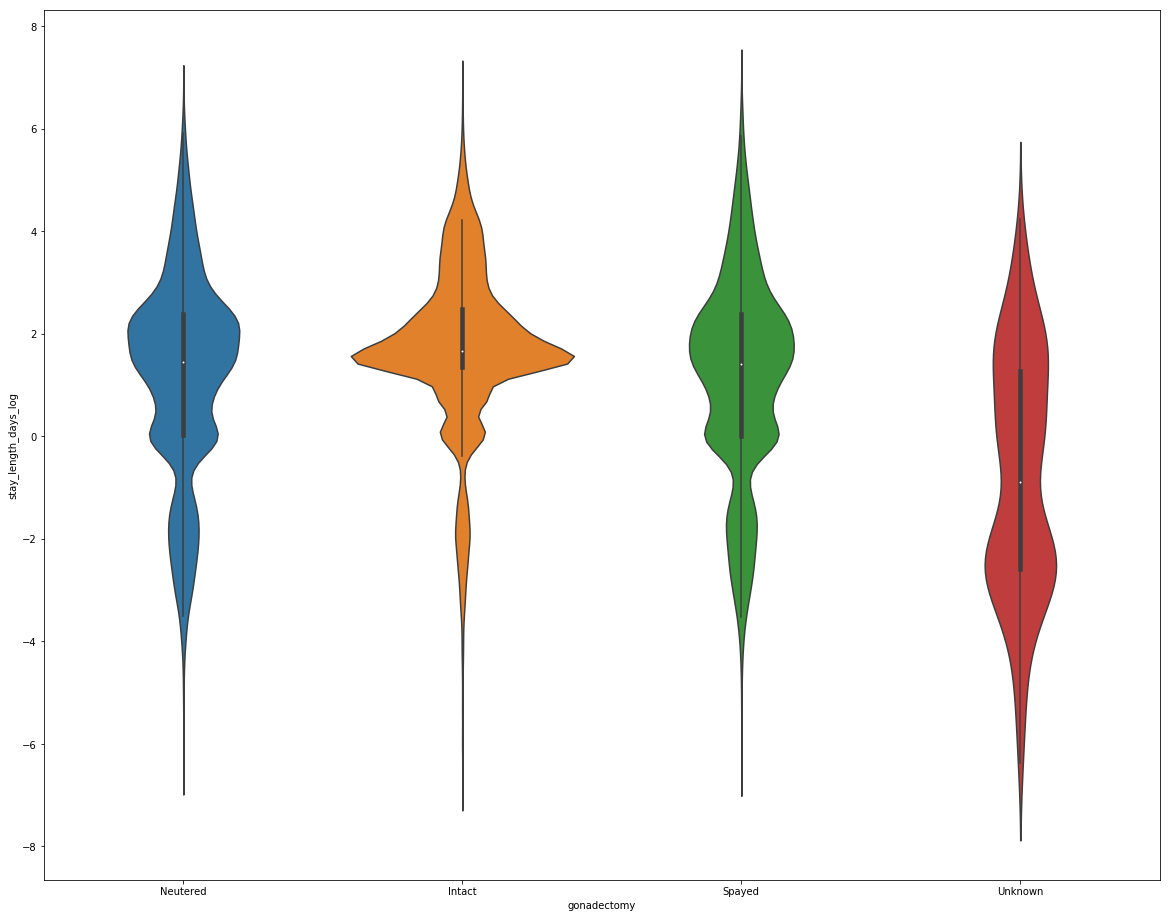

In [147]:
plt.pyplot.figure(figsize = (20,16))
sns.violinplot(data = dogs_exploration_df, x = 'gonadectomy', y = 'stay_length_days_log');

In [148]:
dogs_exploration_df.gonadectomy.value_counts()

Intact      34588
Neutered    11463
Spayed       9617
Unknown       303
Name: gonadectomy, dtype: int64

Perhaps unsurprisingly, the "Spayed" and "Neutered" gonadectomy states have similar distributions. The "Intact" gonadectomy does appear to be more densely populated about its mean than the spayed or neutered distributions. Yet, it's unclear visually whether any of the distributions generally have higher values than the others. Though, this might be expected given the correlation between the intact state and the log of the stay-lengths is only 0.16. 

With the "Unknown" state only having 303 observations, I won't explore this subset any further. 

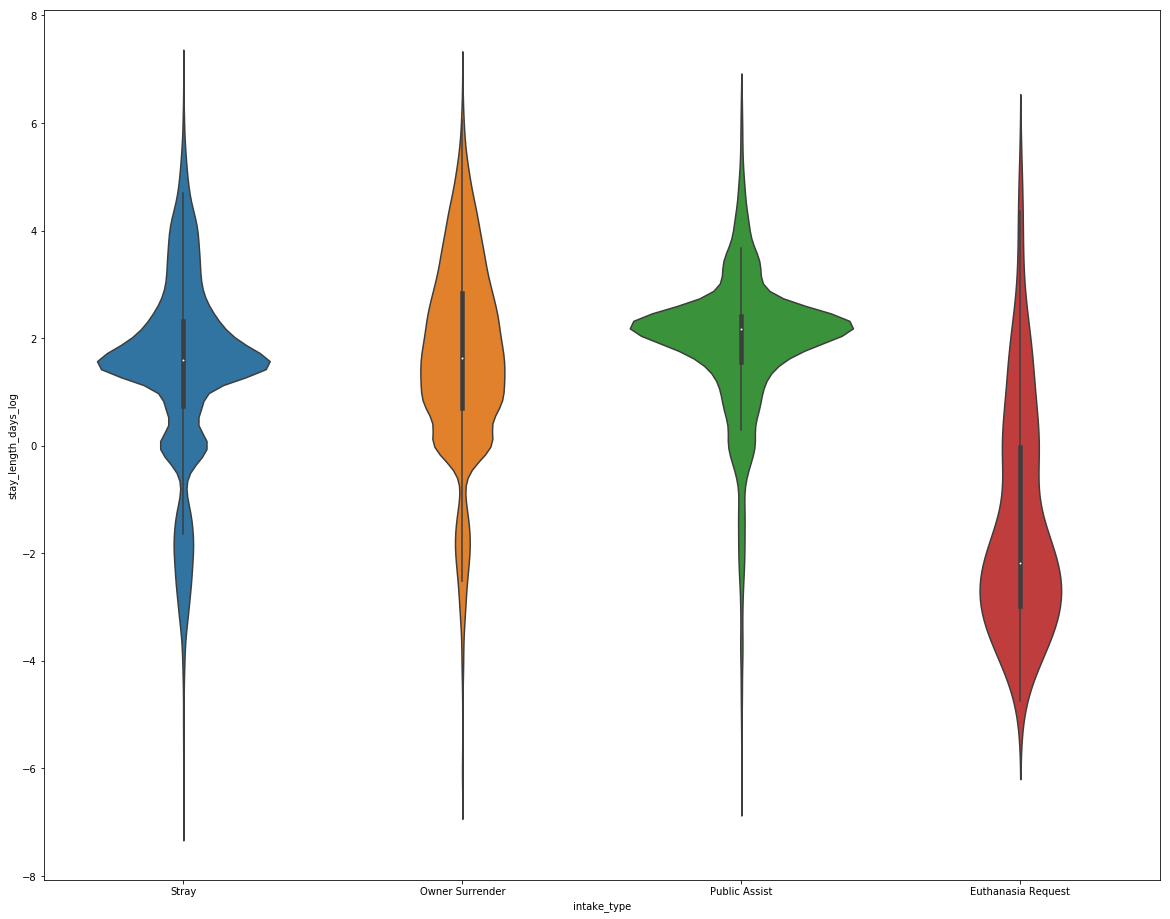

In [149]:
plt.pyplot.figure(figsize = (20,16))
sns.violinplot(data = dogs_exploration_df, x = 'intake_type', y = 'stay_length_days_log');

In [150]:
dogs_exploration_df.intake_type.value_counts()

Stray                 39707
Owner Surrender       11086
Public Assist          4997
Euthanasia Request      181
Name: intake_type, dtype: int64

Interestingly, the stray intakes are densely populated about the mean, while the owner surrenders are more smoothly distributed. 

It might be worthwhile to explore the intake types further when examining a narrower scope of the dataset (e.g. adoptions). 

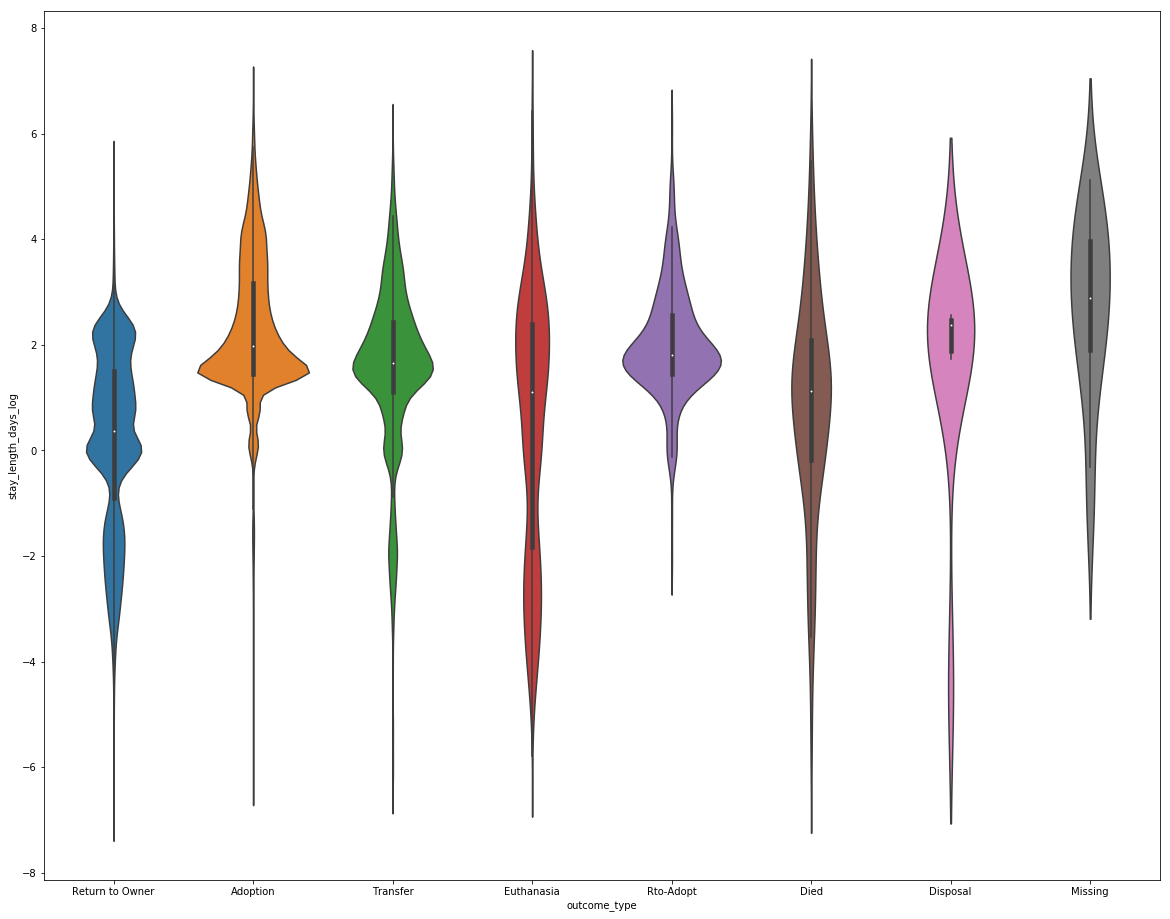

In [151]:
plt.pyplot.figure(figsize = (20,16))
sns.violinplot(data = dogs_exploration_df, x = 'outcome_type', y = 'stay_length_days_log');

In [152]:
dogs_exploration_df.outcome_type.value_counts()

Adoption           25871
Return to Owner    16071
Transfer           11942
Euthanasia          1567
Rto-Adopt            303
Died                 185
Missing               18
Disposal              11
Name: outcome_type, dtype: int64

Adoptions again comprise most of the outcomes, and also are associated with longer stays than other outcome types with a significant number of observations. 

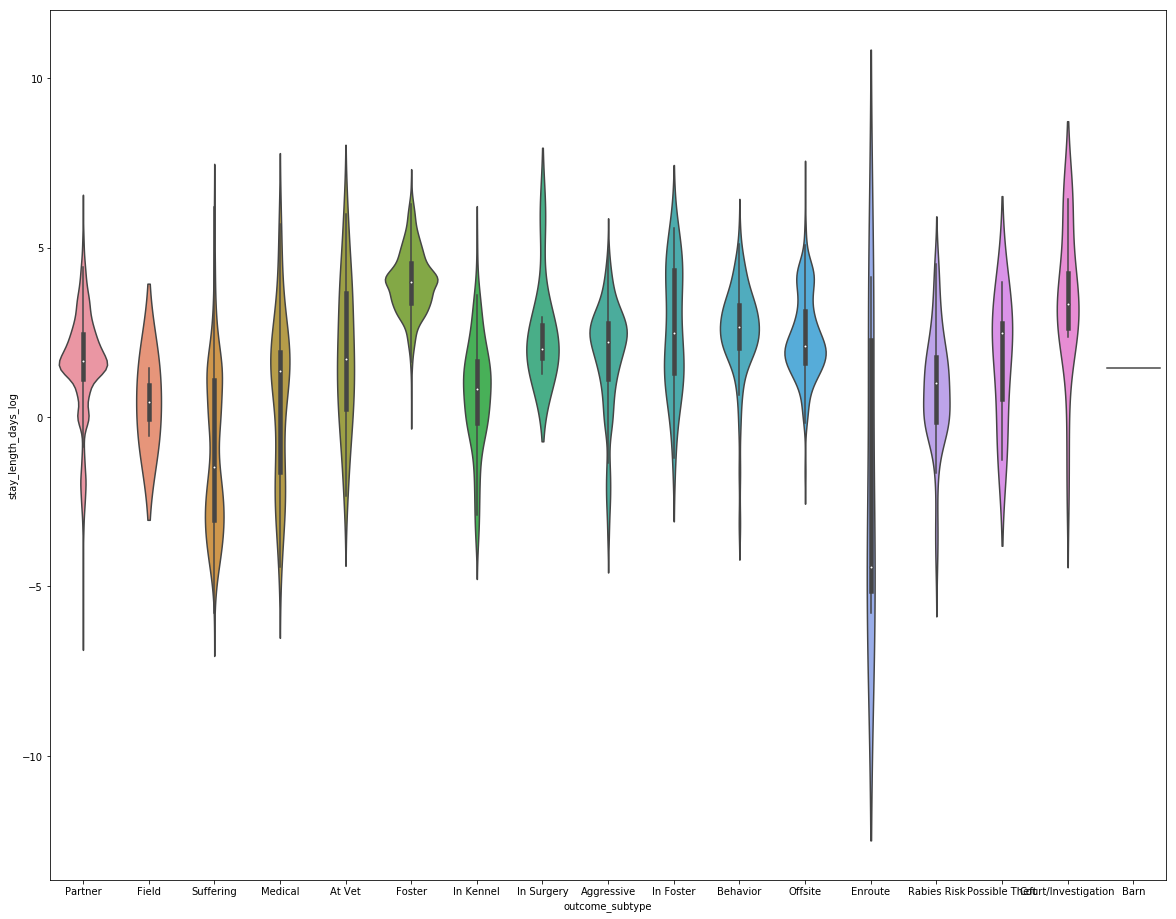

In [153]:
plt.pyplot.figure(figsize = (20,16))
sns.violinplot(data = dogs_exploration_df, x = 'outcome_subtype', y = 'stay_length_days_log');

In [154]:
dogs_exploration_df.outcome_subtype.value_counts()

Partner                11941
Foster                  3159
Suffering                736
Aggressive               497
Offsite                  264
Behavior                 136
In Kennel                118
Rabies Risk               85
Medical                   66
At Vet                    40
In Foster                 28
Court/Investigation       22
In Surgery                 8
Possible Theft             7
Enroute                    5
Field                      2
Barn                       1
Name: outcome_subtype, dtype: int64

With a positive correlation of 0.43 between the "Foster" subtype and the log of the stays, it does seem from reviewing the violin plot that the entire Foster distribution has high values than the other subtypes, and thus there does appear to be a significant relationship here. 

##### Recap

All variables and categories, outside of gender, appeared to have a significant relationship with the stay-length. 

#### Exploring dog adoptions

Given dog adoptions comprised a significant portion of the dataset, and that the adoptions entail longer stays in the center, I explore the dog adoptions here for significant relationships. 

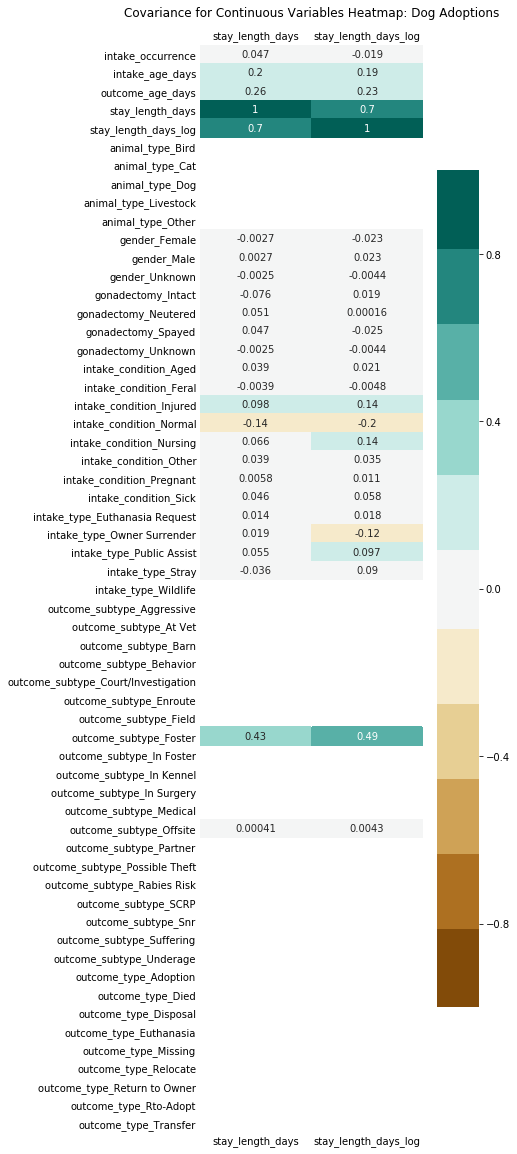

In [155]:
dog_adoptions_corr = exploration_df[(exploration_df.animal_type == "Dog") & (exploration_df.outcome_type == "Adoption")].corr()

plt.pyplot.figure(figsize = (5,20))
plt.pyplot.title('Covariance for Continuous Variables Heatmap: Dog Adoptions', verticalalignment = 'top', position = (0.5, 1.03))
ax = sns.heatmap(dog_adoptions_corr[['stay_length_days', 'stay_length_days_log']], vmin = -1, center = 0, vmax = 1, annot=True, cmap = sns.color_palette("BrBG", 11))
ax.tick_params(axis = 'x', labeltop = True)
ax.tick_params(length = 0)

In [156]:
significant_dogadoption_corr_table = dog_adoptions_corr.query('(abs(stay_length_days) > (1/11)) | (abs(stay_length_days_log) > (1/11))')

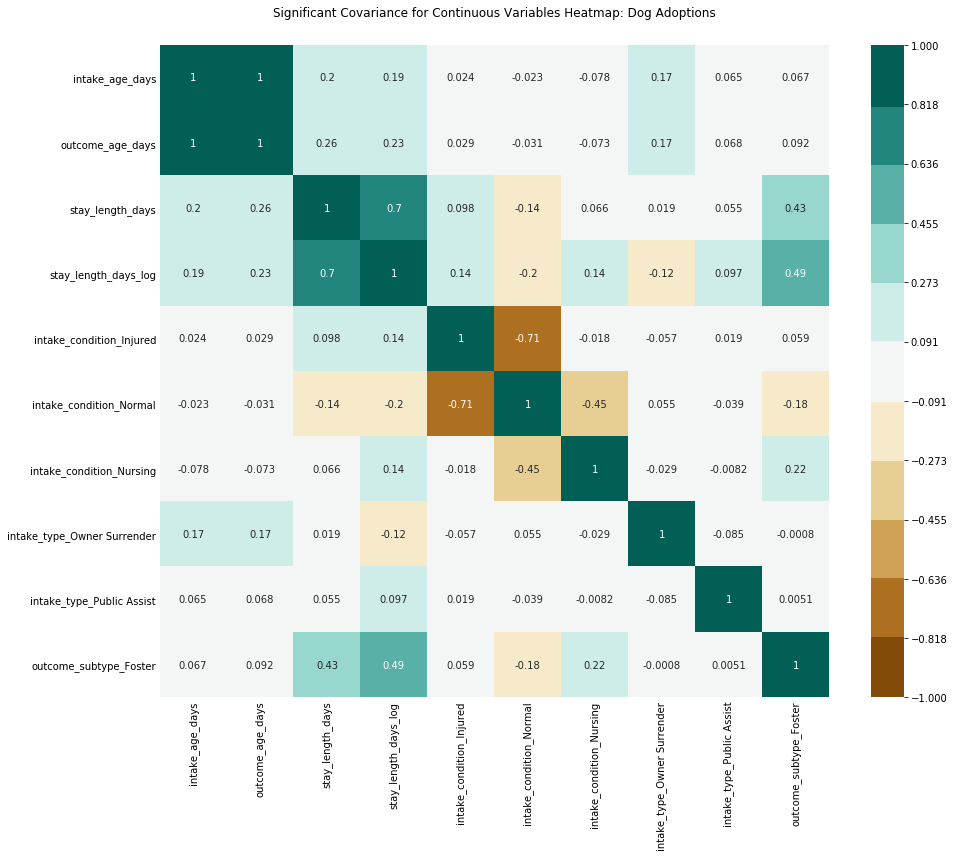

In [157]:
plt.pyplot.figure(figsize = (15,12))
plt.pyplot.title('Significant Covariance for Continuous Variables Heatmap: Dog Adoptions', verticalalignment = 'top', position = (0.5, 1.05))
ax = sns.heatmap(significant_dogadoption_corr_table.loc[:,significant_dogadoption_corr_table.index], vmin = -1, center = 0, vmax = 1, annot=True, cmap = sns.color_palette("BrBG", 11),
                cbar_kws=dict(ticks=np.arange(-1,1.01,2/11)))
ax.tick_params(length = 0)

For dog adoptions, the intake and outcome age variables produced significant correlations with the stay lengths. 

The intake-condition, intake-type, and outcome-subtype categorical variables produced significant correlations. 

<Figure size 1440x1152 with 0 Axes>

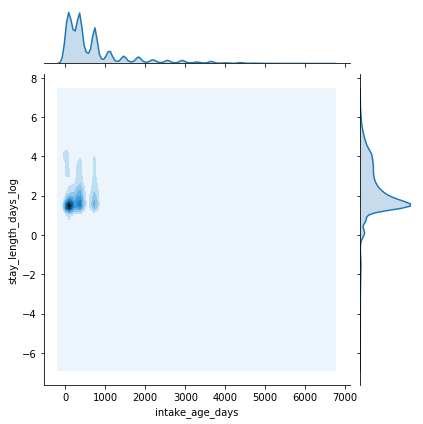

In [158]:
dogadoptions_exploration_df = exploration_df[(exploration_df.animal_type == "Dog") & (exploration_df.outcome_type == "Adoption")]

plt.pyplot.figure(figsize = (20,16))
sns.jointplot(x=dogadoptions_exploration_df.intake_age_days, y=dogadoptions_exploration_df.stay_length_days_log, kind = "kde");

<Figure size 1440x1152 with 0 Axes>

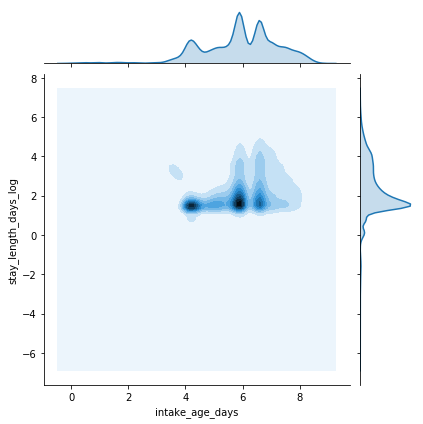

In [159]:
plt.pyplot.figure(figsize = (20,16));
sns.jointplot(x=dogadoptions_exploration_df.intake_age_days.apply(lambda x: np.log(x + 1)), y=dogadoptions_exploration_df.stay_length_days_log, kind = "kde");

By logging both the stay length and the intake age, there is actually something resembling a linear relationship here, yet the line almost looks flat. It may be better to explore this relationship statistically, e.g. via multivariate regression.

I will also check the stay-length against the outcome-age, yet I anticipate the same result. 

<Figure size 1440x1152 with 0 Axes>

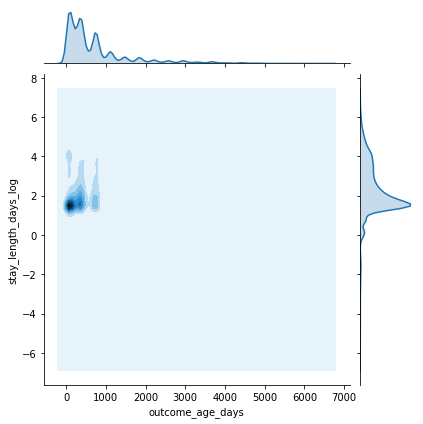

In [160]:
plt.pyplot.figure(figsize = (20,16));
sns.jointplot(x=dogadoptions_exploration_df.outcome_age_days, y=dogadoptions_exploration_df.stay_length_days_log, kind = "kde");

<Figure size 1440x1152 with 0 Axes>

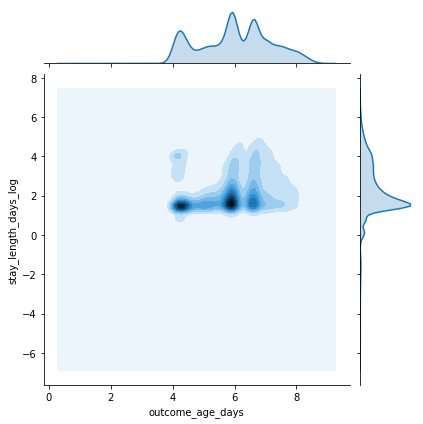

In [161]:
plt.pyplot.figure(figsize = (20,16));
sns.jointplot(x=dogadoptions_exploration_df.outcome_age_days.apply(lambda x: np.log(x + 1)), y=dogadoptions_exploration_df.stay_length_days_log, kind = "kde");

As probably to be expected, the result here is similar to the intake-age, where perhaps there might be a positive linear relationship, but it might be better as a single independent variable in a multivariate regression. 

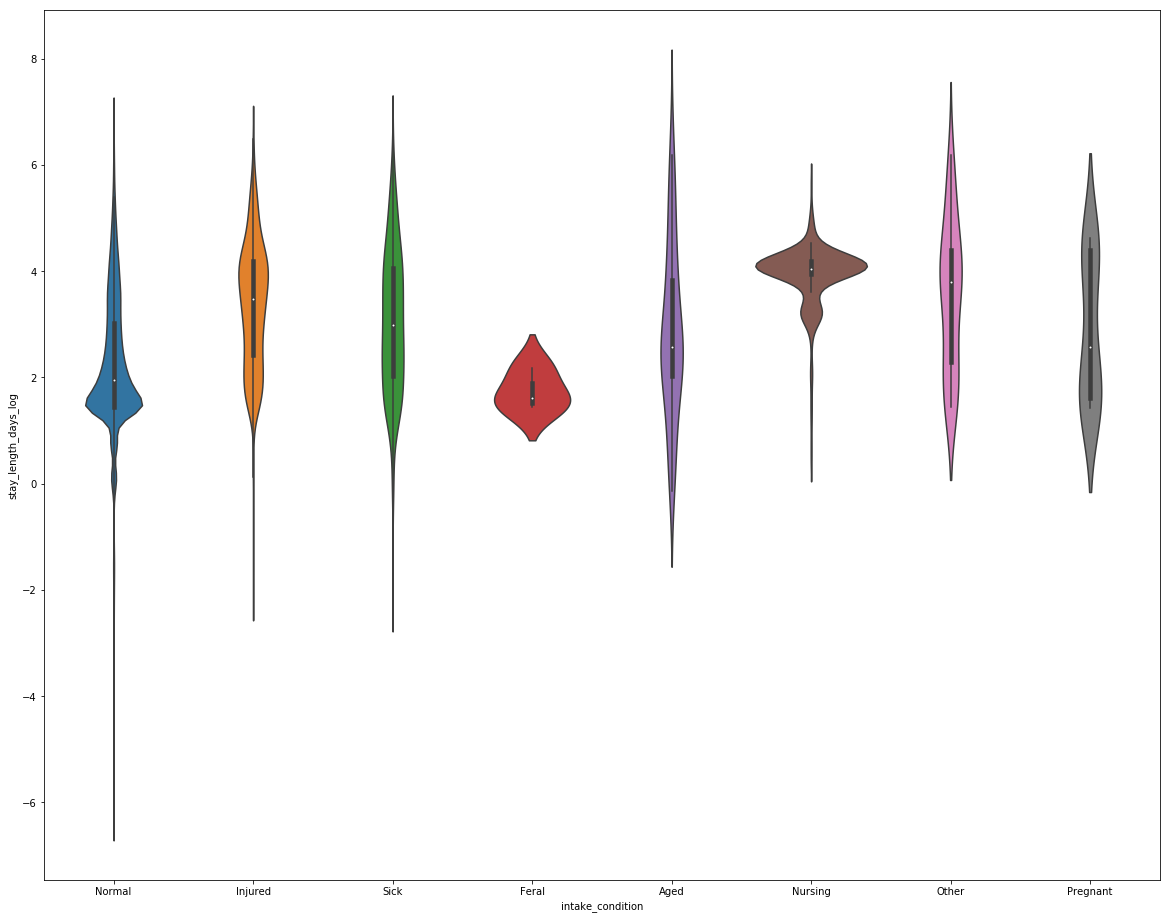

In [162]:
# violin for intake condition
plt.pyplot.figure(figsize = (20,16))
sns.violinplot(data = dogadoptions_exploration_df, x = 'intake_condition', y = 'stay_length_days_log');

In [163]:
dogadoptions_exploration_df.intake_condition.value_counts()

Normal      24465
Injured       726
Nursing       299
Sick          264
Aged           63
Other          36
Pregnant       15
Feral           3
Name: intake_condition, dtype: int64

The covariance analysis indicated a positive correlation with the injured and nursing conditions, and a negative correlation with normal condition. This is visible with the violin plots, and is intuitive since if the dog is not "normal", then the center has to provide healthcare in addition to boarding. 

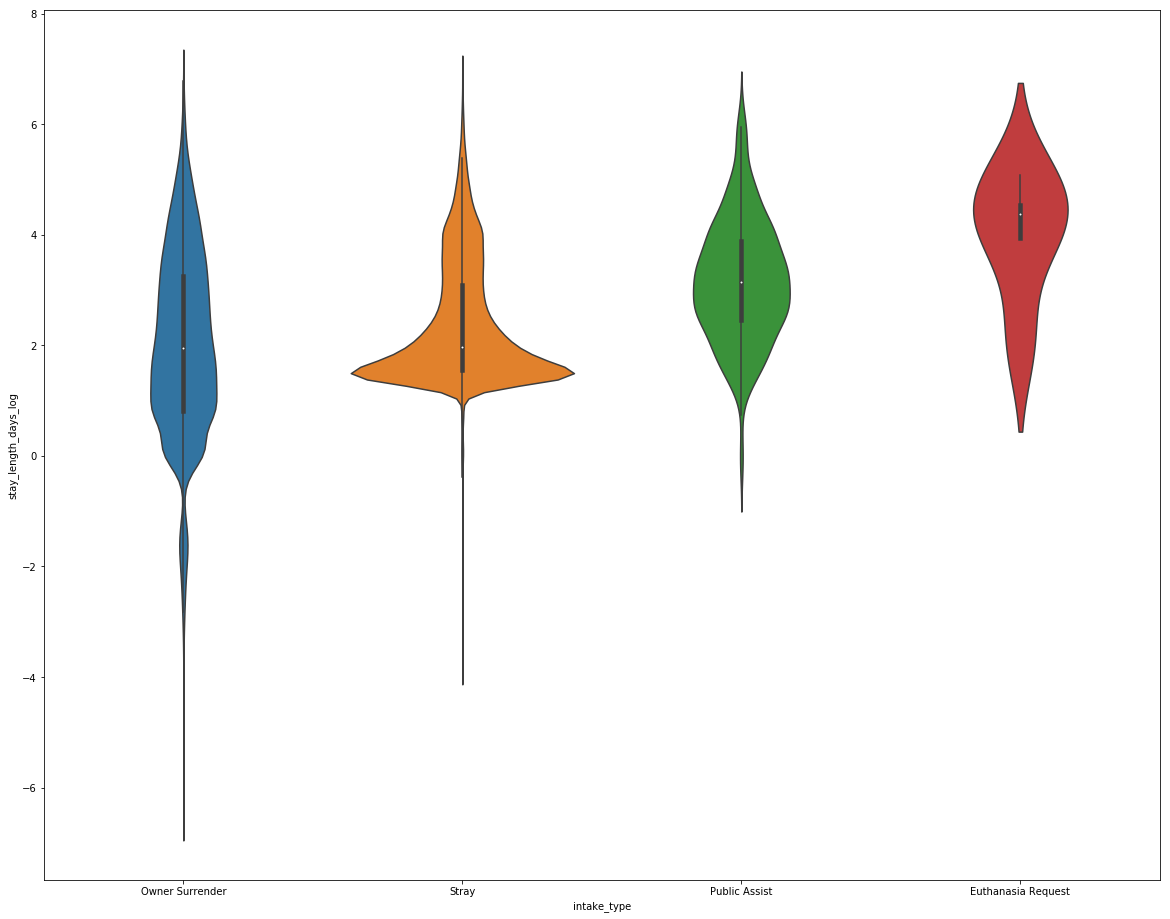

In [164]:
# violin for intake type

plt.pyplot.figure(figsize = (20,16))
sns.violinplot(data = dogadoptions_exploration_df, x = 'intake_type', y = 'stay_length_days_log');

In [165]:
dogadoptions_exploration_df.intake_type.value_counts()

Stray                 18788
Owner Surrender        6539
Public Assist           539
Euthanasia Request        5
Name: intake_type, dtype: int64

The "Euthanasia Request" intake-type can reasonably be disregarded as there are only 5 observations.

The other three types do seem to have significantly different shapes of distributions, so the intake-type might be useful categorical variable. 

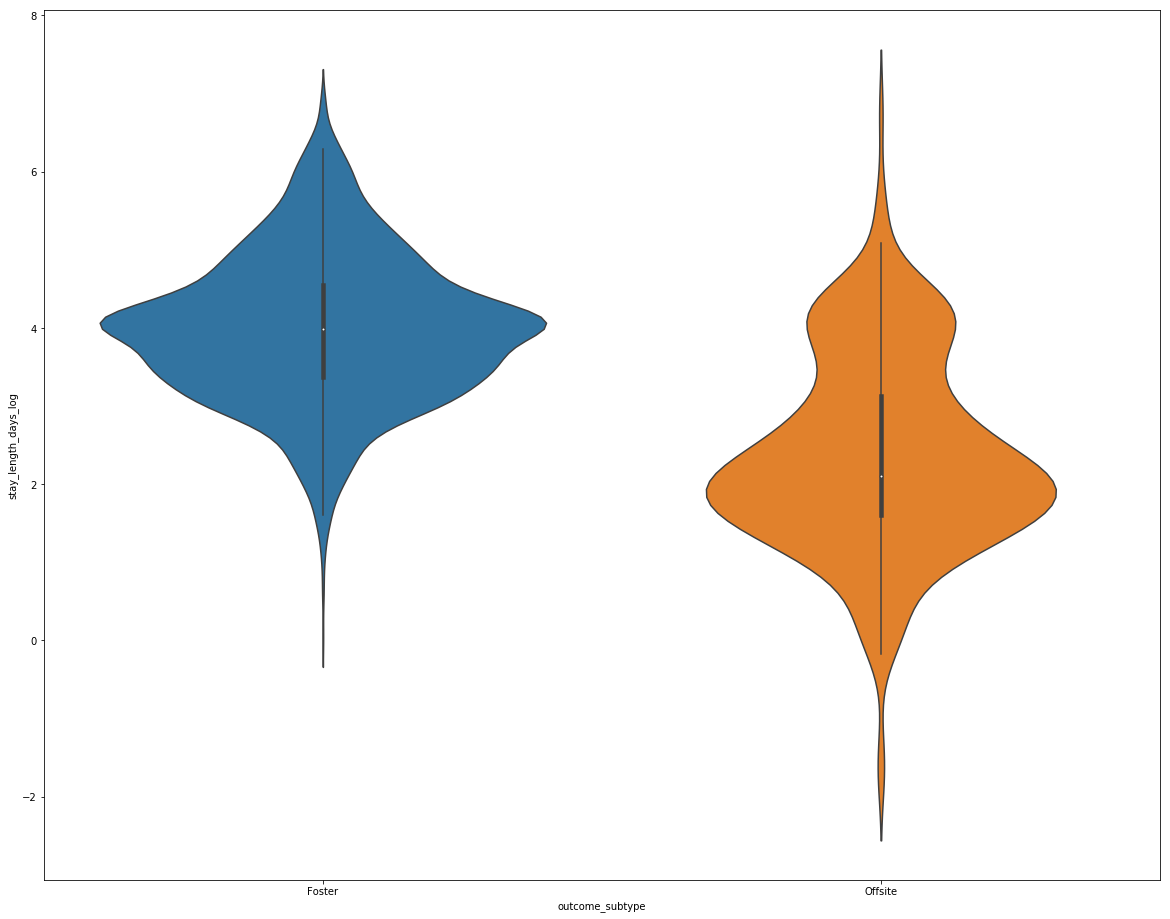

In [166]:
# violin for outcome subtype

plt.pyplot.figure(figsize = (20,16))
sns.violinplot(data = dogadoptions_exploration_df, x = 'outcome_subtype', y = 'stay_length_days_log');

In [167]:
dogadoptions_exploration_df.outcome_subtype.value_counts()

Foster     3157
Offsite     264
Name: outcome_subtype, dtype: int64

As the results are predominantly Foster outcome-subtypes, I'm unsure that outcome-subtype is worth exporing further.

##### Recap

For the adoptions, it does appear that the age of the animal, the intake-condition, and the intake-type might be associated with the amount of time before adoption. 

#### Exploring the cat population

Using the same methodology used for the exploration of the dog population, I will now explore the cat population. 

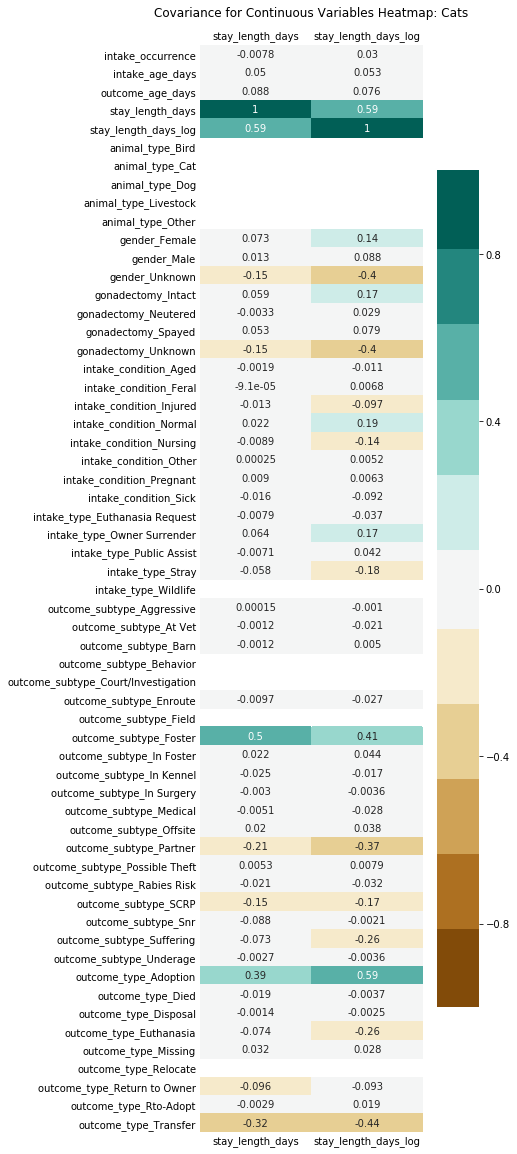

In [168]:
cats_corr_table = exploration_df[exploration_df.animal_type == "Cat"].corr()

plt.pyplot.figure(figsize = (5,20))
plt.pyplot.title('Covariance for Continuous Variables Heatmap: Cats', verticalalignment = 'top', position = (0.5, 1.03))
ax = sns.heatmap(cats_corr_table[['stay_length_days', 'stay_length_days_log']], vmin = -1, center = 0, vmax = 1, annot=True, cmap = sns.color_palette("BrBG", 11))
ax.tick_params(axis = 'x', labeltop = True)
ax.tick_params(length = 0)

In [169]:
significant_cats_corr_table = cats_corr_table.query('(abs(stay_length_days) > (1/11)) | (abs(stay_length_days_log) > (1/11))')

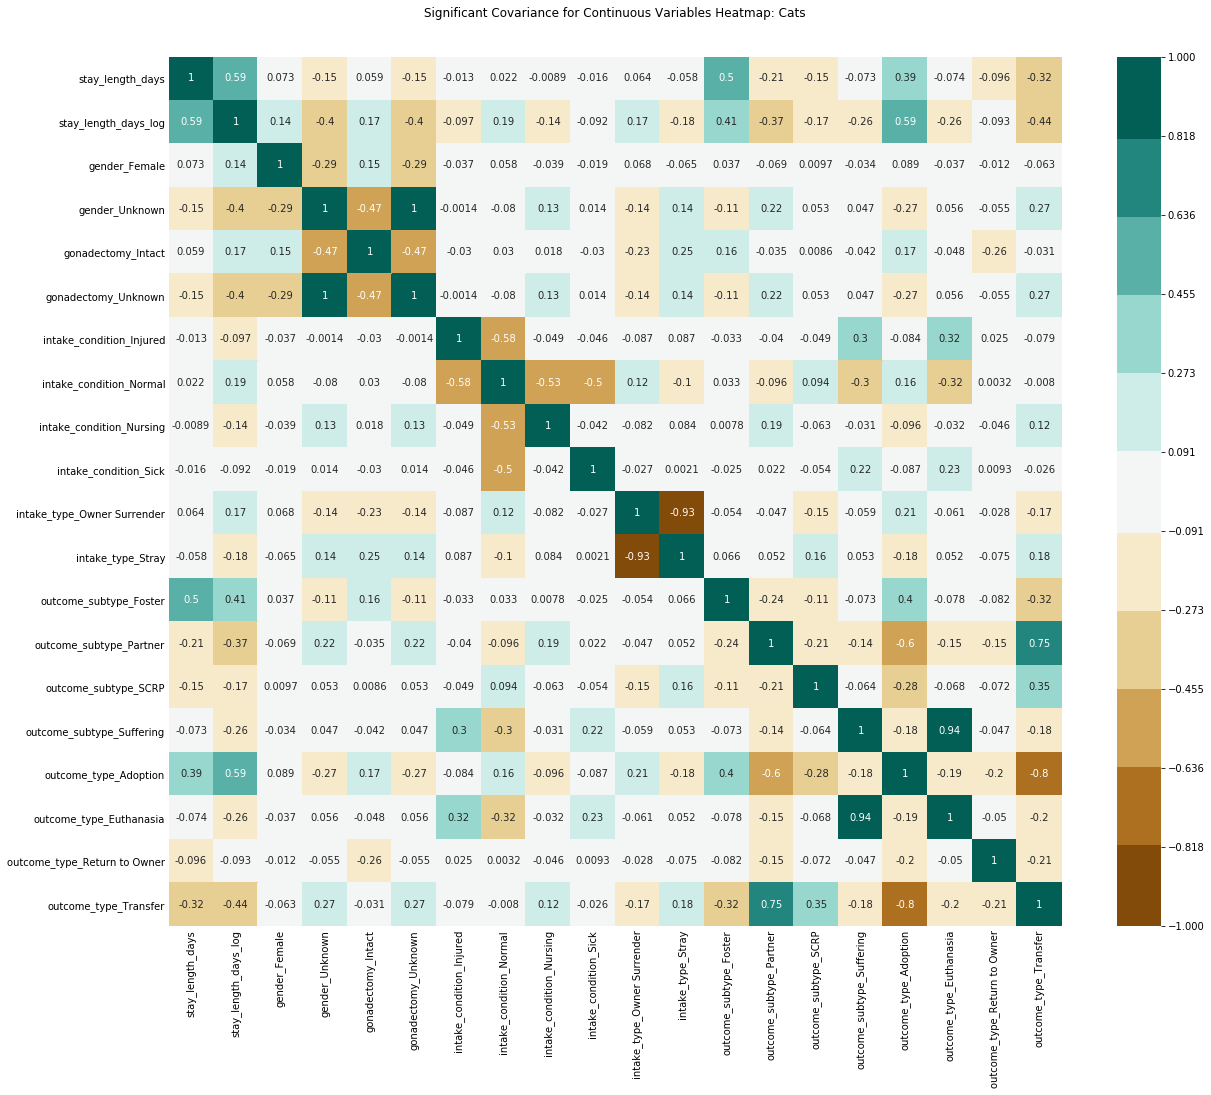

In [170]:
plt.pyplot.figure(figsize = (20,16))
plt.pyplot.title('Significant Covariance for Continuous Variables Heatmap: Cats', verticalalignment = 'top', position = (0.5, 1.05))
ax = sns.heatmap(significant_cats_corr_table.loc[:,significant_cats_corr_table.index], vmin = -1, center = 0, vmax = 1, annot=True, cmap = sns.color_palette("BrBG", 11),
                cbar_kws=dict(ticks=np.arange(-1,1.01,2/11)))
ax.tick_params(length = 0)

For the cats, it appears that quite a few categories yielded significant correlations, with those categories being gender, gonadectomy, intake-condition, intake-type, outcome-subtype, and outcome-type. 

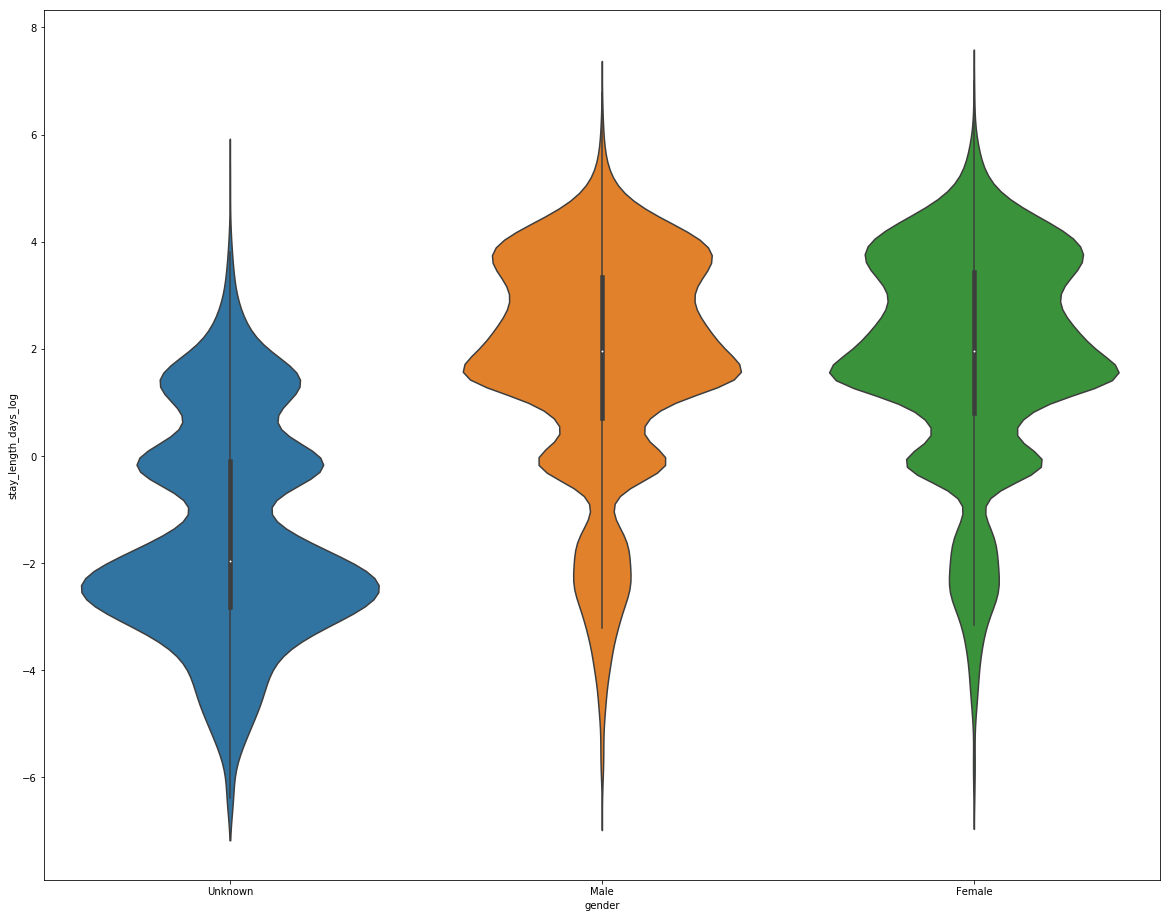

In [171]:
# gender
cat_exploration_df = exploration_df[exploration_df.animal_type == "Cat"]

plt.pyplot.figure(figsize = (20,16));
sns.violinplot(data = cat_exploration_df, x = 'gender', y = 'stay_length_days_log');

In [172]:
cat_exploration_df.gender.value_counts()

Female     16589
Male       16065
Unknown     3076
Name: gender, dtype: int64

The male and female distributions look about the same. The unkown gender does appear to be distributed differently, and, strangely, there are over 3,000 observations with unkown genders. 

In a proper statistical analysis, the unknown genders might be dropped. Thus, I don't believe gender to be a significant variable. 

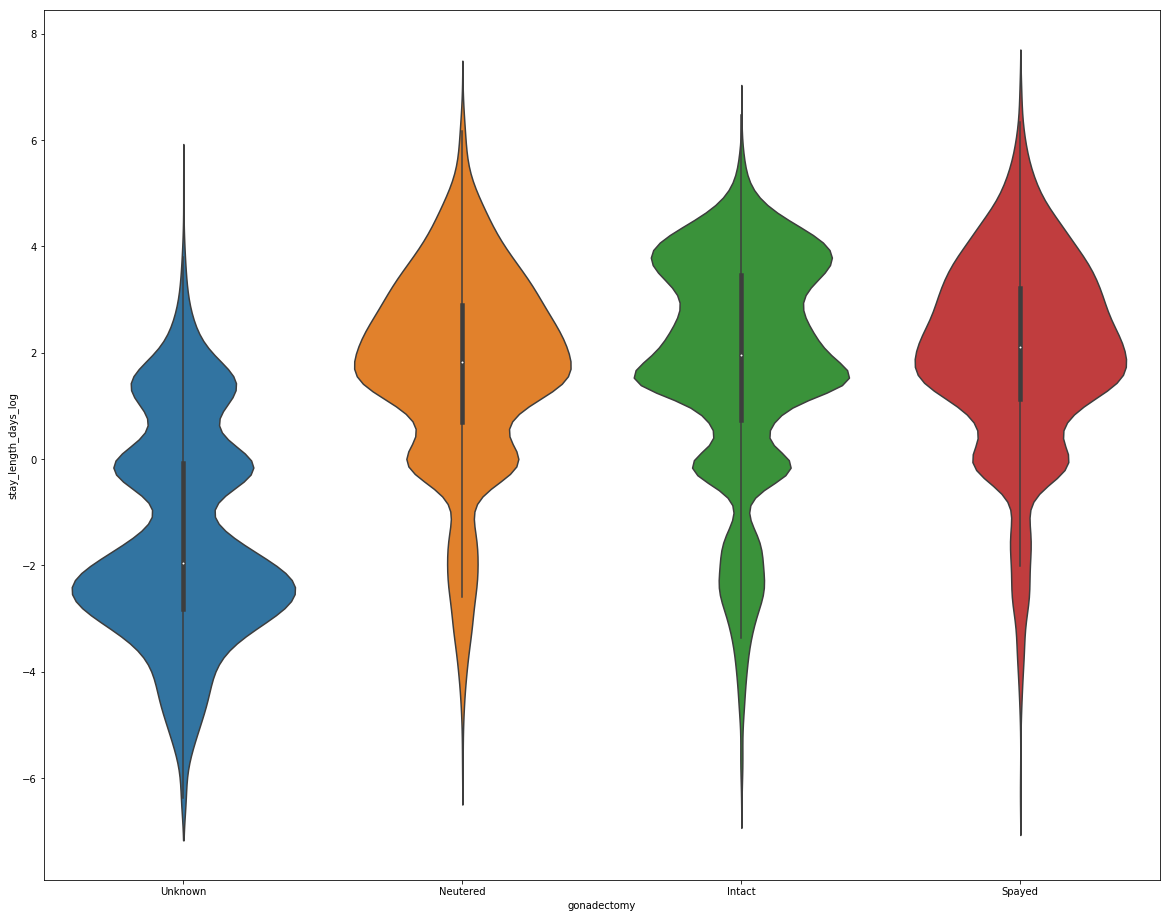

In [173]:
# gonadectomy
plt.pyplot.figure(figsize = (20,16));
sns.violinplot(data = cat_exploration_df, x = 'gonadectomy', y = 'stay_length_days_log');

In [174]:
cat_exploration_df.gonadectomy.value_counts()

Intact      25035
Neutered     3895
Spayed       3724
Unknown      3076
Name: gonadectomy, dtype: int64

Similarly to gender, the unknown values appear to have the most drastically differing distribution. 

Yet here, the neutered and spayed distribution look almost identical, while the intact distribution has an extra peak amongst the longer stays. Thus, it does appear that gonactomy would be a variable of interest. 

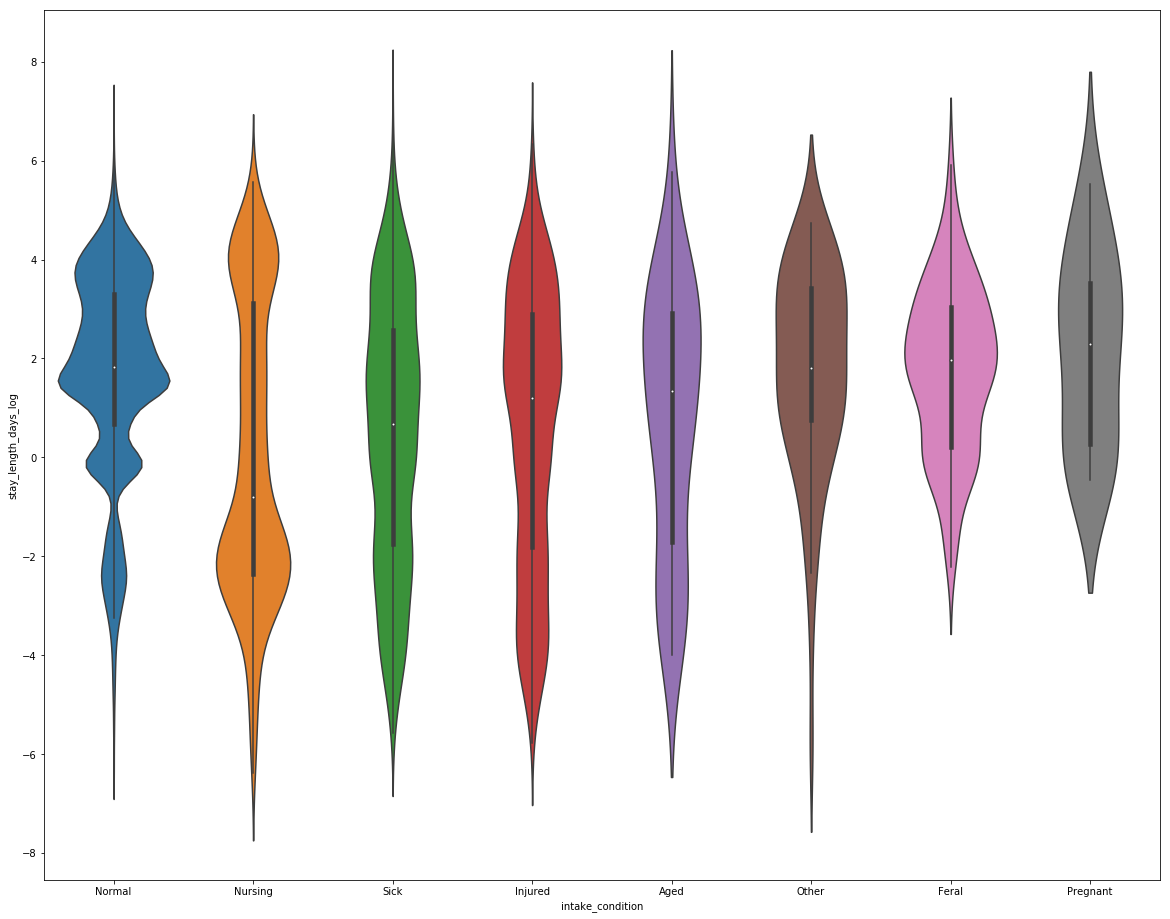

In [175]:
# intake-condition
plt.pyplot.figure(figsize = (20,16));
sns.violinplot(data = cat_exploration_df, x = 'intake_condition', y = 'stay_length_days_log');

In [176]:
cat_exploration_df.intake_condition.value_counts()

Normal      30818
Injured      1837
Nursing      1516
Sick         1344
Feral          88
Other          68
Aged           44
Pregnant       15
Name: intake_condition, dtype: int64

The distribution for normal condtions does appear to a significantly different shape than the other conditions, thus it does appear to be a significant category regarding the stay-lengths. 

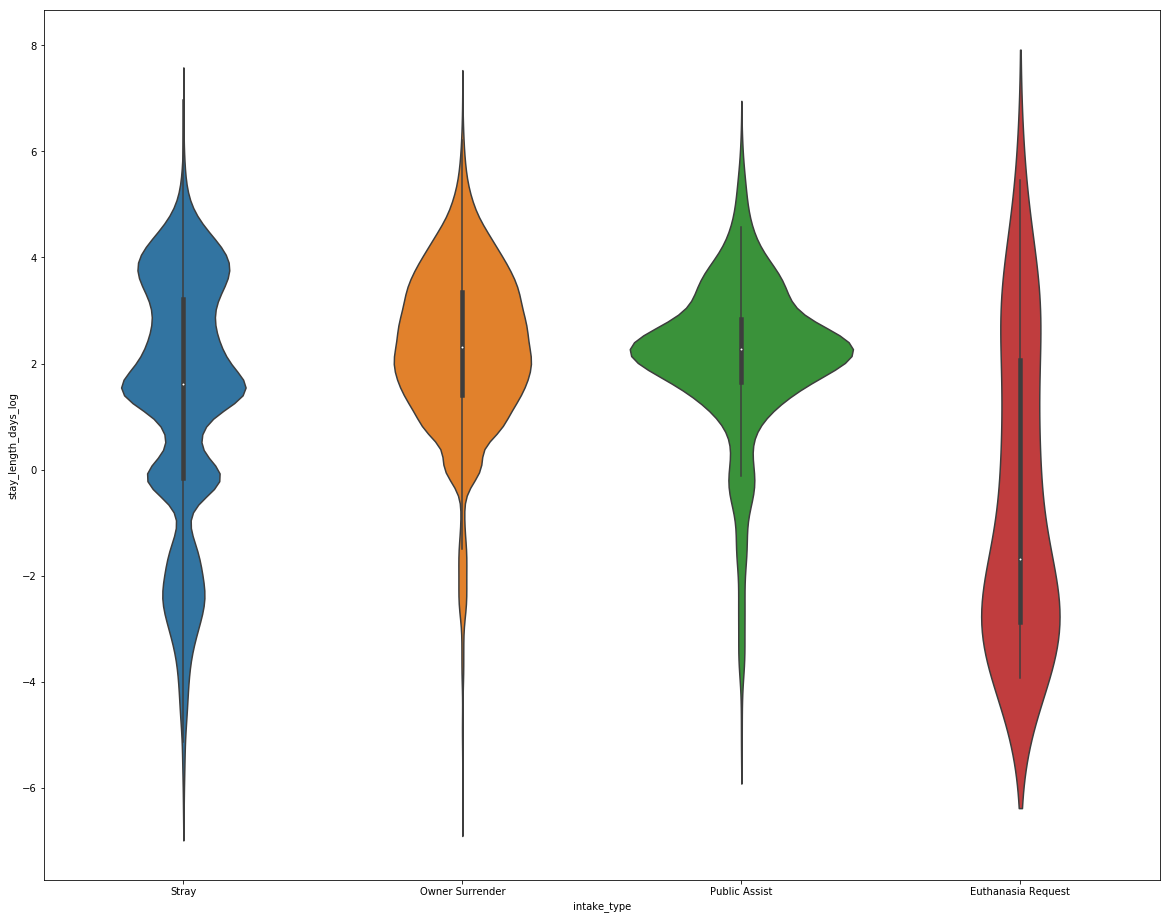

In [177]:
# intake-type
plt.pyplot.figure(figsize = (20,16));
sns.violinplot(data = cat_exploration_df, x = 'intake_type', y = 'stay_length_days_log');

In [178]:
cat_exploration_df.intake_type.value_counts()

Stray                 27995
Owner Surrender        6842
Public Assist           835
Euthanasia Request       58
Name: intake_type, dtype: int64

Each of the categories have different distributions, thus the intake-type looks to be a significant variable. 

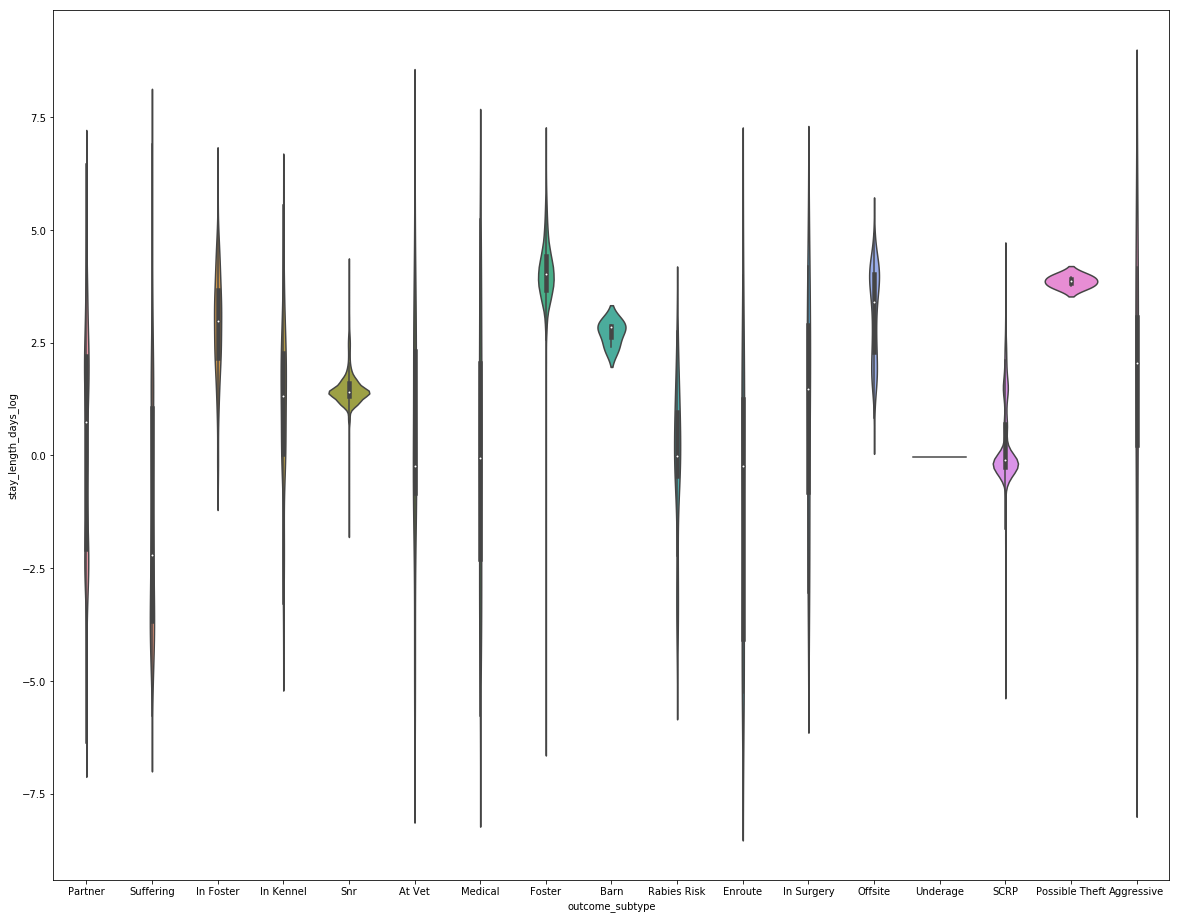

In [179]:
# outcome-subtype
plt.pyplot.figure(figsize = (20,16));
sns.violinplot(data = cat_exploration_df, x = 'outcome_subtype', y = 'stay_length_days_log');

In [180]:
cat_exploration_df.outcome_subtype.value_counts()

Partner           11143
Foster             4083
SCRP               3174
Snr                1599
Suffering          1430
In Kennel           270
In Foster           188
Offsite              93
Rabies Risk          73
Medical              65
At Vet               59
Enroute              20
In Surgery           10
Aggressive            4
Barn                  3
Possible Theft        2
Underage              1
Name: outcome_subtype, dtype: int64

The categories with a minimal number of observations look like needles in the plot, but the categories with a significant number of observations are perceptible and they do appear to vary significantly in stay-lengths, thus this does appear to be a useful categorical variable. 

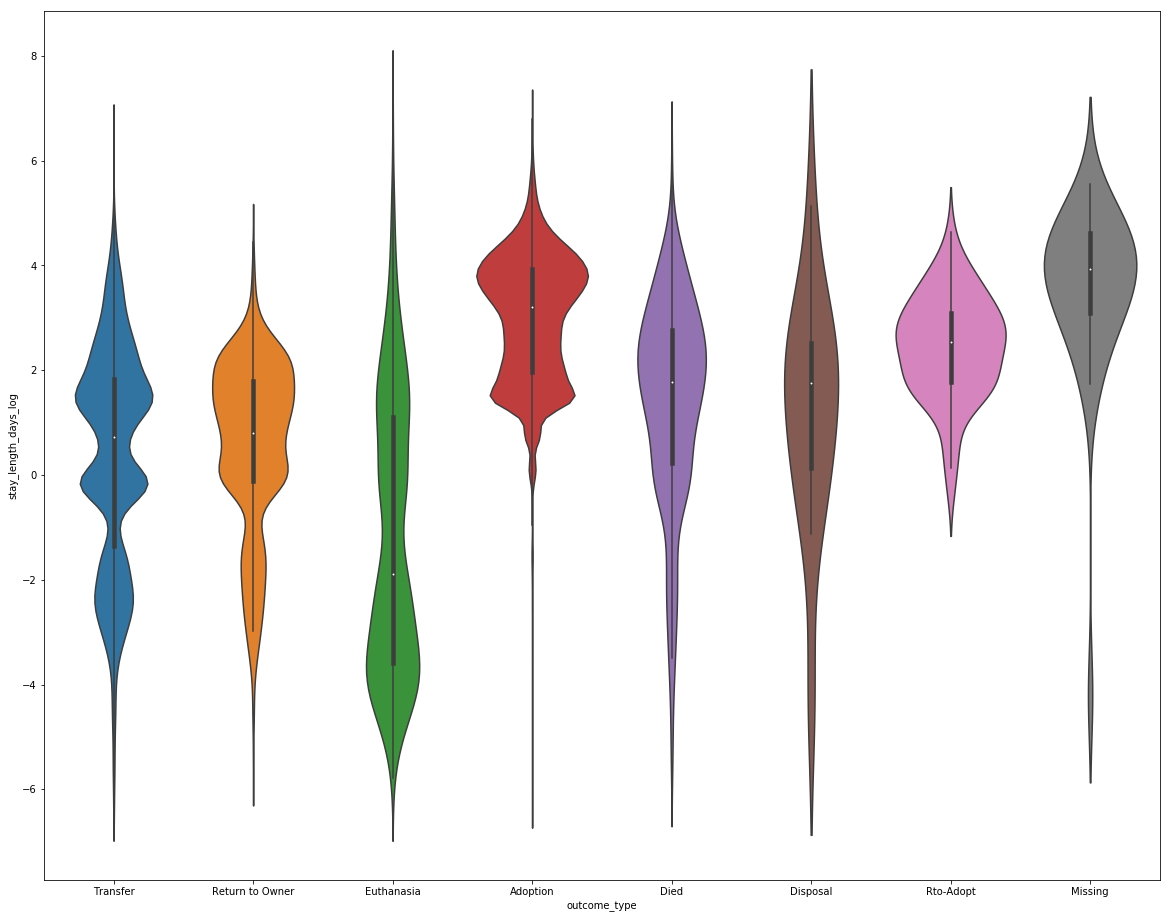

In [181]:
# outcome-type
plt.pyplot.figure(figsize = (20,16));
sns.violinplot(data = cat_exploration_df, x = 'outcome_type', y = 'stay_length_days_log');

In [182]:
cat_exploration_df.outcome_type.value_counts()

Transfer           15918
Adoption           15784
Return to Owner     1787
Euthanasia          1617
Died                 508
Rto-Adopt             68
Missing               33
Disposal              14
Name: outcome_type, dtype: int64

The distributions do generally appears to vary in stay-length and in shape. As seen with the dog population, the adoptions seem to account for the longer stay-lengths. 

###### Recap

Other than gender, it does appear each significant category identified in the covariance table does appear to correlate with the stay-lengths. 

#### Exploring cat-adoptions

I will now explore the cat-adoptions.

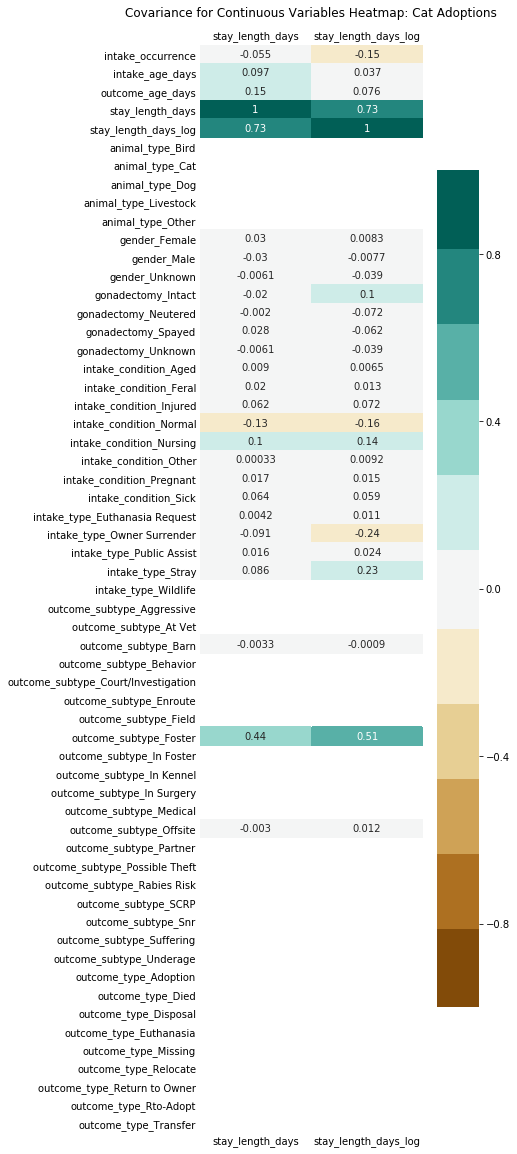

In [183]:
cat_adoptions_corr = exploration_df[(exploration_df.animal_type == "Cat") & (exploration_df.outcome_type == "Adoption")].corr()

plt.pyplot.figure(figsize = (5,20))
plt.pyplot.title('Covariance for Continuous Variables Heatmap: Cat Adoptions', verticalalignment = 'top', position = (0.5, 1.03))
ax = sns.heatmap(cat_adoptions_corr[['stay_length_days', 'stay_length_days_log']], vmin = -1, center = 0, vmax = 1, annot=True, cmap = sns.color_palette("BrBG", 11))
ax.tick_params(axis = 'x', labeltop = True)
ax.tick_params(length = 0)

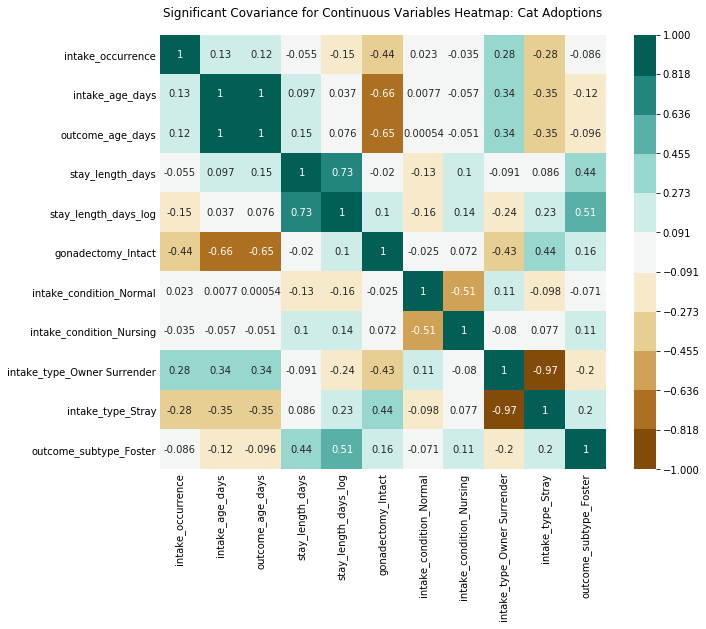

In [184]:
significant_catadoption_corr_table = cat_adoptions_corr.query('(abs(stay_length_days) > (1/11)) | (abs(stay_length_days_log) > (1/11))')

plt.pyplot.figure(figsize = (10,8))
plt.pyplot.title('Significant Covariance for Continuous Variables Heatmap: Cat Adoptions', verticalalignment = 'top', position = (0.5, 1.05))
ax = sns.heatmap(significant_catadoption_corr_table.loc[:,significant_catadoption_corr_table.index], vmin = -1, center = 0, vmax = 1, annot=True, cmap = sns.color_palette("BrBG", 11),
                cbar_kws=dict(ticks=np.arange(-1,1.01,2/11)))
ax.tick_params(length = 0)

This time, the intake occurrence produced a significant (inverse) correlation with the log of the stay-length, perhaps indicating that cats are more likely to get adopted faster on subsequent visits. This will need to explored visually. 

Additionally, the age of the cat, gonadectomy, intake-condition, intake-type, and outcome-subtype produced significant correlations. 

To begin, I'll explore the intake-occurrence covariance. 

As the intake-occurrence is a discrete, I'll visualize the relation as a scatter-plot with jitter, along with a regression to visualize the inverse correlation. 

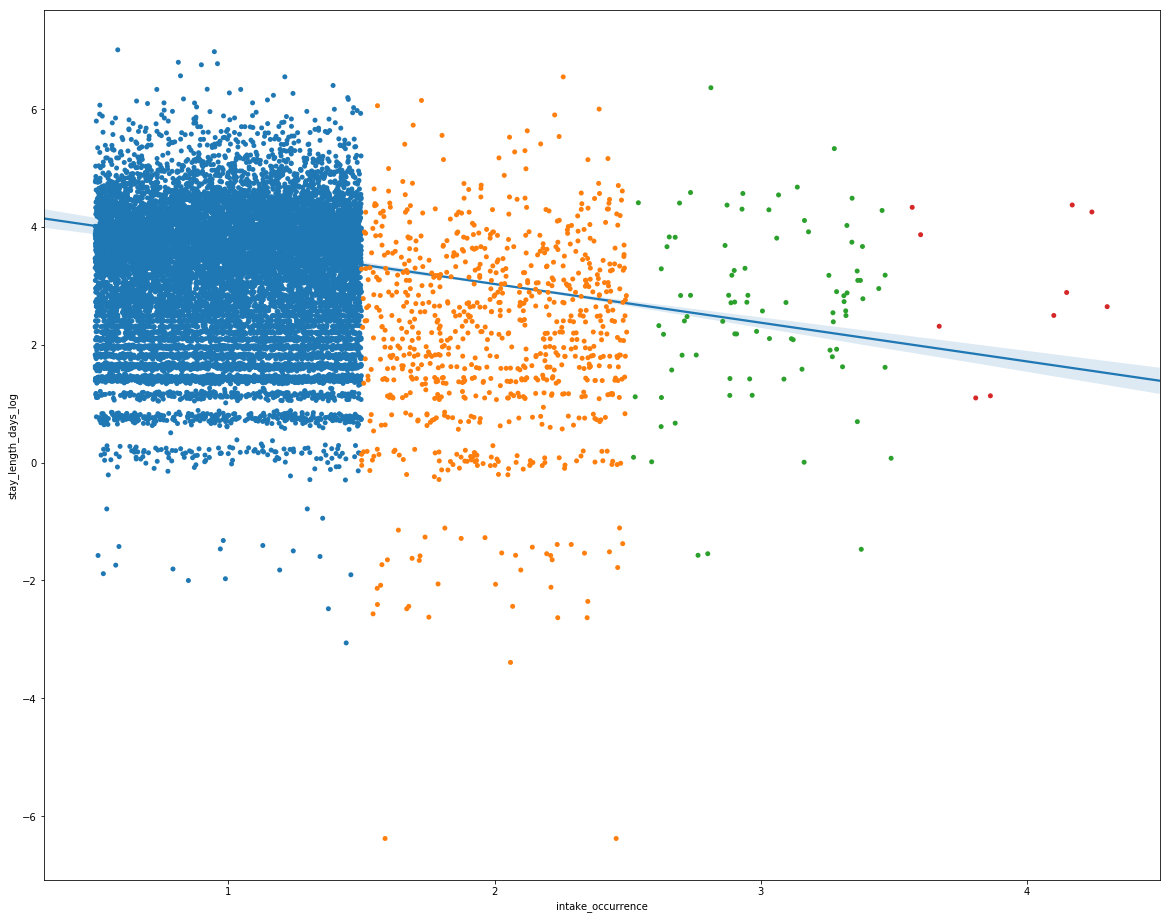

In [185]:
catadoptions_exploration_df = exploration_df[(exploration_df.animal_type == "Cat") & (exploration_df.outcome_type == "Adoption")]

plt.pyplot.figure(figsize = (20,16))
sns.stripplot(x=catadoptions_exploration_df.intake_occurrence, y=catadoptions_exploration_df.stay_length_days_log, jitter = 0.5);
sns.regplot(x=catadoptions_exploration_df.intake_occurrence, y=catadoptions_exploration_df.stay_length_days_log, scatter = False);

The jitter seems to effectively capture the prevalence of 1st occurrences over subsequent occurrence. Given, the scarcity of subsequent occurrences, I'm not convinced that there is indeed a significant relationship here, but if I squint a little bit, it does indeed seem that the 2nd occurrence stay-lengths do somewhat seem shorter than the 1st stays. 

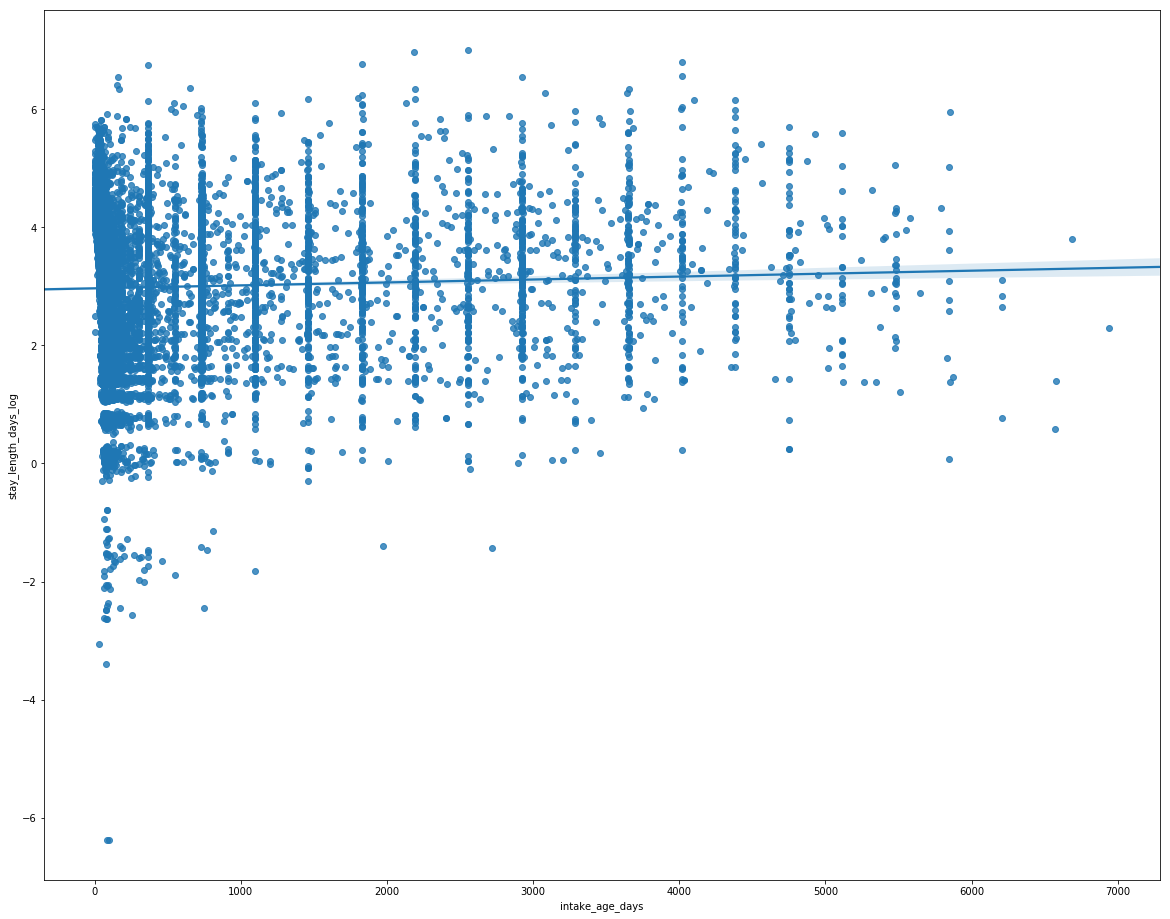

In [186]:
#intake and outcome ages

plt.pyplot.figure(figsize = (20,16))
sns.regplot(x=catadoptions_exploration_df.intake_age_days, y=catadoptions_exploration_df.stay_length_days_log);

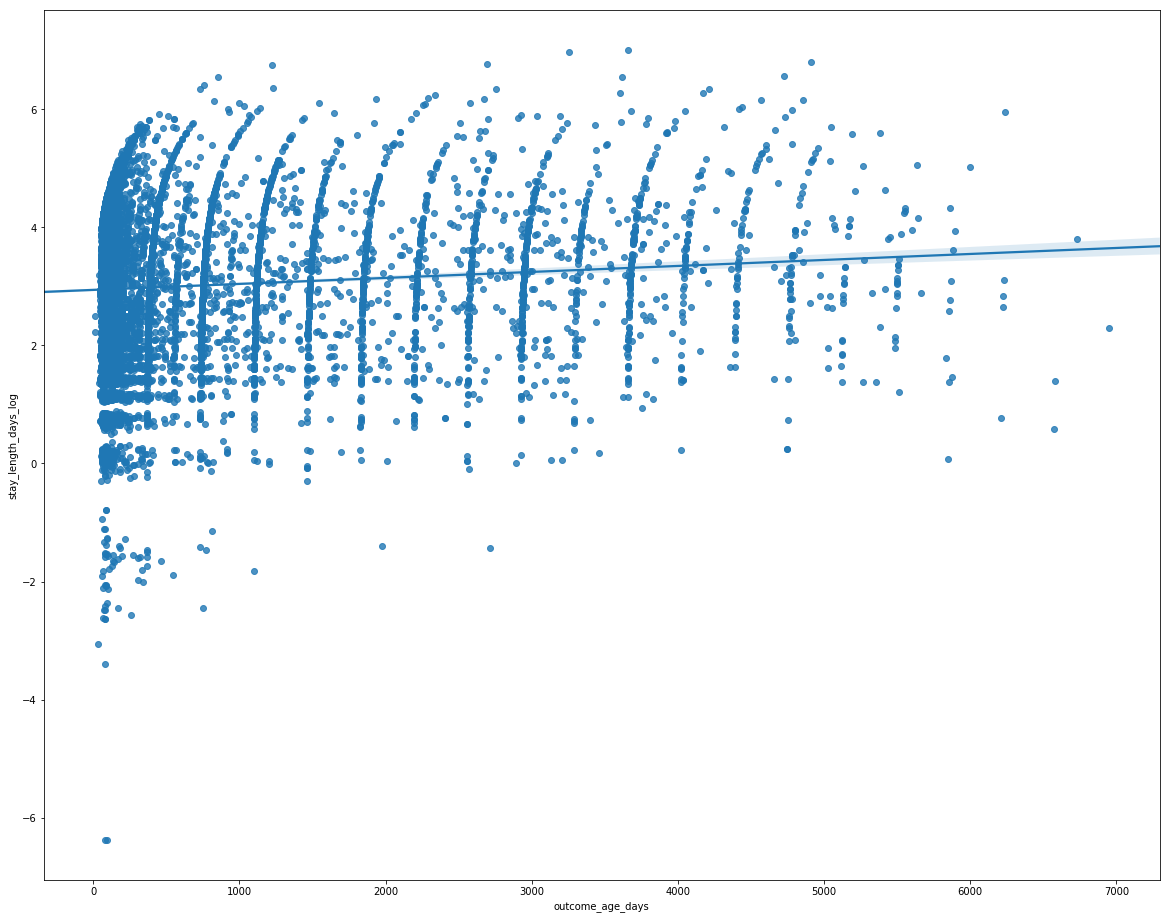

In [187]:
plt.pyplot.figure(figsize = (20,16))
sns.regplot(x=catadoptions_exploration_df.outcome_age_days, y=catadoptions_exploration_df.stay_length_days_log);

Again, maybe the correlation indicates a relationship, yet it's difficult to visualize given the majority of the observations are towards the left end of the graphic. 

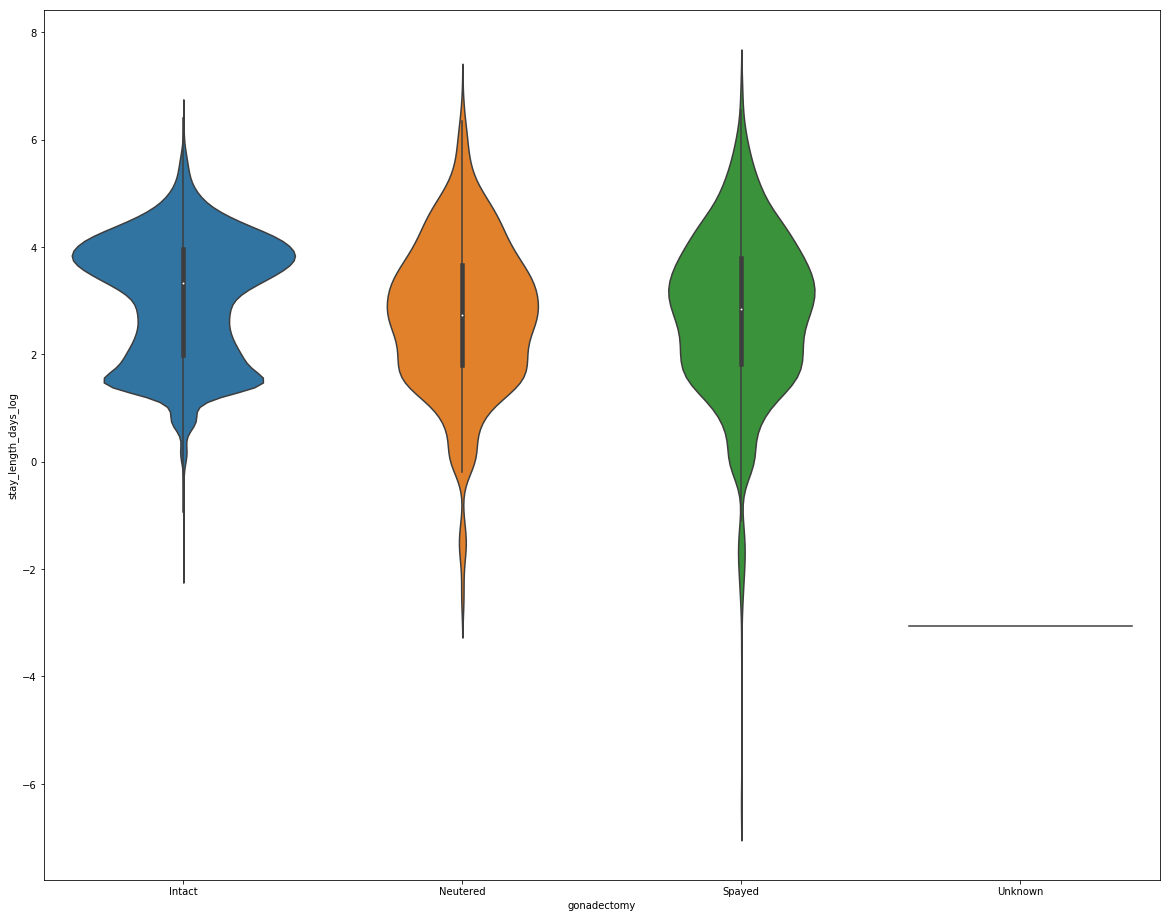

In [188]:
plt.pyplot.figure(figsize = (20,16));
sns.violinplot(data = catadoptions_exploration_df, x = 'gonadectomy', y = 'stay_length_days_log');

In [189]:
catadoptions_exploration_df.gonadectomy.value_counts()

Intact      12437
Spayed       1767
Neutered     1579
Unknown         1
Name: gonadectomy, dtype: int64

As seen with the other subpopulations, the spayed distribution is very similar to the neutered distribution, and both are significantly different from the intact distribution. So perhaps in a statistical model, the variable should be adjusted to a binary variable as to whether the animal is in intact or not (independent of gender). 

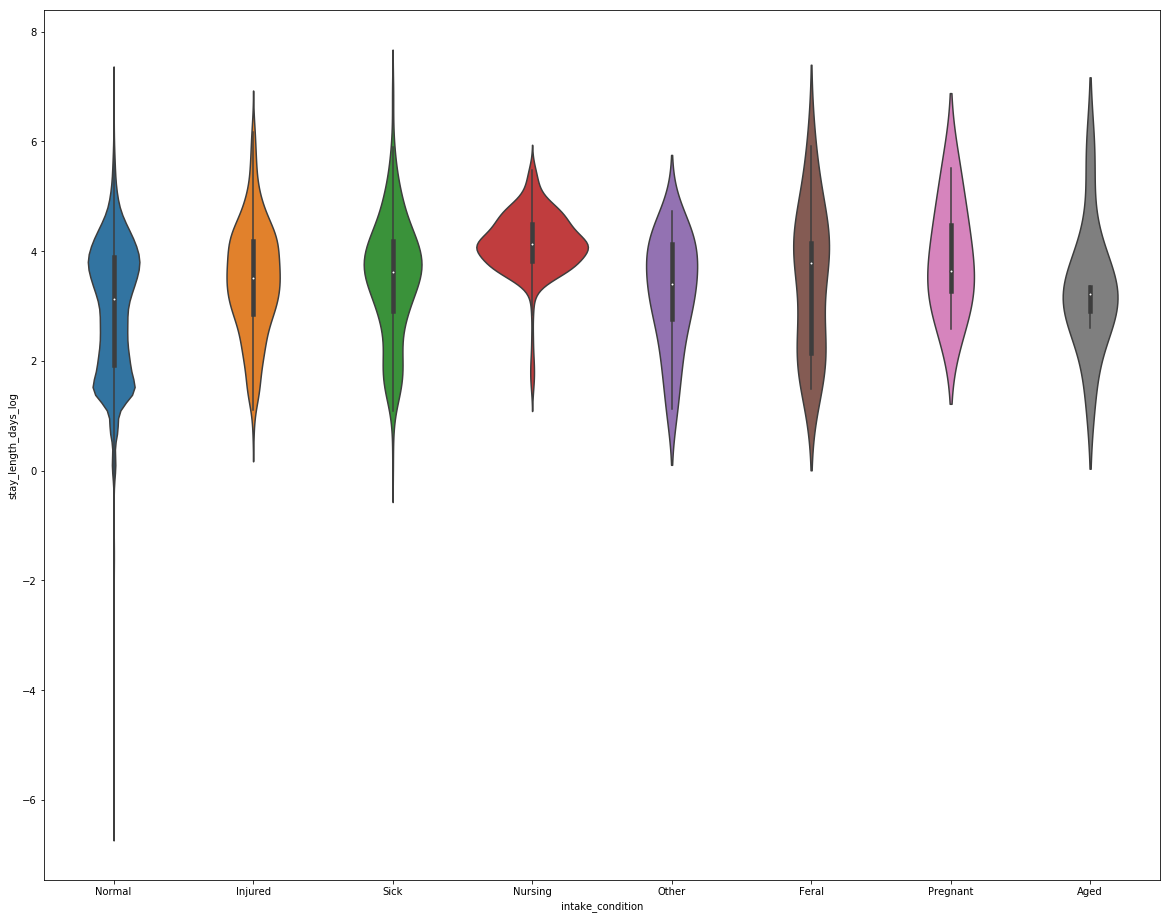

In [190]:
plt.pyplot.figure(figsize = (20,16));
sns.violinplot(data = catadoptions_exploration_df, x = 'intake_condition', y = 'stay_length_days_log');

In [191]:
catadoptions_exploration_df.intake_condition.value_counts()

Normal      14611
Injured       484
Nursing       325
Sick          301
Other          29
Feral          17
Aged           10
Pregnant        7
Name: intake_condition, dtype: int64

The shapes of the distributions and the stay-length values do appear to vary amongst the intake-conditions. Also, it does appear the normal intake-conditions generally appear to be associated with shorter stay-lengths than the other conditions. 

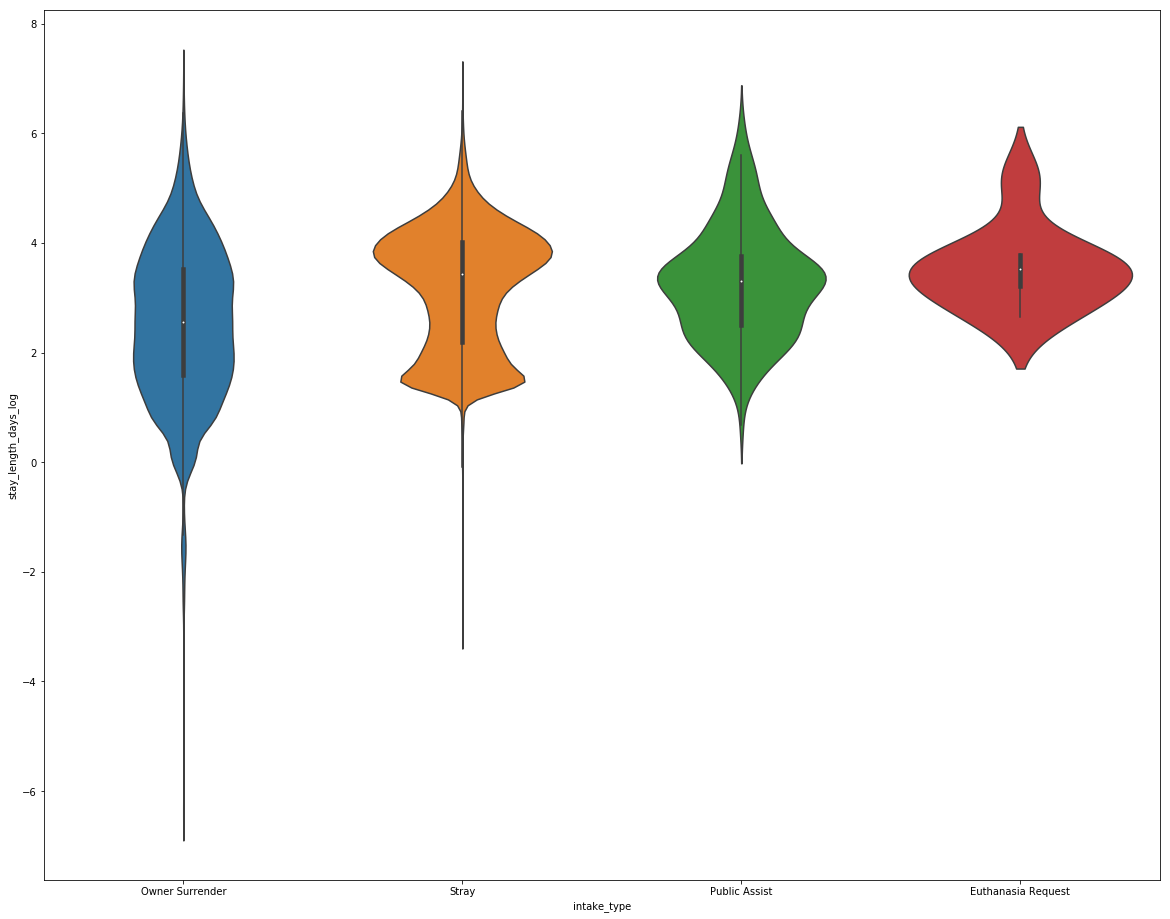

In [192]:
plt.pyplot.figure(figsize = (20,16));
sns.violinplot(data = catadoptions_exploration_df, x = 'intake_type', y = 'stay_length_days_log');

In [193]:
catadoptions_exploration_df.intake_type.value_counts()

Stray                 11084
Owner Surrender        4508
Public Assist           183
Euthanasia Request        9
Name: intake_type, dtype: int64

This does appear to be a significant variable given the different categories appear to have varying distributions and stay-lengths. 

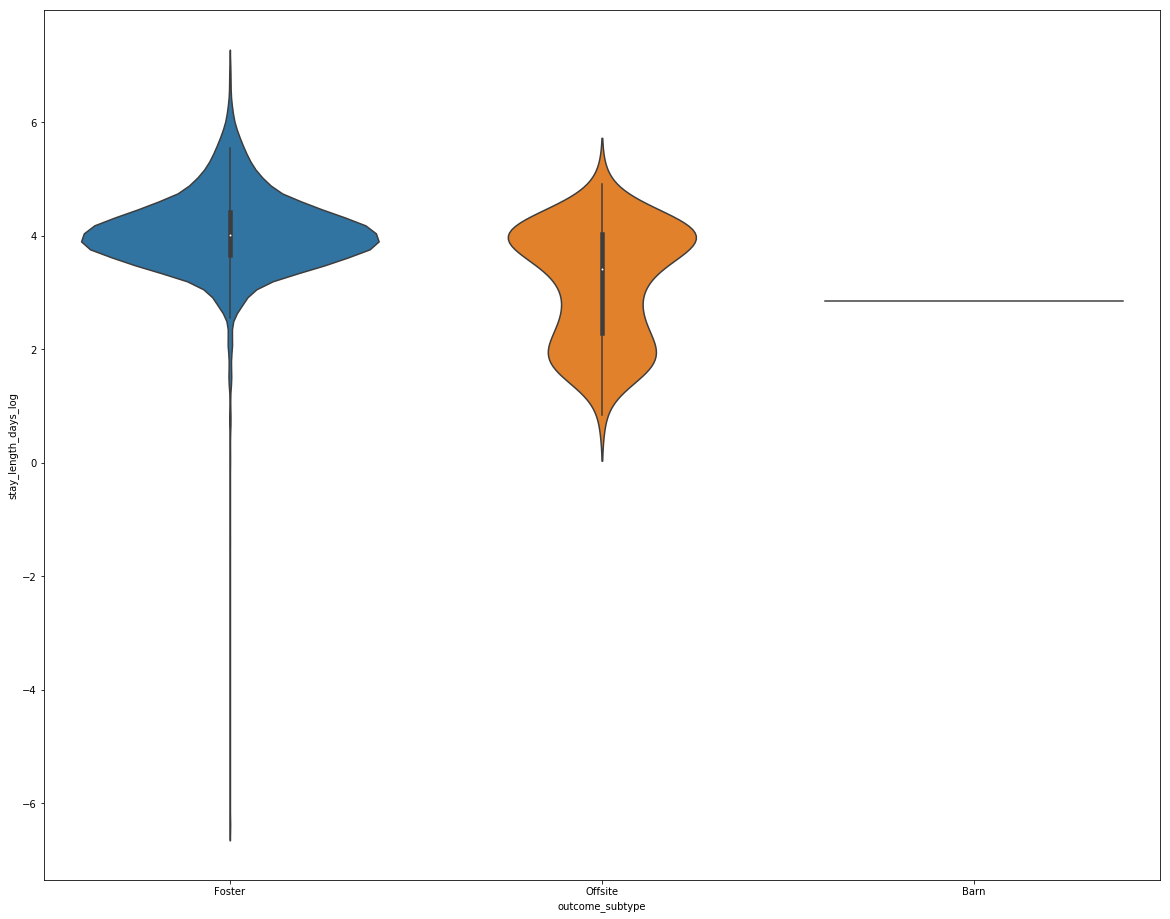

In [194]:
plt.pyplot.figure(figsize = (20,16));
sns.violinplot(data = catadoptions_exploration_df, x = 'outcome_subtype', y = 'stay_length_days_log');

In [195]:
catadoptions_exploration_df.outcome_subtype.value_counts()

Foster     4083
Offsite      93
Barn          1
Name: outcome_subtype, dtype: int64

I wouldn't consider this to be a significant variable given that almost all of the observations are foster animals. 

##### Recap

The quantitative variables, intake-occurrence and intake-age, potentially relate the stay-length, yet it was difficult the confirm through visualizations. 

All of the categorical variables, except for outcome-subtype, seemed to significantly correlate with stay-lengths. 

## Conclusions

After exploring the entire population of animal-intakes, as well as the various subpopulations of dogs, cats, and adoptions, there wasn't a single variable that yielded a very strong correlation or inverse correlation, yet a number of variables still did produce significant correlations, and in combination, could potentially be used to build a multivariate predictive model. 

Below are the list of populations and their respective significant correlates for stay-lengths: 

**Whole Population**
* animal-type
* intake-condition 
* intake-type
* outcome-type

**Dogs**
* intake-age
* gonadectomy
* intake-type
* outcome-type
* outcome-subtype

**Dog Adoptions**
* intake-age
* intake-condition
* intake-type

**Cats**
* gonadectomy
* intake-condition
* intake-type
* outcome-type
* outcome-subtype

**Cat Adoptions**
* intake-occurrence
* intake-age
* gonadectomy
* intake-condition
* intake-type

Building a multivariate predictive model that allows the Austin Animal Center to accurately predict how long the center will hold a new intake could potentially be useful for the center's operations, and the above list could potentially guide the construction of such a model. 